In [528]:
import pandas as pd
from __future__ import annotations
from pathlib import Path
from itertools import chain

import Bio
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Align.AlignInfo import SummaryInfo
from Bio.Align import AlignInfo

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from Bio.motifs import Motif
import glob 
import itertools
import matplotlib.pyplot as plt

from scipy import stats


# Plan:
Get all AD alignments

- Build mega table where each column is one position in an AD
- Each row is count of each AA

so table should have sum(AD lens) cols * 20 rows

In [248]:
counts_dfs = []

print(str(len(glob.glob("../data/zoonomia_toga_mca/all_AD_alignments/*"))) + " alignments")
i = 0

# For each AD alignment
for AD_alignment in glob.glob("../data/zoonomia_toga_mca/all_AD_alignments/*"):
    if i%25 == 0:
        print(i)
    i += 1
    
    # Get msa
    msa = AlignIO.read(AD_alignment, "fasta")
    
    # Get consensus sequence (>50% of positions have that AA)
    summary_align = AlignInfo.SummaryInfo(msa)
    consensus = summary_align.dumb_consensus(0.5)
    
    #Counting each AA
    motif = Motif("ACDEFGHIKLMNPQRSTVWYX", msa.alignment)
    counts = motif.counts
    
    # Saving as dataframe in desired format
    counts_df = pd.DataFrame(counts).T
    counts_df.columns = list(str(consensus))
    counts_dfs.append(counts_df)

656 alignments
0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650


In [327]:
# Wide dataframe where columns are positions in the AD consensus sequences, rows are the 20 AAs
combined_counts_df = pd.concat(counts_dfs, axis = 1)
combined_counts_df

H      M      M      Y      P      S      P      H      A      V  ...  \
A    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  471.0    0.0  ...   
C    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
D    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
E    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
F    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
G    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
H  472.0    0.0    0.0    0.0    0.0    0.0    0.0  473.0    0.0    0.0  ...   
I    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
K    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
L    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
M    0.0  473.0  473.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
N    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
P    0.0    0.0    0.0    0.0  470.0    0.0  472.0    0.0    0.0    0.0  ...   
Q    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
R    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
S    0.0    0.0    0.0    0.0    3.0  473.0    0.0    0.0    0.0    0.0  ...   
T    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    2.0    0.0  ...   
V    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  473.0  ...   
W    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
Y    0.0    0.0    0.0  473.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
X    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  ...   

       S      S      S      N      E      P      S      S      D      S  
A    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
C    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
D    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  479.0    0.0  
E    0.0    0.0    0.0    0.0  479.0    0.0    0.0    0.0    0.0    0.0  
F    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
G    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
H    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
I    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
K    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
L    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
M    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
N    0.0    0.0    0.0  474.0    0.0    0.0    0.0    0.0    0.0    0.0  
P    0.0    0.0    0.0    0.0    0.0  479.0    0.0    0.0    0.0    0.0  
Q    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
R    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
S  479.0  479.0  479.0    0.0    0.0    0.0  479.0  479.0    0.0  479.0  
T    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
V    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
W    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
Y    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
X    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[21 rows x 79056 columns]

In [328]:
# Converting to proportions
combined_percents_df = combined_counts_df / combined_counts_df.sum()
combined_percents_df

H    M    M    Y         P    S         P    H         A    V  ...  \
A  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.995772  0.0  ...   
C  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
D  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
E  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
F  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
G  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
H  0.997886  0.0  0.0  0.0  0.000000  0.0  0.000000  1.0  0.000000  0.0  ...   
I  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
K  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
L  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
M  0.000000  1.0  1.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
N  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
P  0.000000  0.0  0.0  0.0  0.993658  0.0  0.997886  0.0  0.000000  0.0  ...   
Q  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
R  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
S  0.000000  0.0  0.0  0.0  0.006342  1.0  0.000000  0.0  0.000000  0.0  ...   
T  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.004228  0.0  ...   
V  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  1.0  ...   
W  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
Y  0.000000  0.0  0.0  1.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  ...   
X  0.002114  0.0  0.0  0.0  0.000000  0.0  0.002114  0.0  0.000000  0.0  ...   

     S    S    S    N    E    P    S    S    D    S  
A  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
C  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
E  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
G  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
H  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
I  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
K  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
L  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
M  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
N  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
P  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
Q  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
R  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
S  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  
T  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
V  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
W  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Y  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
X  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[21 rows x 79056 columns]

In [329]:
# Transposing to make future computations easier
combined_percents_df_T = combined_percents_df.T
combined_percents_df_T

A    C    D    E    F    G         H    I    K    L  ...    N         P  \
H   0.0  0.0  0.0  0.0  0.0  0.0  0.997886  0.0  0.0  0.0  ...  0.0  0.000000   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
Y   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.993658   
..  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...       ...   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  1.000000   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
D   0.0  0.0  1.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.000000   

      Q    R         S    T    V    W    Y         X  
H   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.002114  
M   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  
M   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  
Y   0.0  0.0  0.000000  0.0  0.0  0.0  1.0  0.000000  
P   0.0  0.0  0.006342  0.0  0.0  0.0  0.0  0.000000  
..  ...  ...       ...  ...  ...  ...  ...       ...  
P   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  
S   0.0  0.0  1.000000  0.0  0.0  0.0  0.0  0.000000  
S   0.0  0.0  1.000000  0.0  0.0  0.0  0.0  0.000000  
D   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  
S   0.0  0.0  1.000000  0.0  0.0  0.0  0.0  0.000000  

[79056 rows x 21 columns]

In [330]:
# Listing all AA pairs
AA_singles = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
AA_pairs = list(itertools.combinations(AA_singles, 2))
AA_pairs[:5]                                                                         

[('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('A', 'G')]

In [331]:
# Calculating the change in percent identity for each pair 
# Let P(...) be the percent identity of a ... 
# min(delta P(pair)) = min(P(pair) - P(AA1), P(pair) - P(AA2))
# min(delta P(pair)) = min(P(AA1) + P(AA2) - P(AA1), P(AA1) + P(AA2) - P(AA2))
# min(delta P(pair)) = min(P(AA2), P(AA1))

AA_pair_col_names = []

for AA1, AA2 in AA_pairs:
    AA_pair_col_names.append(AA1 + AA2)
    combined_percents_df_T[AA1 + AA2] = combined_percents_df_T[[AA1, AA2]].min(axis = 1) # Take the minimum of P(AA1) and P(AA2) because this equals minimum change in percent identity for the pair

In [332]:
combined_percents_df_T

A    C    D    E    F    G         H    I    K    L  ...   ST   SV   SW  \
H   0.0  0.0  0.0  0.0  0.0  0.0  0.997886  0.0  0.0  0.0  ...  0.0  0.0  0.0   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
Y   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
D   0.0  0.0  1.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     SY   TV   TW   TY   VW   VY   WY  
H   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
M   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
M   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Y   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
P   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  ...  
P   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
D   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[79056 rows x 211 columns]

In [381]:
# Only keep pairs
pair_df = combined_percents_df_T.loc[:, AA_pair_col_names]
pair_df

AC   AD   AE   AF   AG   AH   AI   AK   AL   AM  ...   ST   SV   SW   SY  \
H   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
M   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
Y   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
P   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
D   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
S   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     TV   TW   TY   VW   VY   WY  
H   0.0  0.0  0.0  0.0  0.0  0.0  
M   0.0  0.0  0.0  0.0  0.0  0.0  
M   0.0  0.0  0.0  0.0  0.0  0.0  
Y   0.0  0.0  0.0  0.0  0.0  0.0  
P   0.0  0.0  0.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  
P   0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  
D   0.0  0.0  0.0  0.0  0.0  0.0  
S   0.0  0.0  0.0  0.0  0.0  0.0  

[79056 rows x 190 columns]

In [356]:
# Goal: for each position, keep only pairs which contain corresponding consensus AA 

# Create a mask of whether column name does not contain row index letter - to conver tot null later
mask = pair_df.columns.to_list()  
index_matrix = np.array([mask[i].find(row_idx) != -1 # Column name does not contain row index
                         for row_idx in pair_df.index # Iterate through row indices
                         for i in range(len(mask))]) # Iterate through columns
index_matrix = index_matrix.reshape(len(pair_df), len(pair_df.columns)) # Save in shape of dataframe                                                            
index_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [401]:
# Create mutable array then convert values to remove to nulls
index_array = np.array(pair_df.values)
index_array[~index_matrix] = np.nan
null_imputed_df = pd.DataFrame(index_array)
null_imputed_df.columns = pair_df.columns
null_imputed_df.index = pair_df.index
null_imputed_df

AC   AD  AE  AF  AG   AH  AI  AK  AL   AM  ...   ST   SV   SW   SY  TV  \
H  NaN  NaN NaN NaN NaN  0.0 NaN NaN NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   
M  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  0.0  ...  NaN  NaN  NaN  NaN NaN   
M  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  0.0  ...  NaN  NaN  NaN  NaN NaN   
Y  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  NaN  NaN  NaN  0.0 NaN   
P  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   
..  ..  ...  ..  ..  ..  ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ..   
P  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   
S  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  0.0  0.0  0.0  0.0 NaN   
S  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  0.0  0.0  0.0  0.0 NaN   
D  NaN  0.0 NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   
S  NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN  ...  0.0  0.0  0.0  0.0 NaN   

    TW   TY  VW   VY   WY  
H  NaN  NaN NaN  NaN  NaN  
M  NaN  NaN NaN  NaN  NaN  
M  NaN  NaN NaN  NaN  NaN  
Y  NaN  0.0 NaN  0.0  0.0  
P  NaN  NaN NaN  NaN  NaN  
..  ..  ...  ..  ...  ...  
P  NaN  NaN NaN  NaN  NaN  
S  NaN  NaN NaN  NaN  NaN  
S  NaN  NaN NaN  NaN  NaN  
D  NaN  NaN NaN  NaN  NaN  
S  NaN  NaN NaN  NaN  NaN  

[79056 rows x 190 columns]

In [408]:
# Reset index to prepare to melt 
null_imputed_df = null_imputed_df.reset_index()
null_imputed_df

index  AC   AD  AE  AF  AG   AH  AI  AK  AL  ...   ST   SV   SW   SY  \
0         H NaN  NaN NaN NaN NaN  0.0 NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1         M NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
2         M NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
3         Y NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  0.0   
4         P NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
...     ...  ..  ...  ..  ..  ..  ...  ..  ..  ..  ...  ...  ...  ...  ...   
79051     P NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
79052     S NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  0.0  0.0  0.0  0.0   
79053     S NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  0.0  0.0  0.0  0.0   
79054     D NaN  0.0 NaN NaN NaN  NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
79055     S NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  ...  0.0  0.0  0.0  0.0   

       TV  TW   TY  VW   VY   WY  
0     NaN NaN  NaN NaN  NaN  NaN  
1     NaN NaN  NaN NaN  NaN  NaN  
2     NaN NaN  NaN NaN  NaN  NaN  
3     NaN NaN  0.0 NaN  0.0  0.0  
4     NaN NaN  NaN NaN  NaN  NaN  
...    ..  ..  ...  ..  ...  ...  
79051 NaN NaN  NaN NaN  NaN  NaN  
79052 NaN NaN  NaN NaN  NaN  NaN  
79053 NaN NaN  NaN NaN  NaN  NaN  
79054 NaN NaN  NaN NaN  NaN  NaN  
79055 NaN NaN  NaN NaN  NaN  NaN  

[79056 rows x 191 columns]

In [535]:
# Now melt so that each row is one of the 190 pairs at each of 79k locations
melted = pd.melt(null_imputed_df, id_vars = ['index'], value_vars = AA_pair_col_names)
melted

index variable  value
0            H       AC    NaN
1            M       AC    NaN
2            M       AC    NaN
3            Y       AC    NaN
4            P       AC    NaN
...        ...      ...    ...
15020635     P       WY    NaN
15020636     S       WY    NaN
15020637     S       WY    NaN
15020638     D       WY    NaN
15020639     S       WY    NaN

[15020640 rows x 3 columns]

In [536]:
# Drop nulls since these are pairs which do not include consensus AA
melted = melted.dropna()
melted

index variable  value
8            A       AC    0.0
12           A       AC    0.0
18           A       AC    0.0
27           A       AC    0.0
31           A       AC    0.0
...        ...      ...    ...
15020454     W       WY    0.0
15020567     Y       WY    0.0
15020571     W       WY    0.0
15020605     Y       WY    0.0
15020613     Y       WY    0.0

[1482950 rows x 3 columns]

In [537]:
# As expected, there are 19 possible columns for each index AA
melted[["index", "variable"]].drop_duplicates()[["index"]].value_counts()

index
A        19
C        19
W        19
V        19
T        19
S        19
R        19
Q        19
P        19
N        19
M        19
L        19
K        19
I        19
H        19
G        19
F        19
E        19
D        19
Y        19
Name: count, dtype: int64

In [538]:

# Q: SHOULD I DROP ZEROS?
# A: No because 0 is meaningful, actually tells you that adding that AA to thte consensus seq AA did not change percent identity


# melted = melted[melted["value"] != 0]
# melted

In [545]:
# # Surprisingly there are 19 possible columns which remain for each index AA
# melted[["index", "variable"]].drop_duplicates()[["index"]].value_counts()

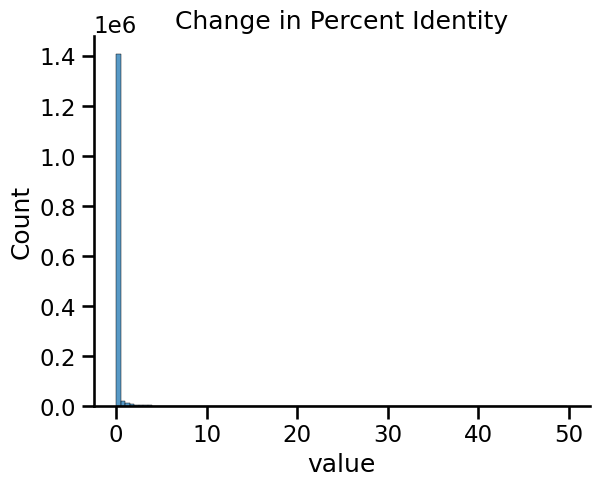

In [540]:
sns.set_context('talk')
sns.histplot(100 * melted["value"], bins = 100)
plt.title("Change in Percent Identity")
sns.despine()

In [541]:
def compare_pair(pair, 
                 plot = True, 
                 means = False,
                 t_test = True):
    # Plot
    melted_pair = melted[melted["variable"] == pair]
    melted_not_pair = melted[melted["variable"] != pair]

    if plot:
        max_x = max(melted["value"])
        bins = np.arange(0, max_x * 100, 1)
        
        sns.set_context('talk')
        sns.histplot(100 * melted_not_pair["value"], bins = bins, label = "Other Pairs", stat = "density")
        sns.histplot(100 * melted_pair["value"], bins = bins, label = pair, stat = "density")

        if means == True:
            plt.axvline(100 * np.mean(melted_not_pair["value"]), color = sns.color_palette()[0], linestyle = "--")
            plt.axvline(100 * np.mean(melted_pair["value"]), color = sns.color_palette()[1], linestyle = "--")

        plt.legend()
        plt.title("")
        plt.xlabel("Change in Percent Identity\nPer AD Residue")
        sns.despine()

    if t_test:
        return stats.ttest_ind(melted_pair["value"], melted_not_pair["value"], alternative = "greater")[1]

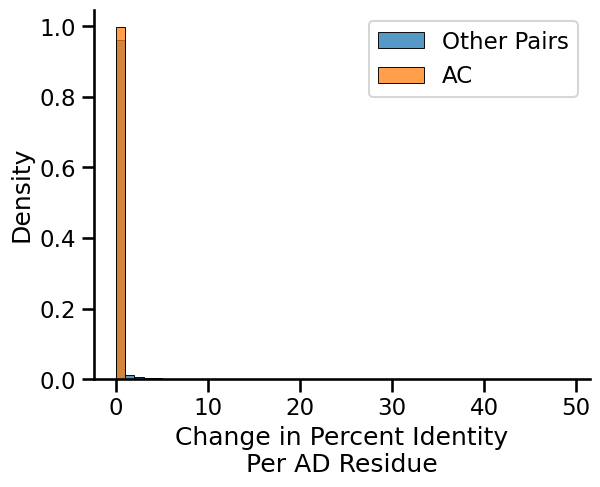

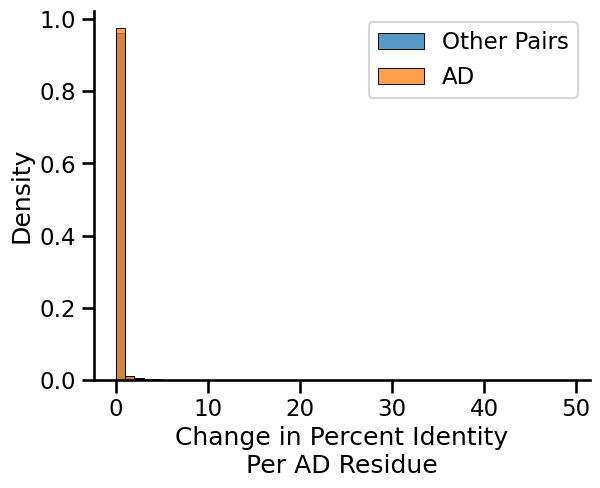

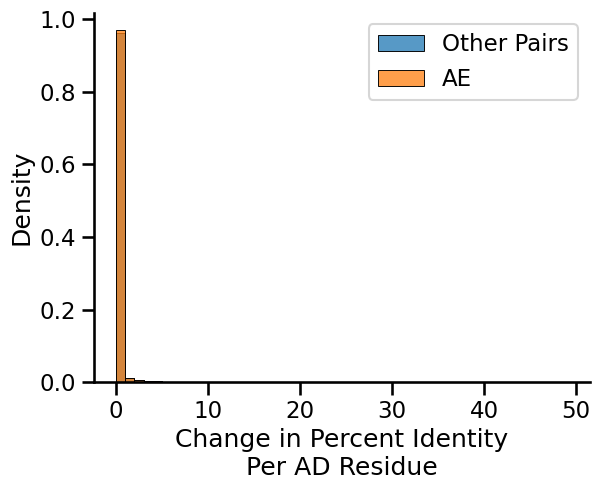

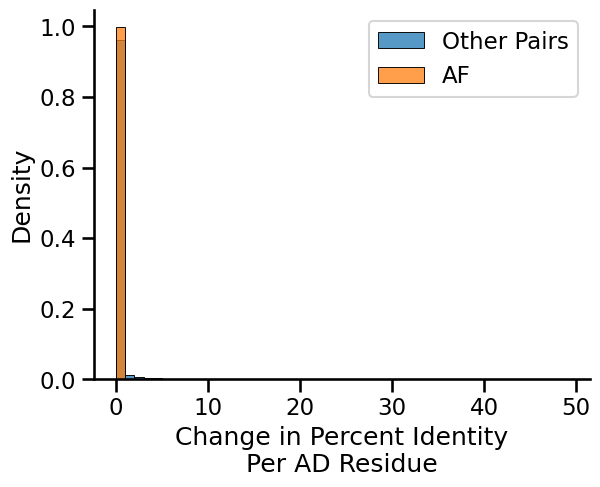

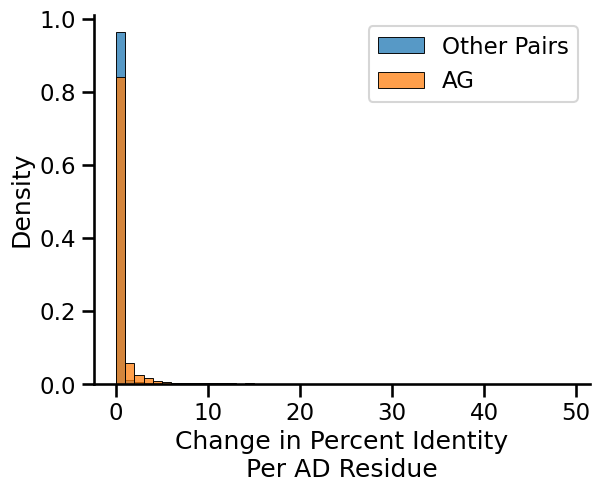

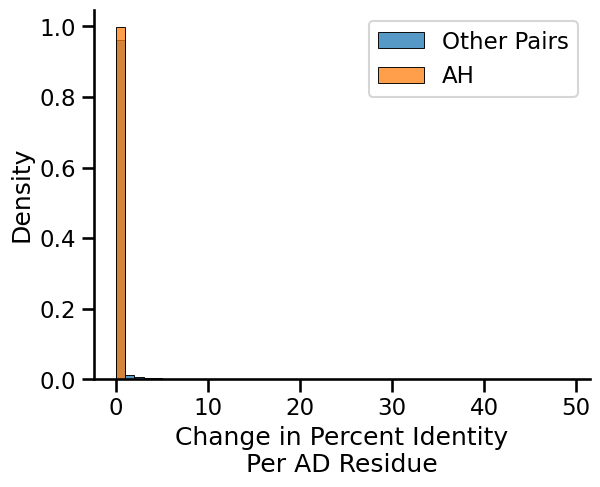

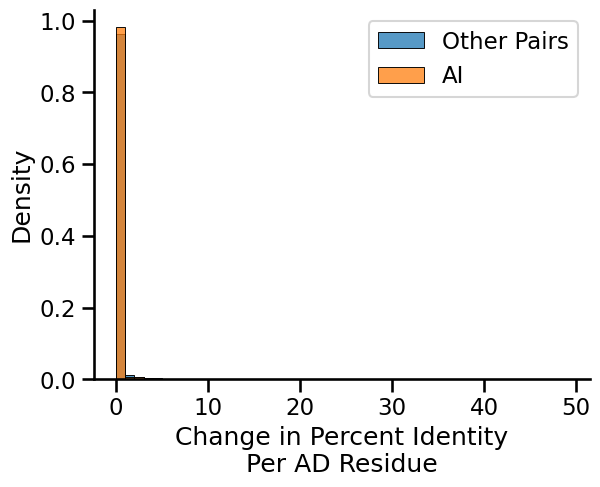

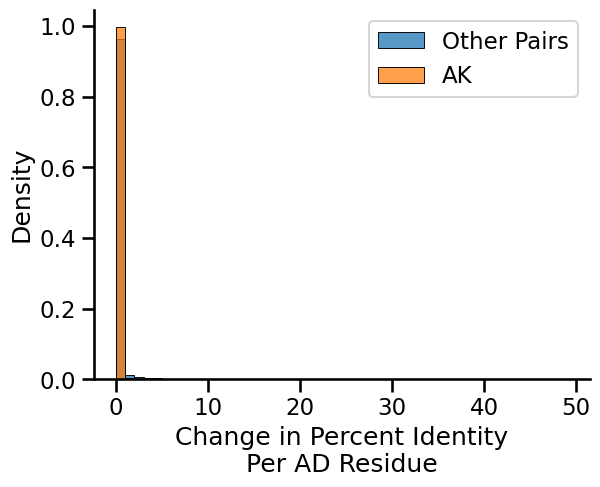

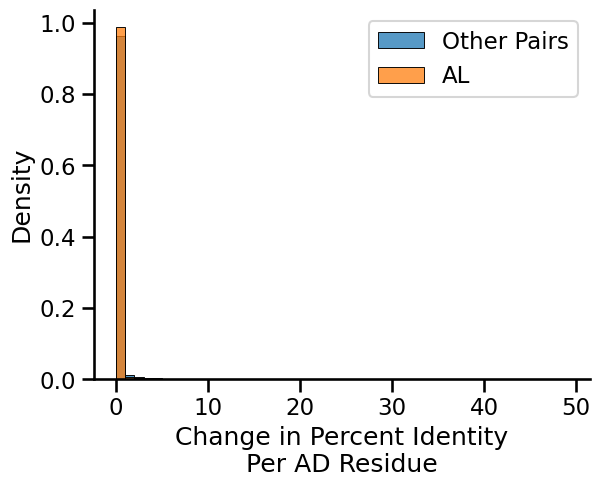

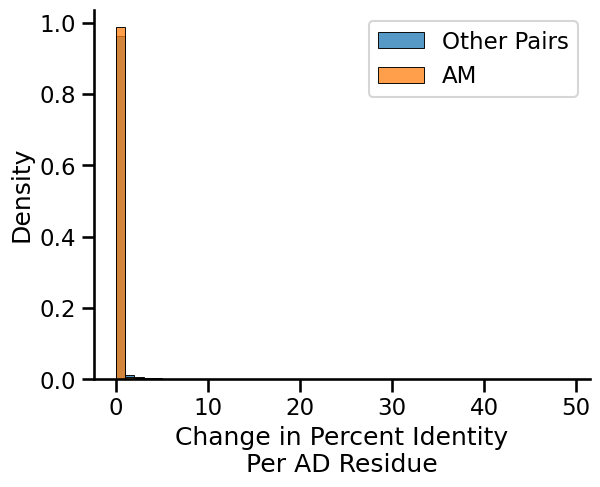

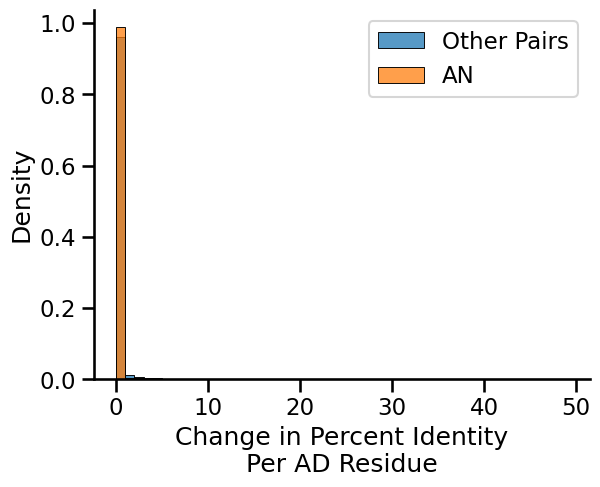

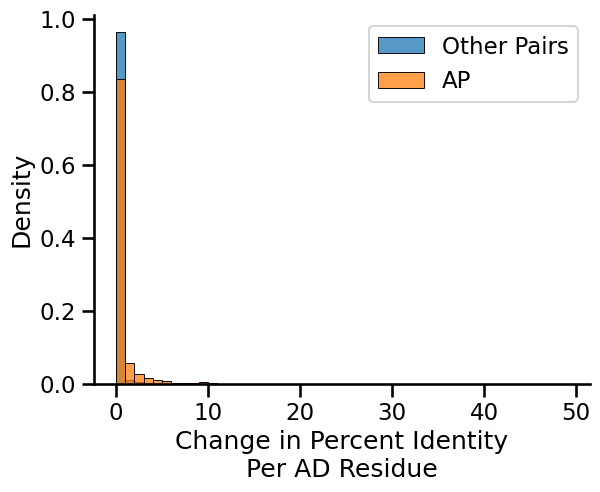

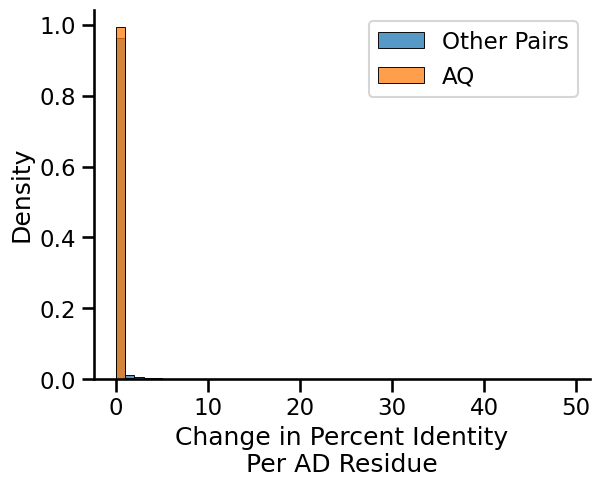

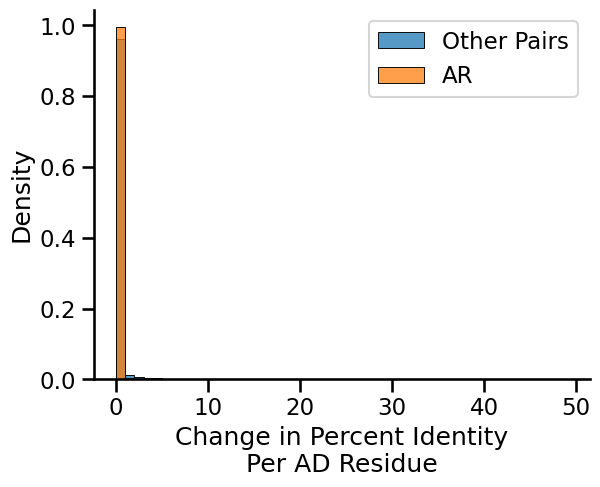

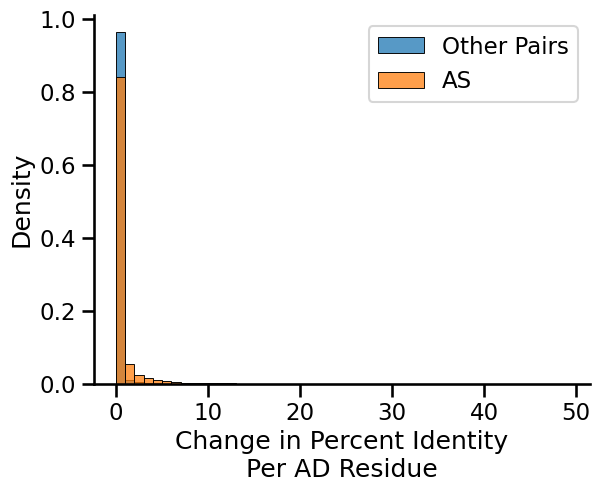

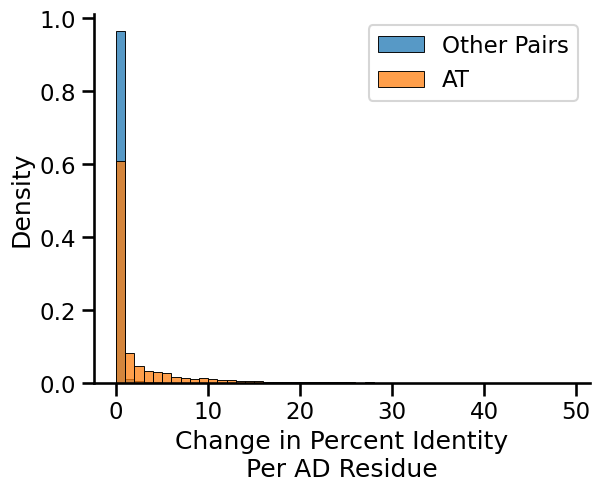

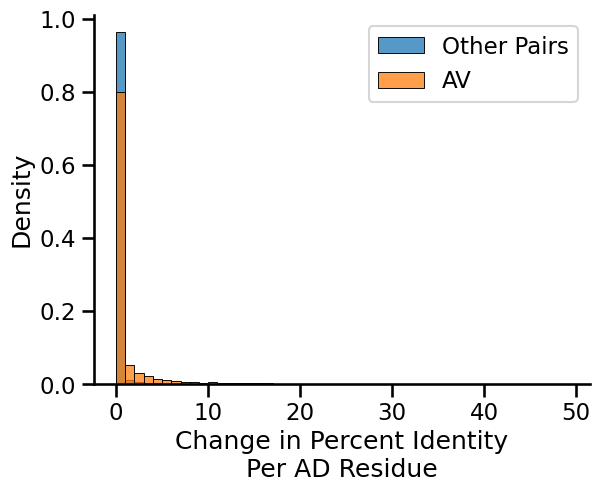

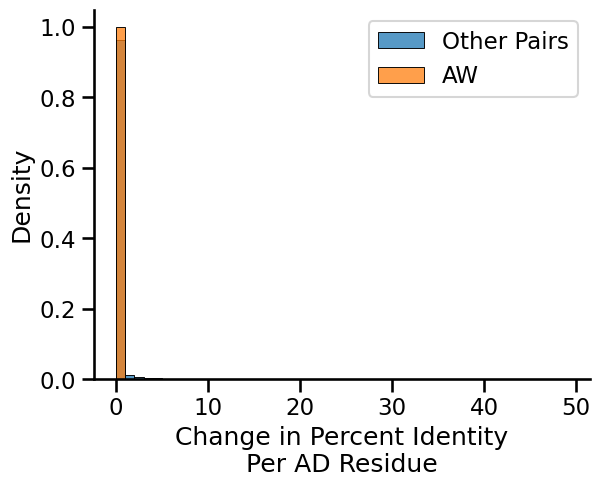

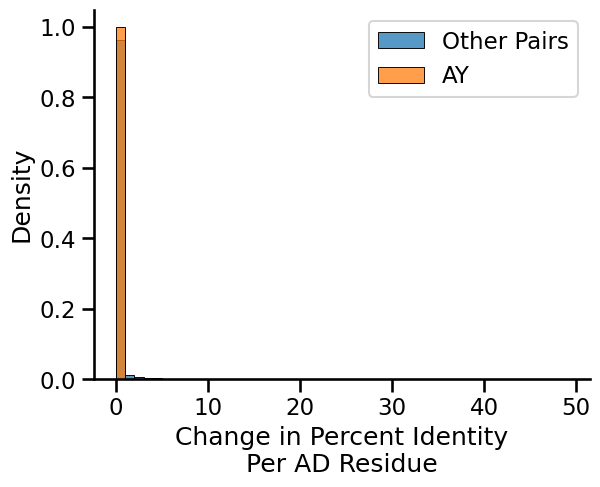

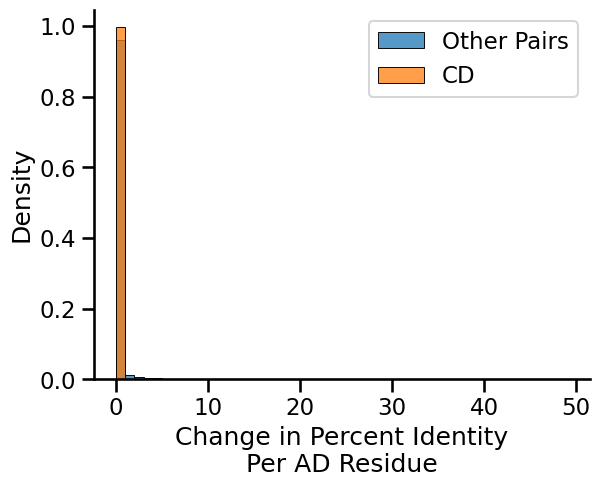

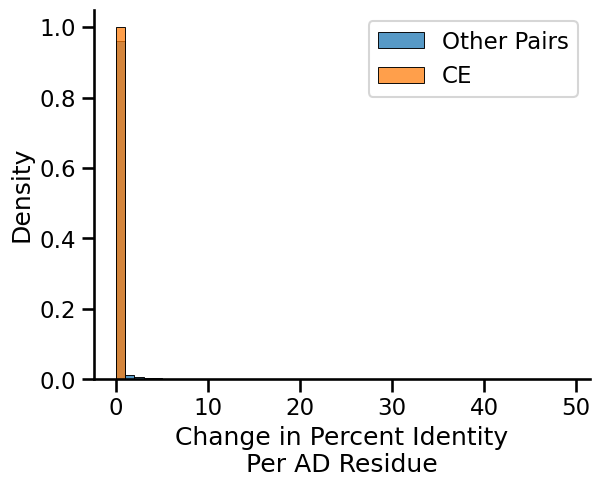

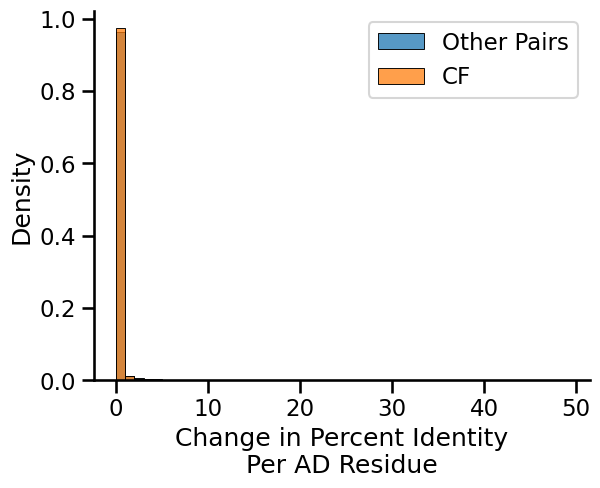

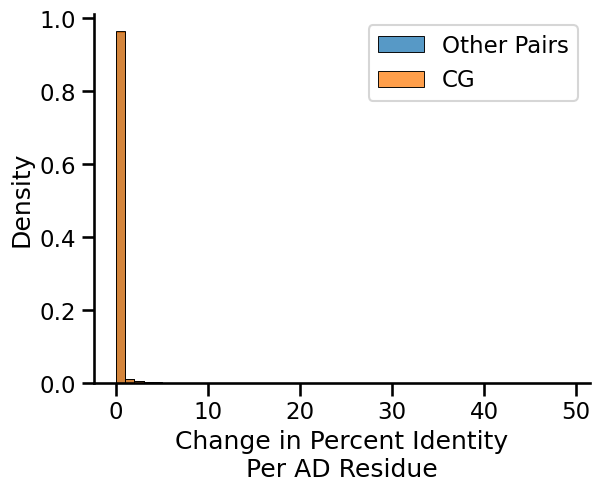

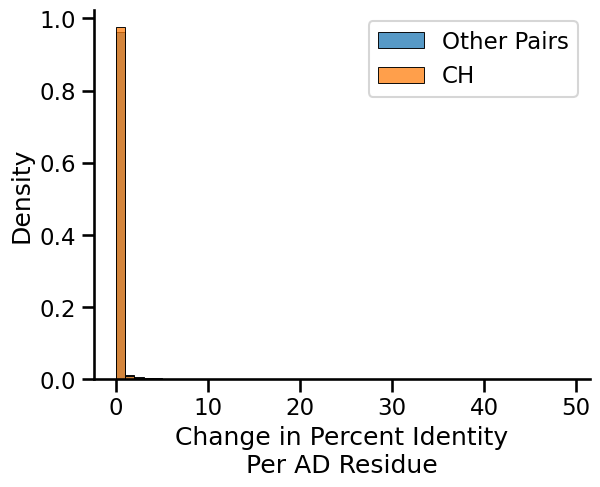

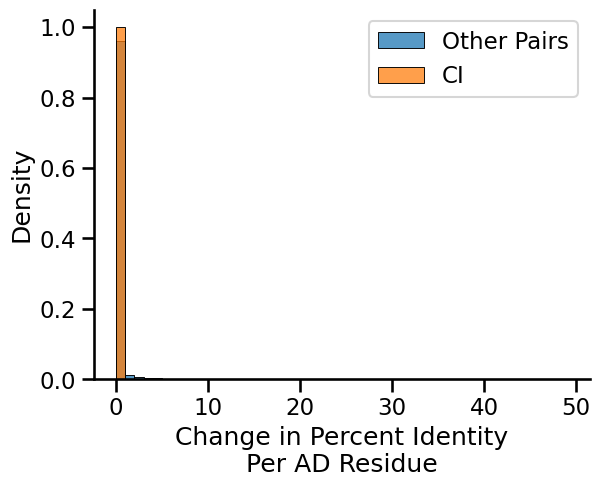

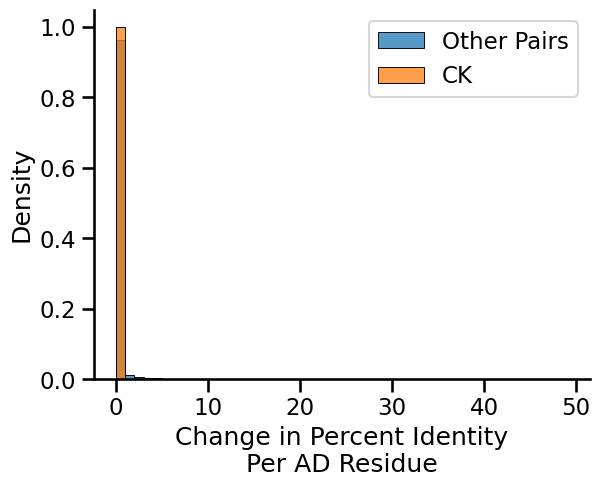

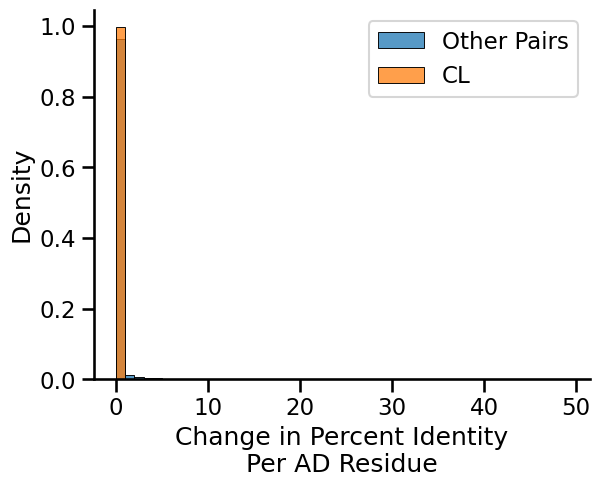

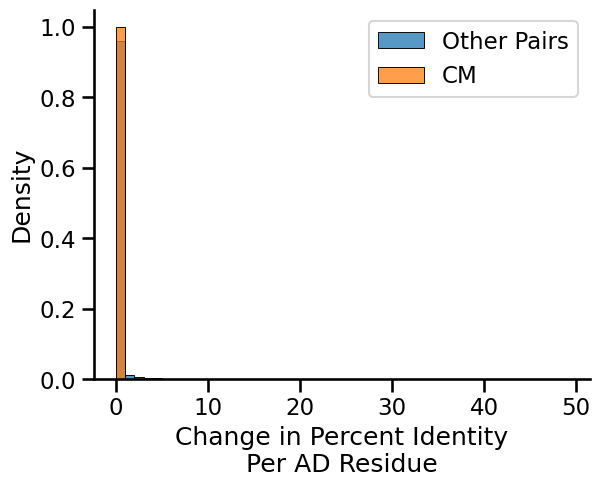

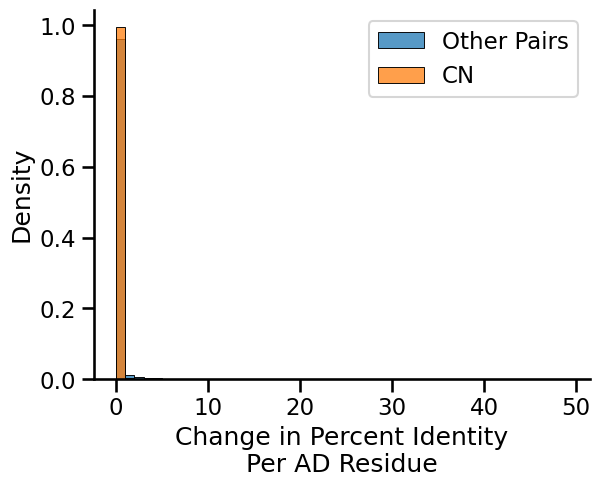

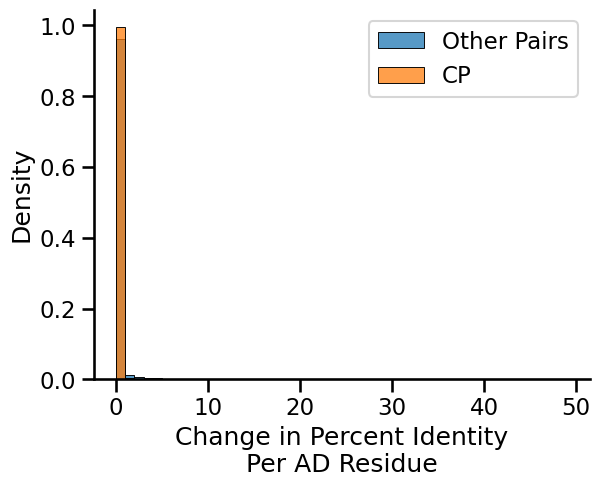

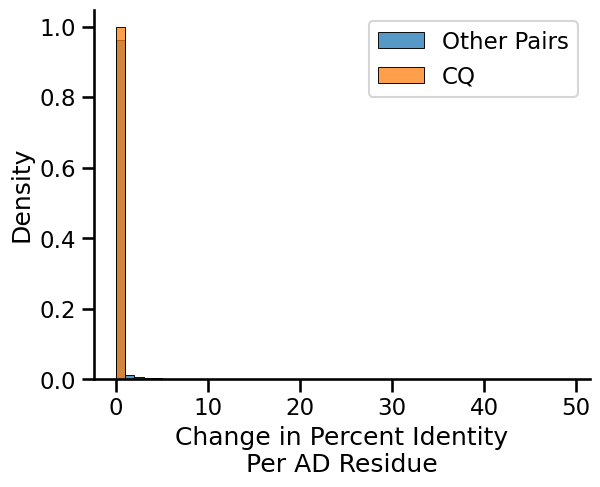

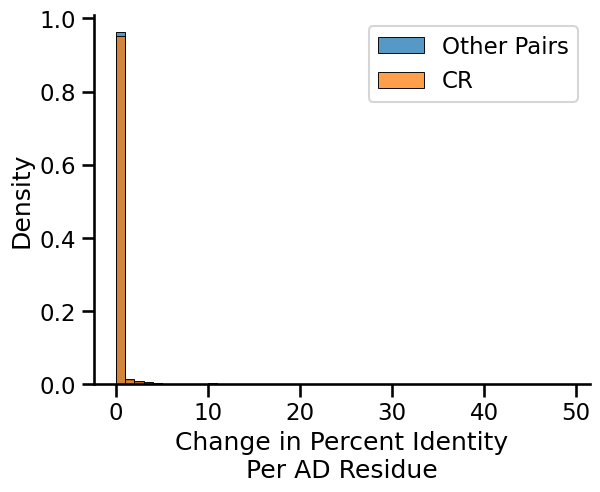

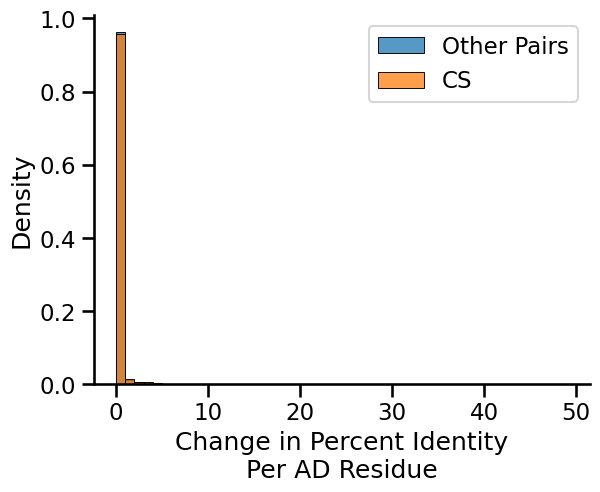

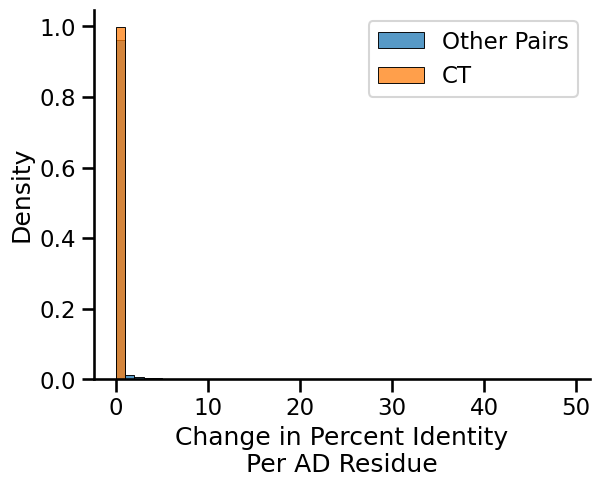

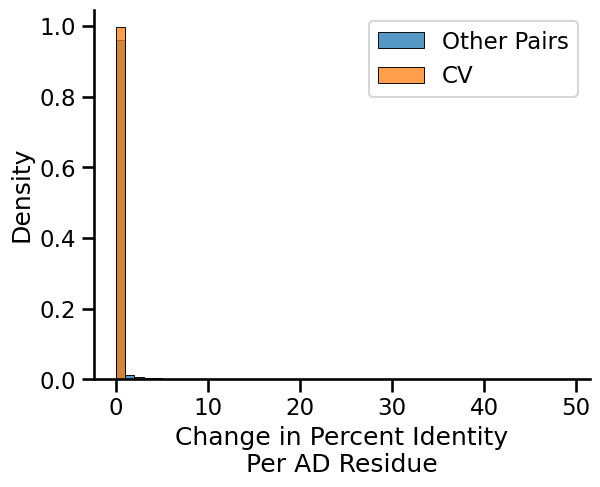

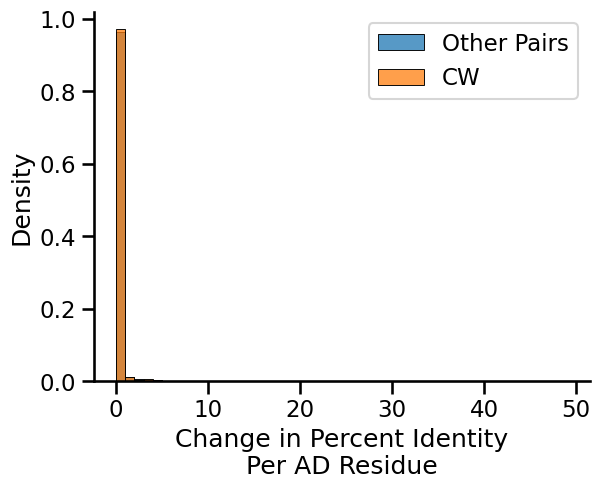

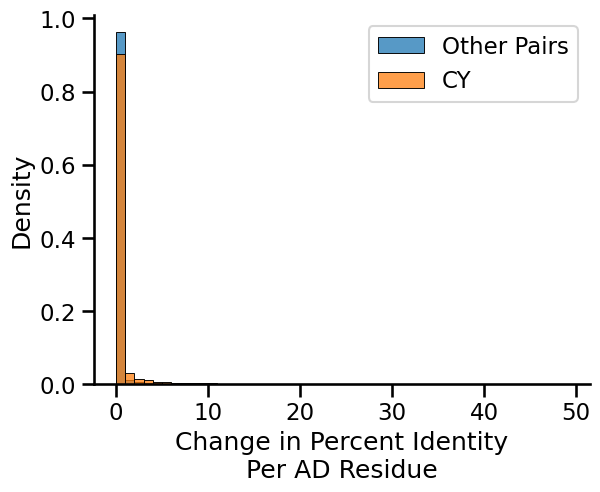

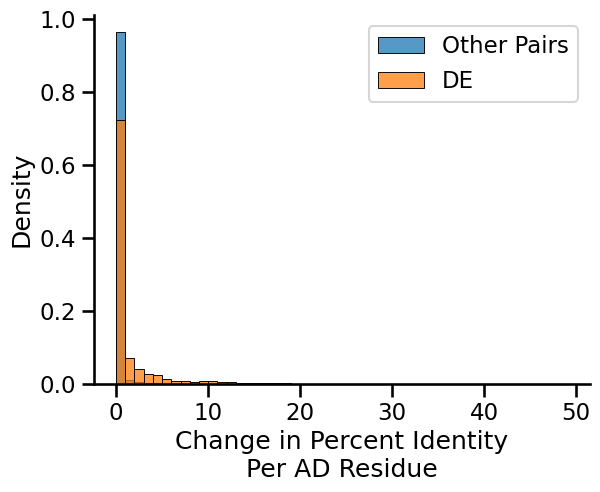

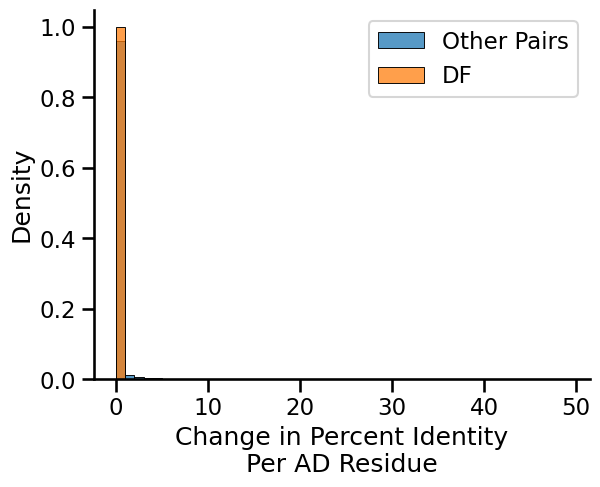

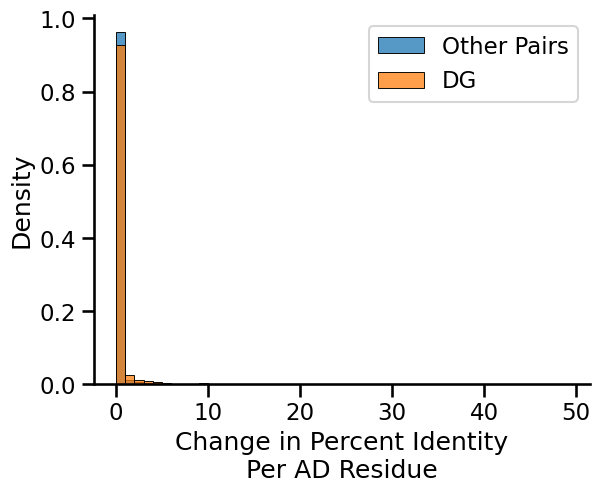

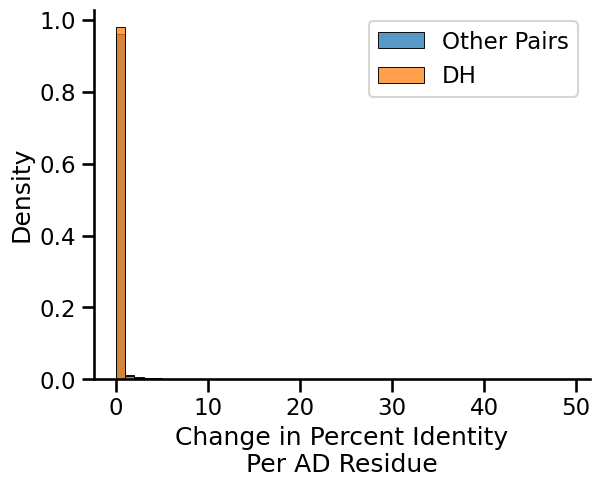

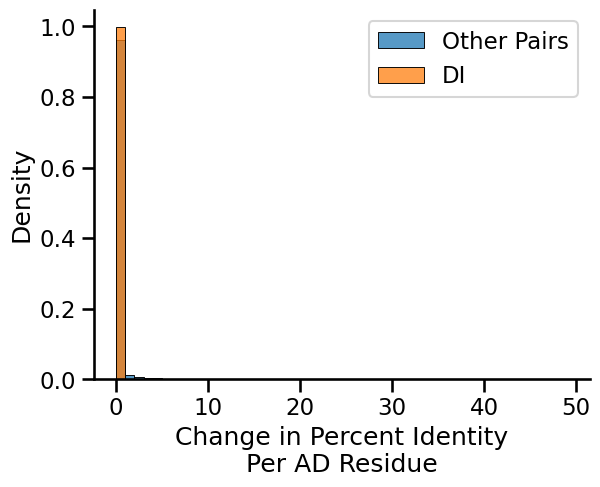

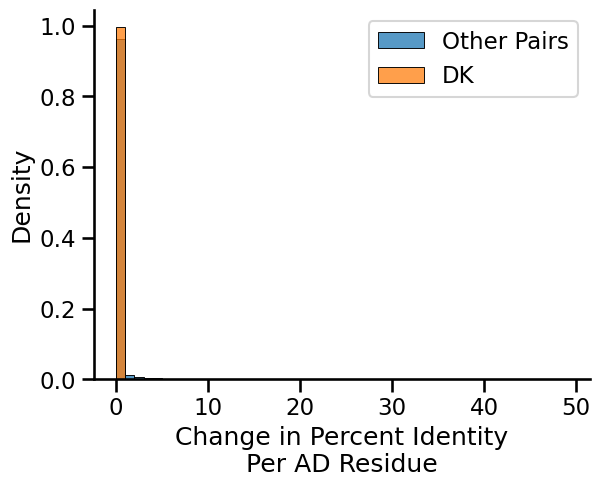

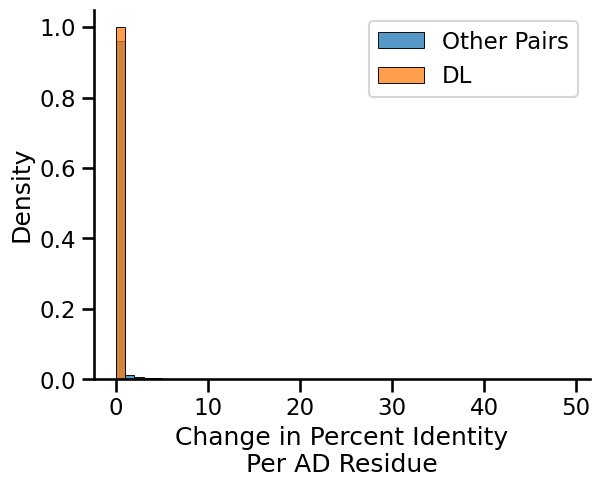

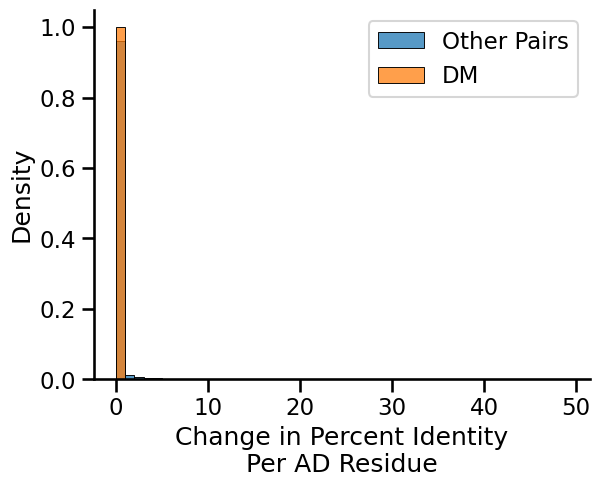

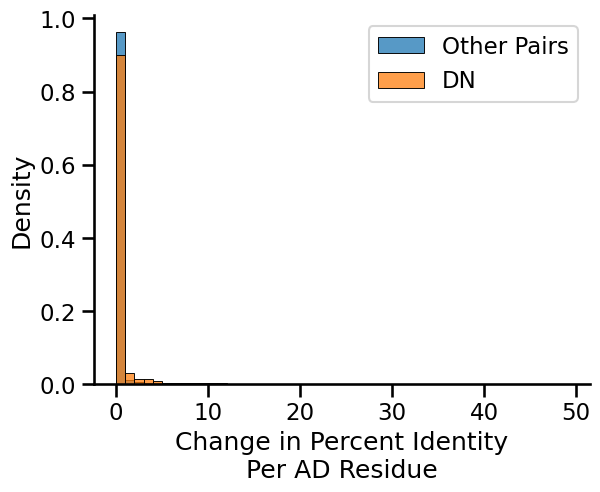

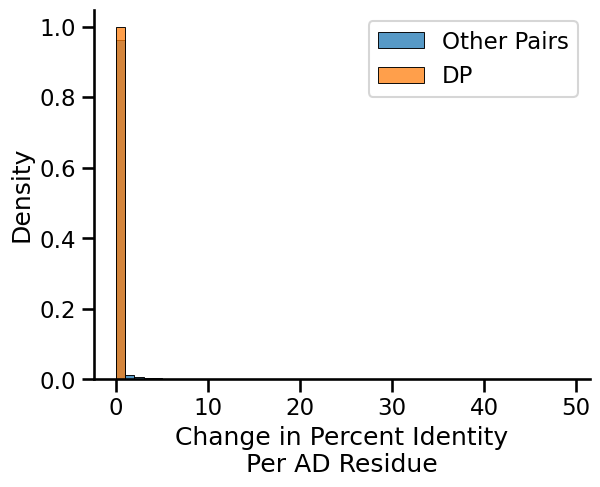

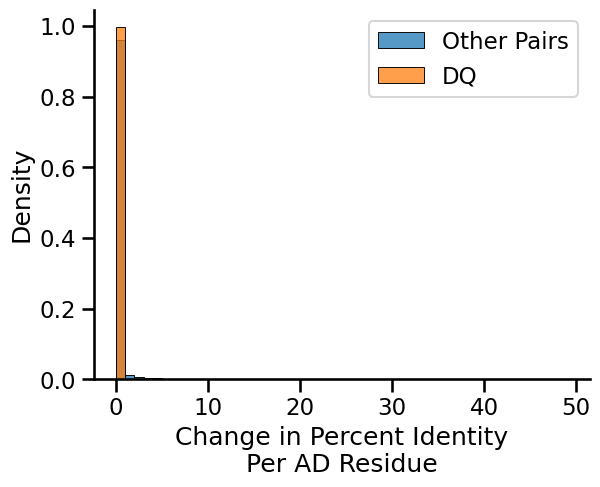

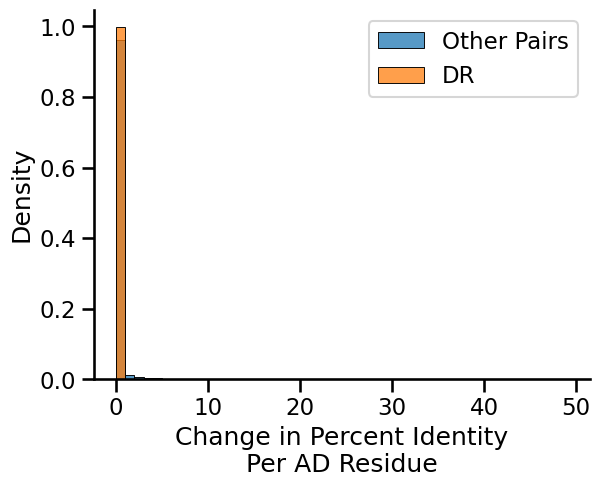

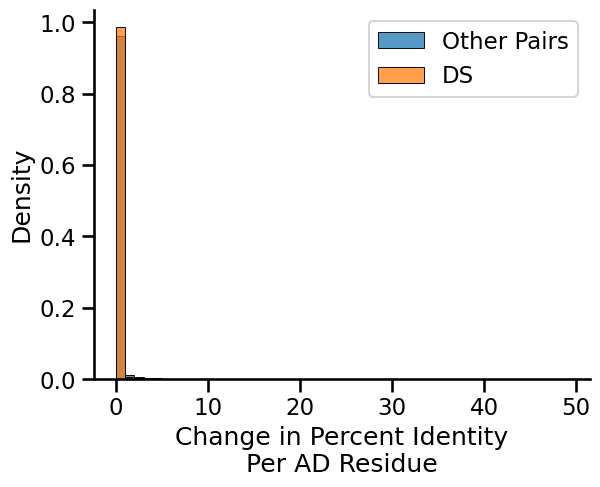

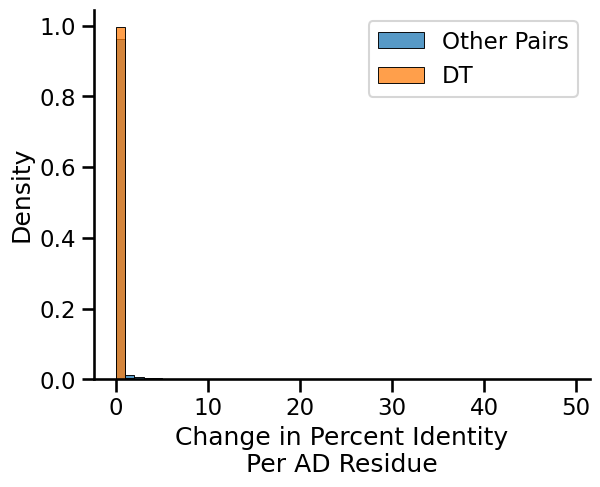

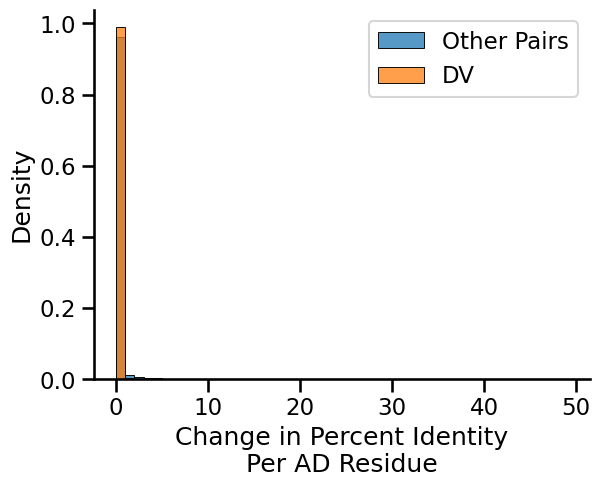

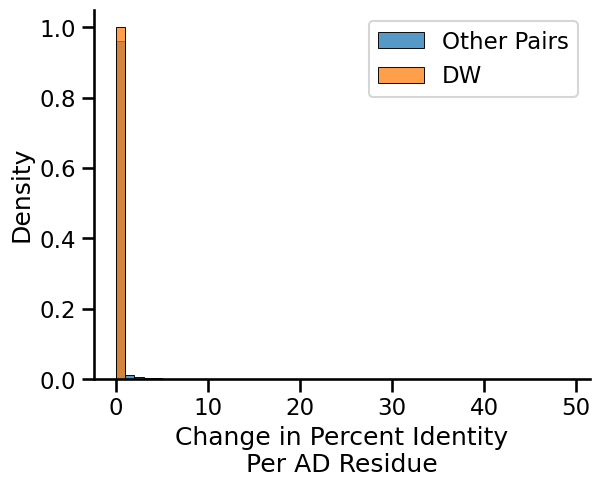

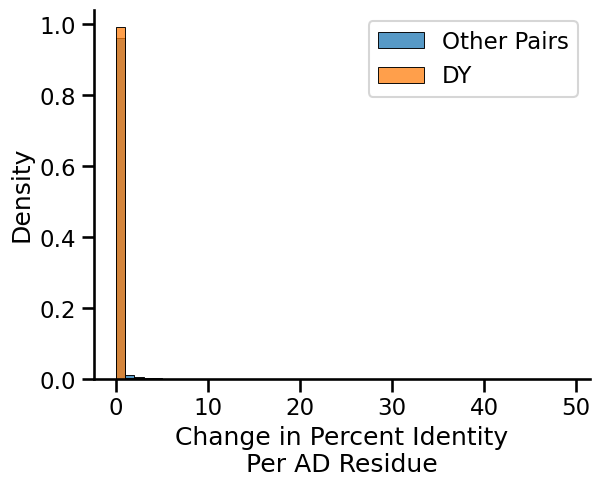

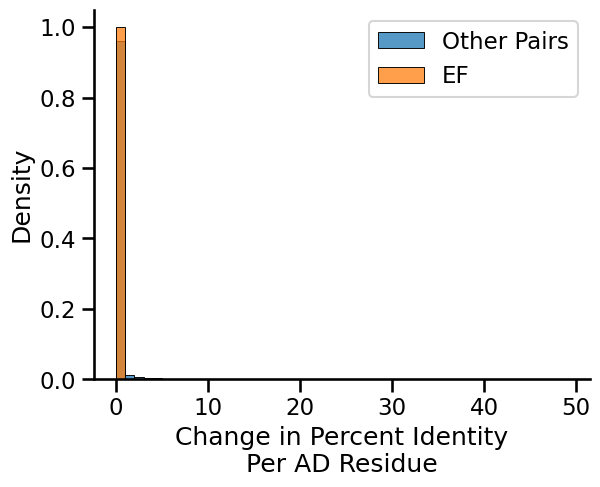

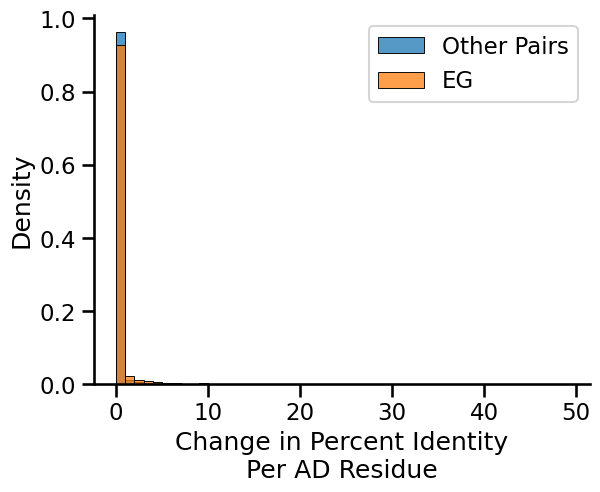

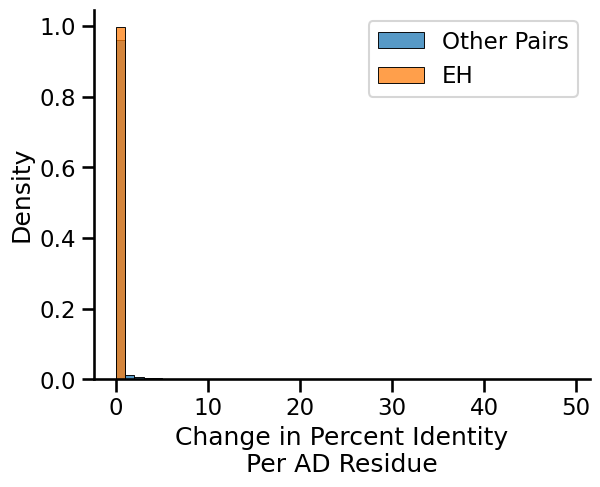

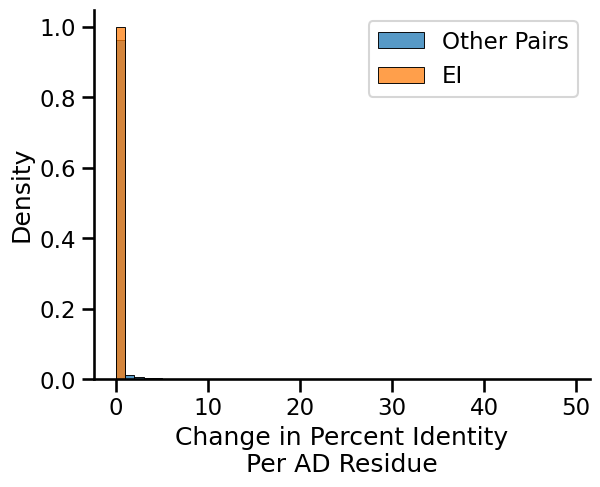

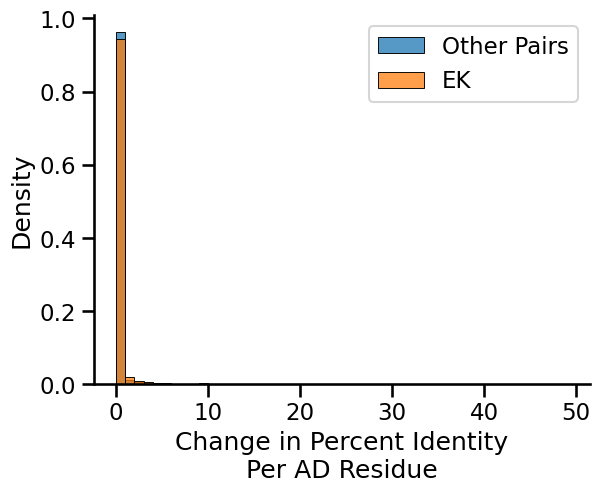

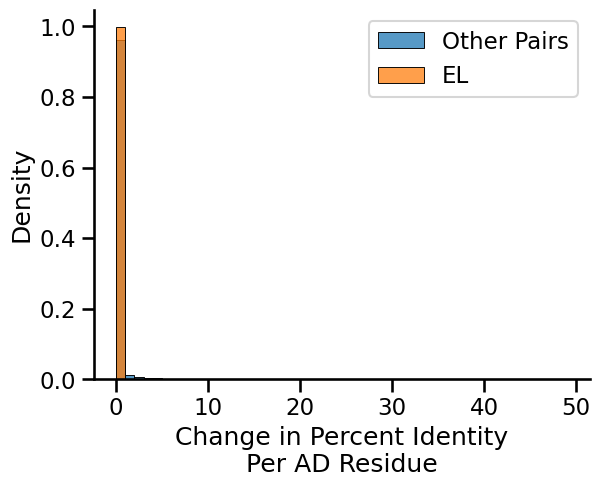

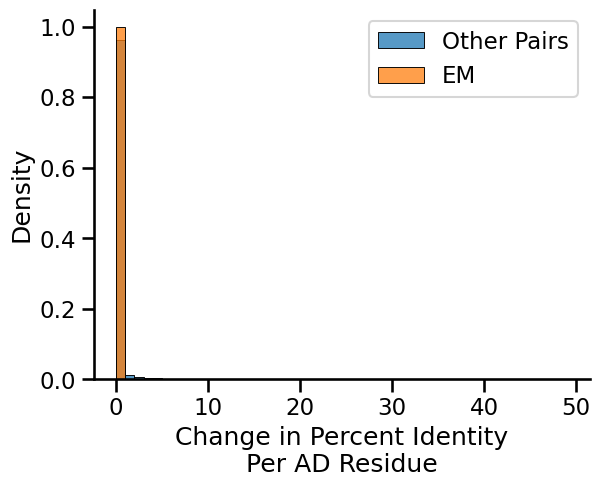

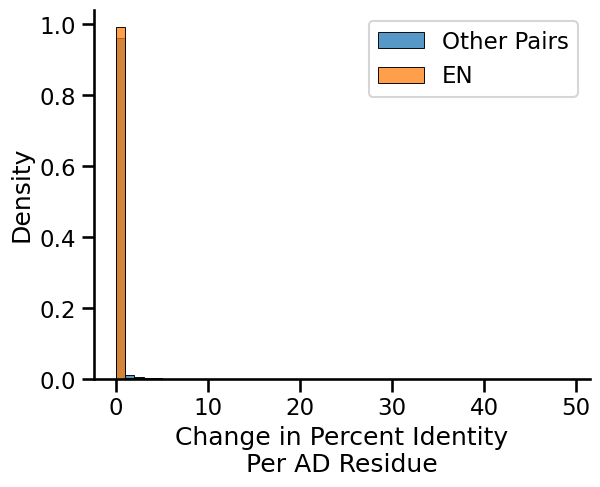

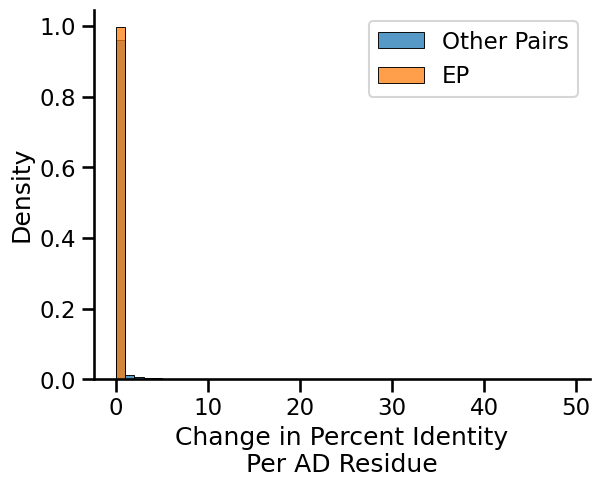

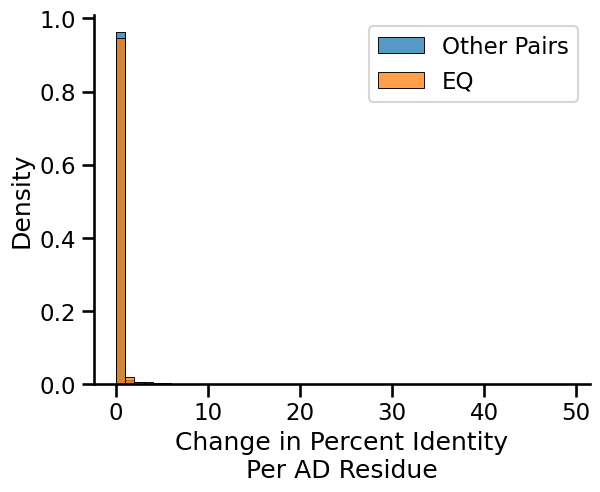

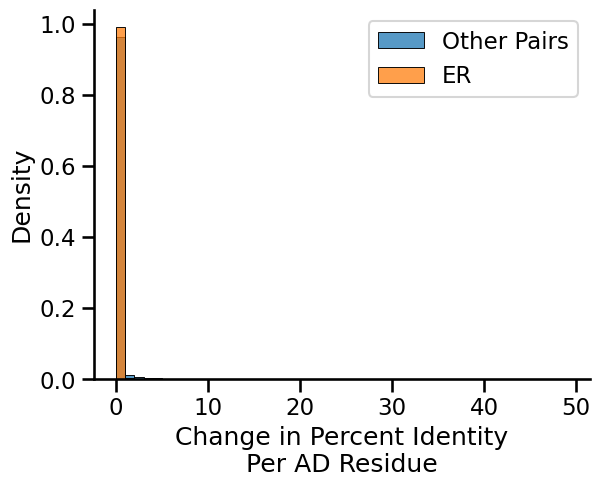

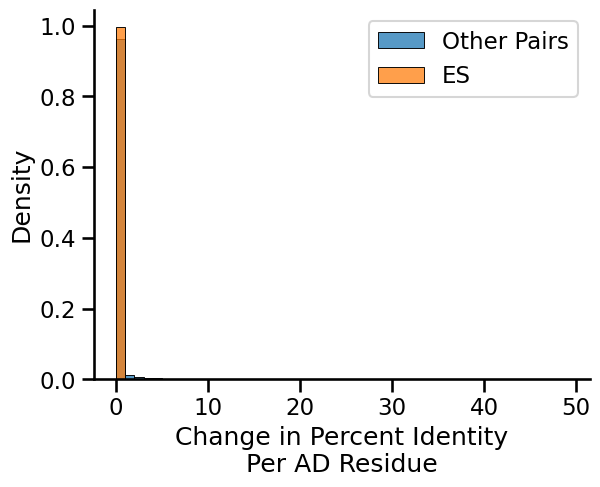

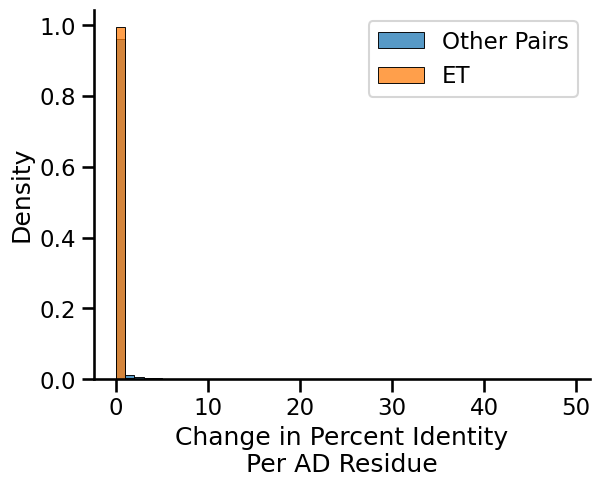

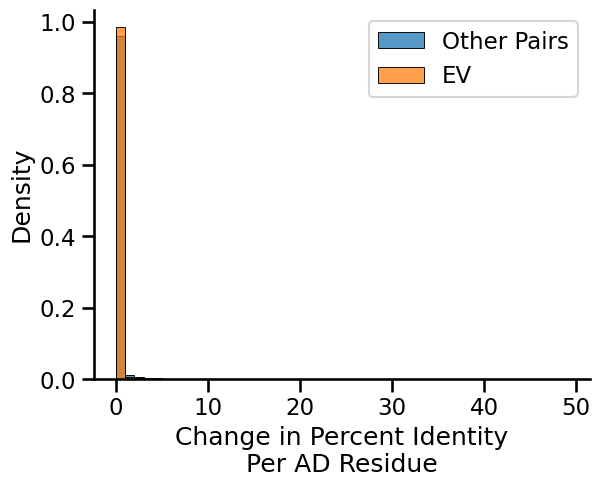

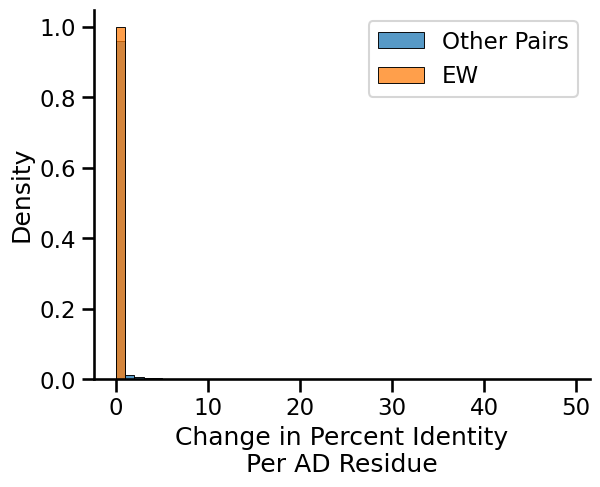

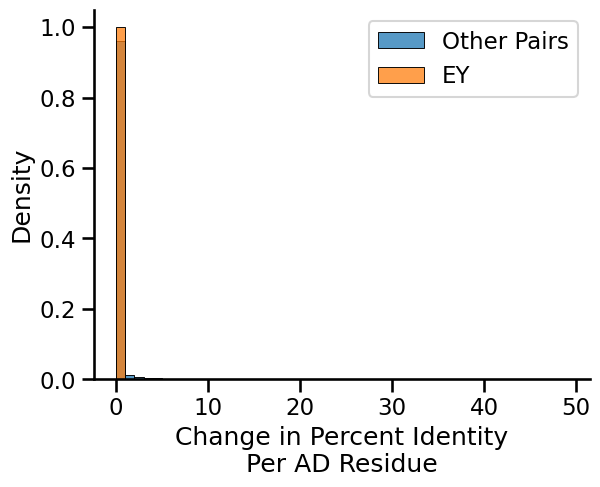

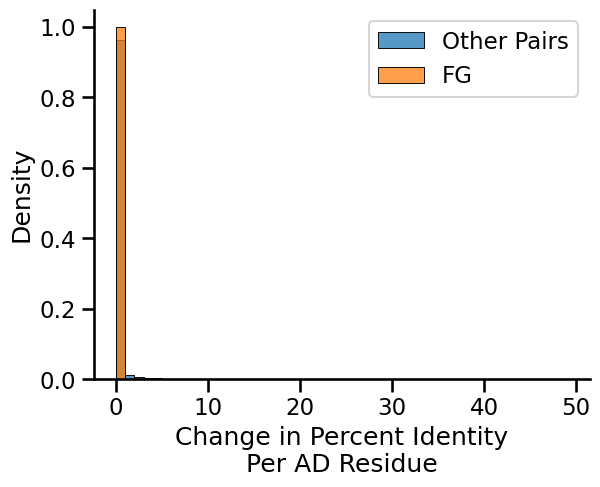

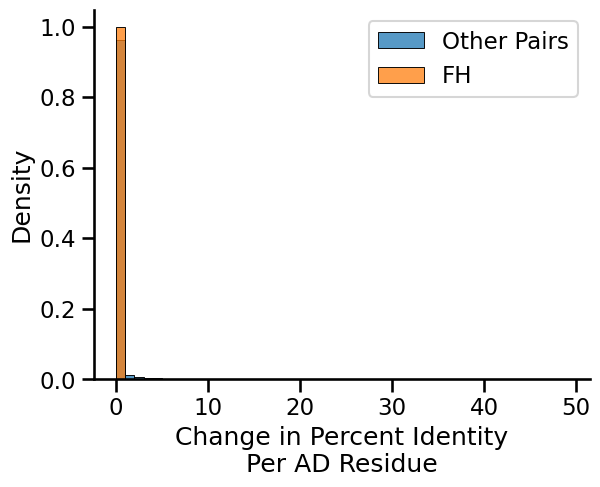

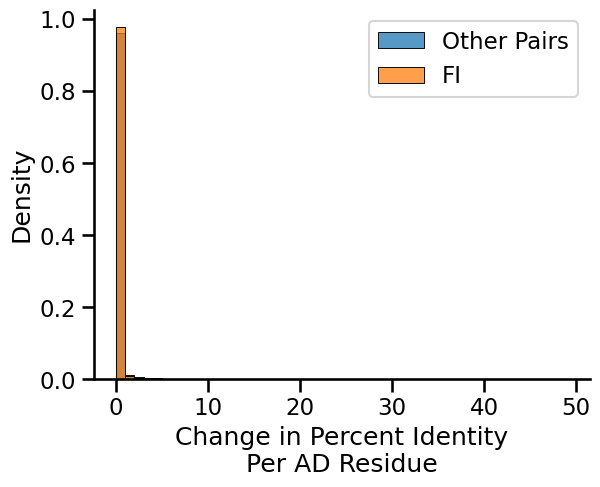

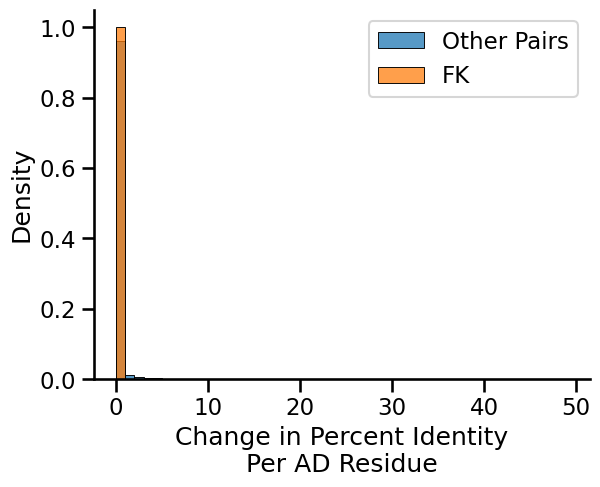

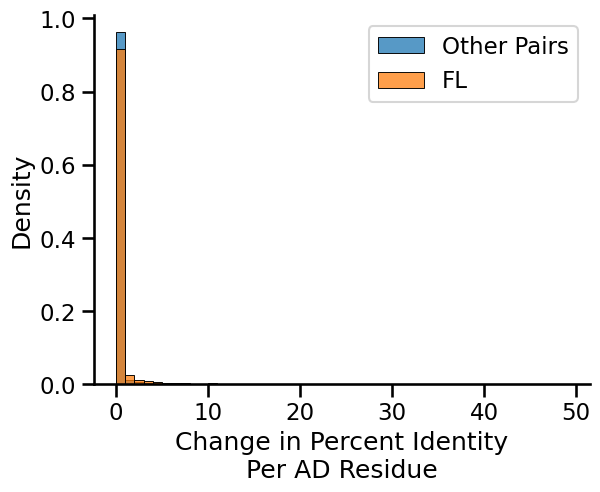

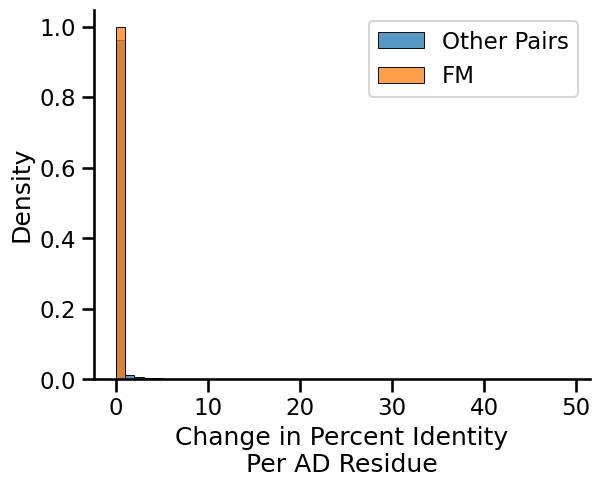

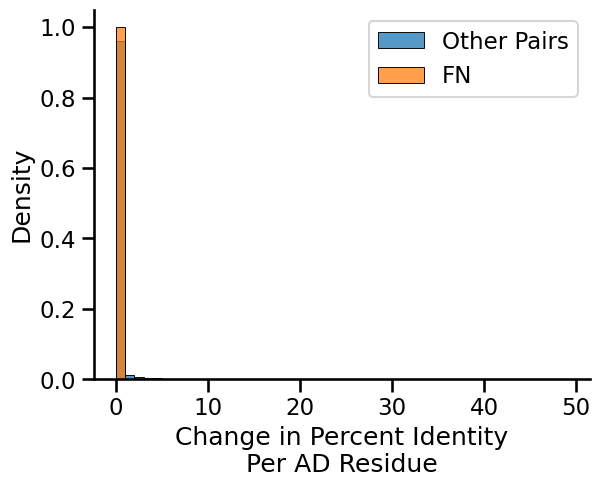

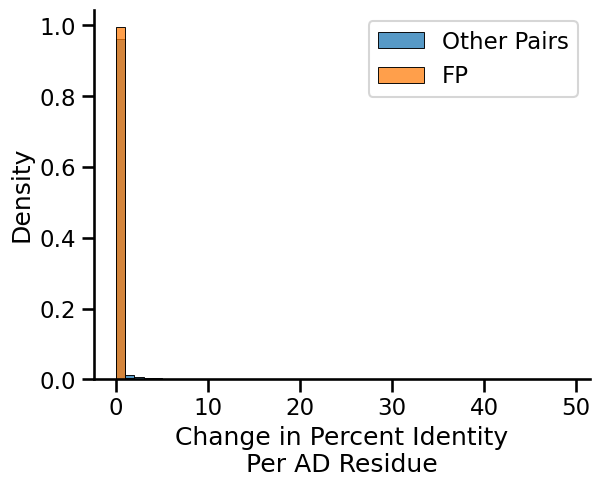

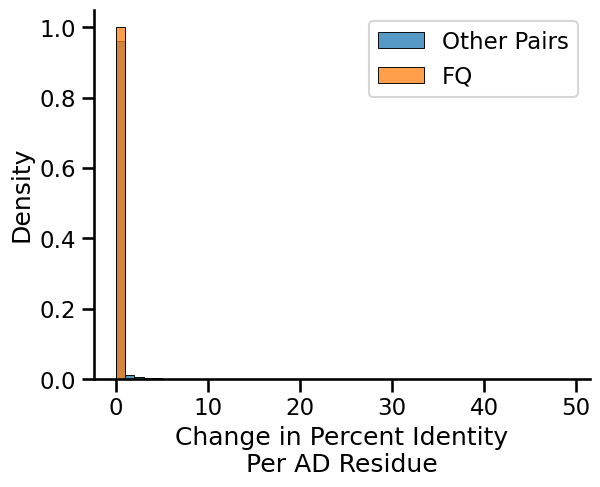

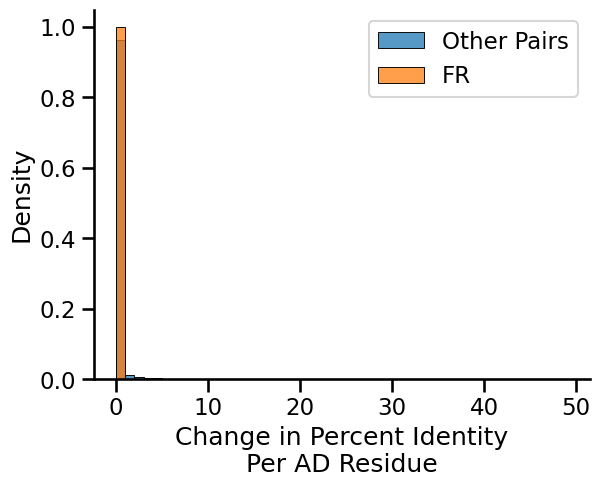

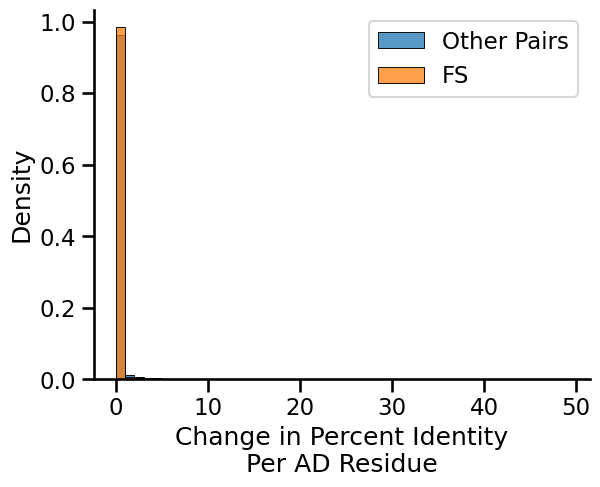

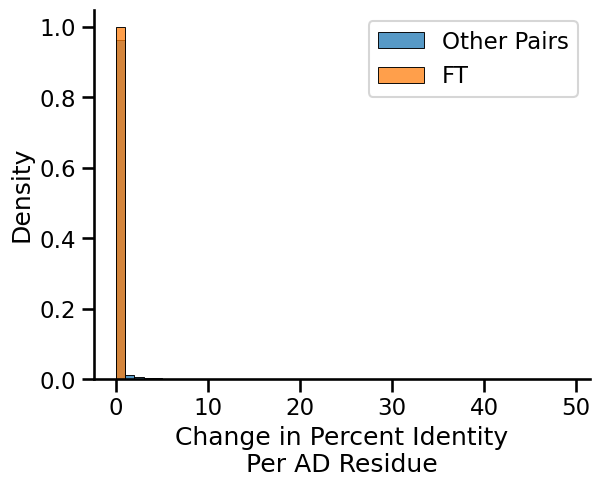

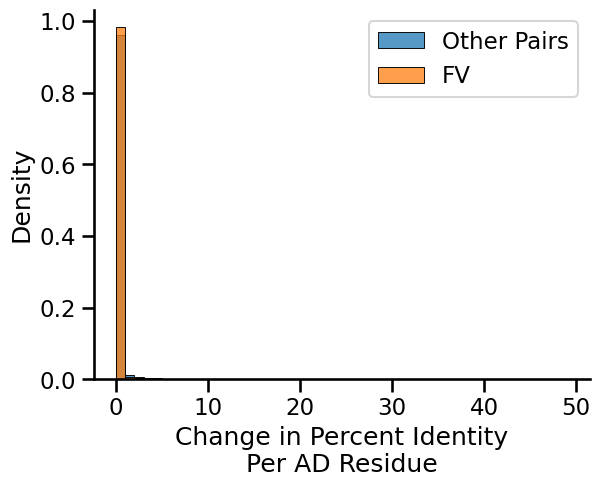

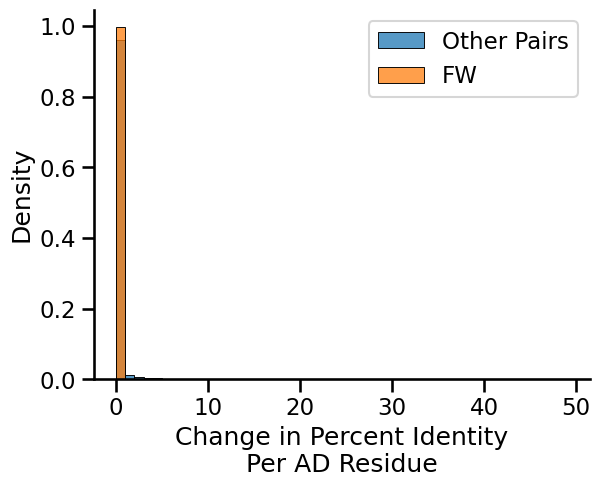

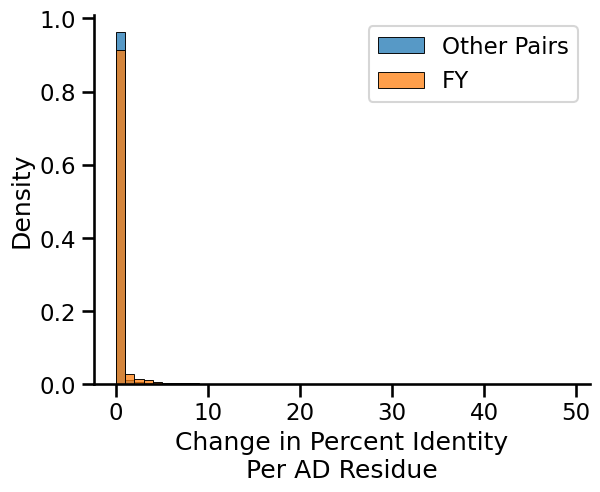

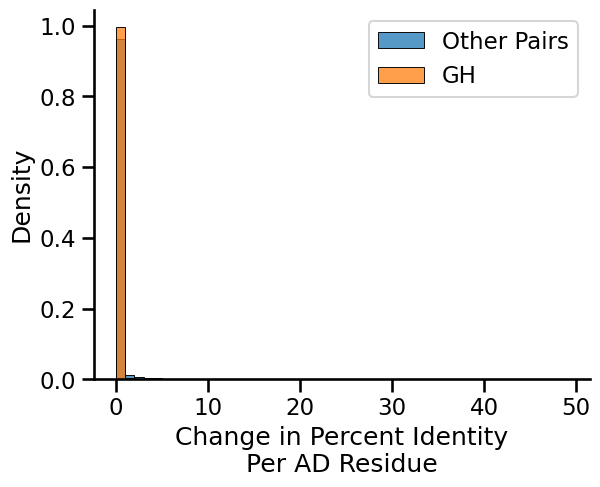

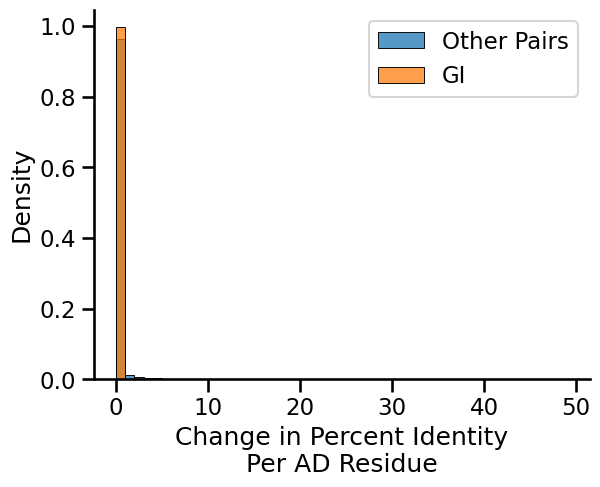

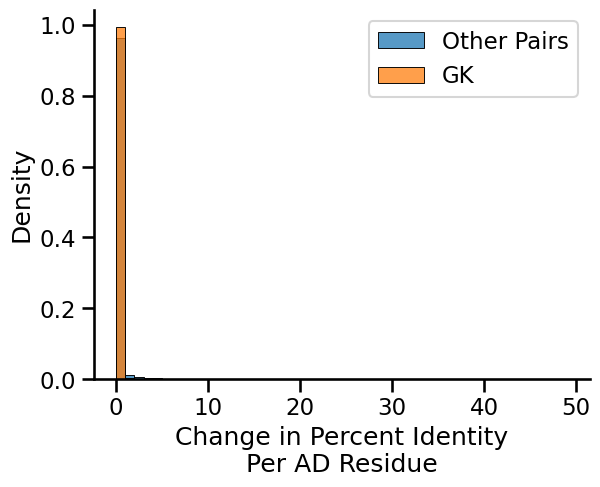

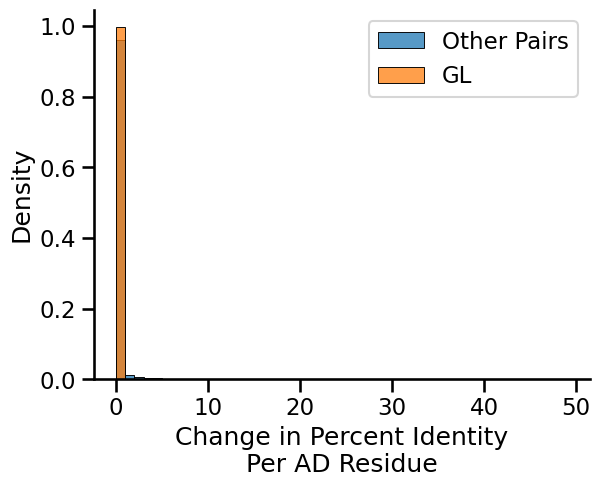

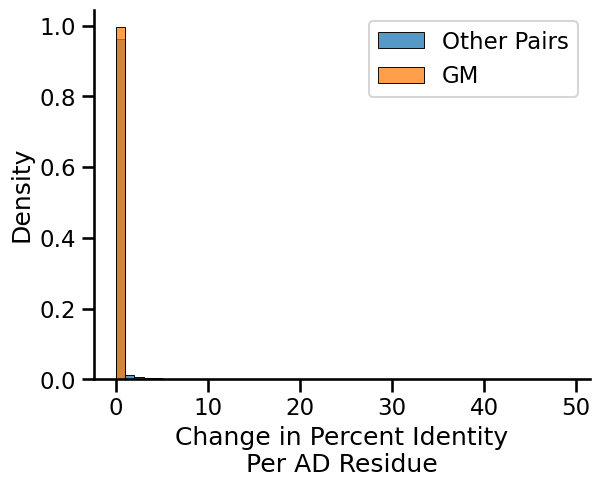

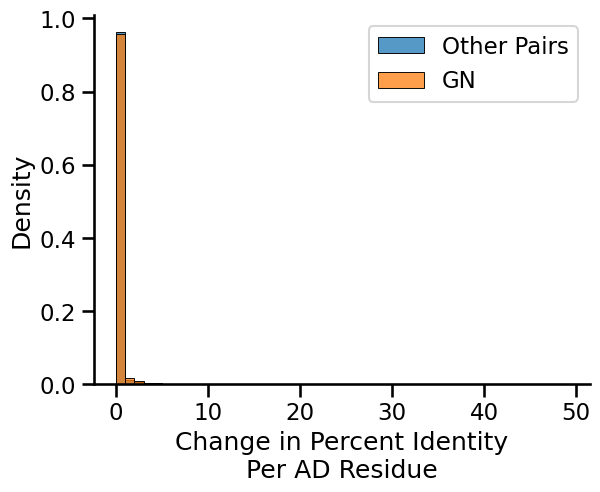

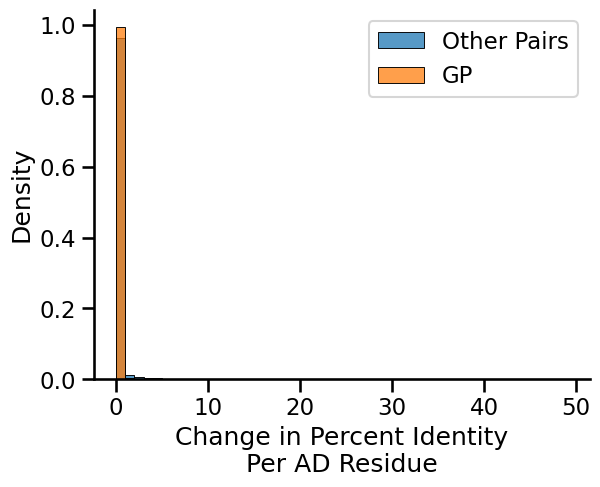

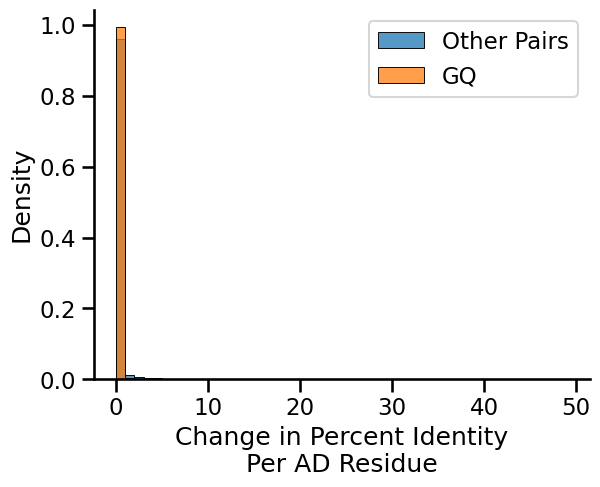

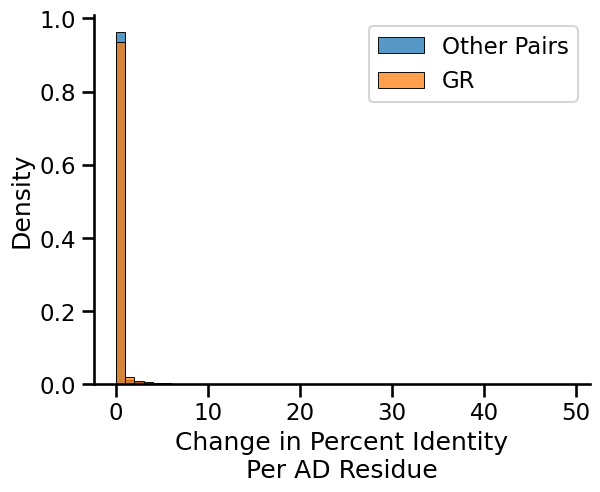

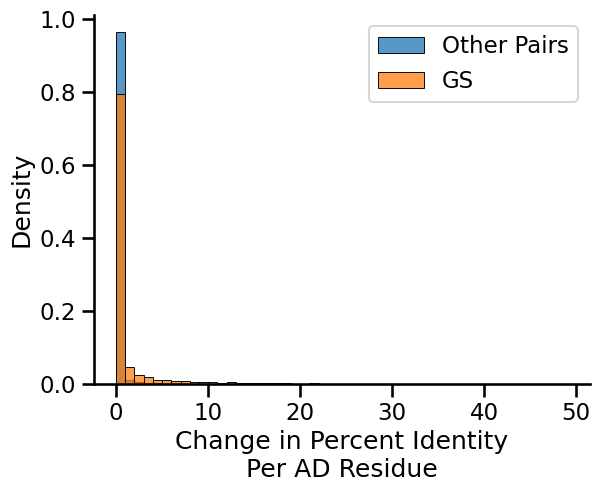

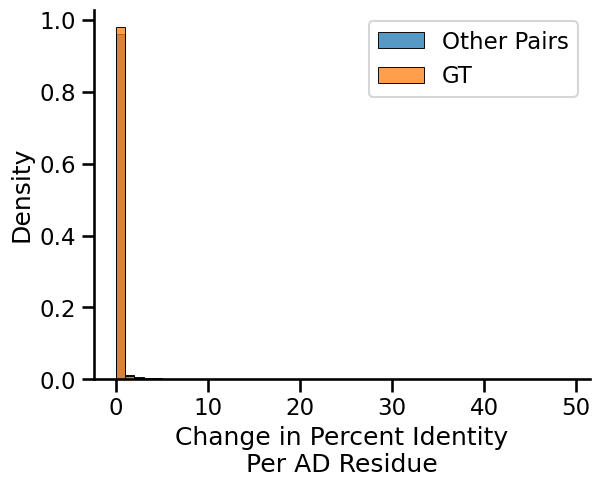

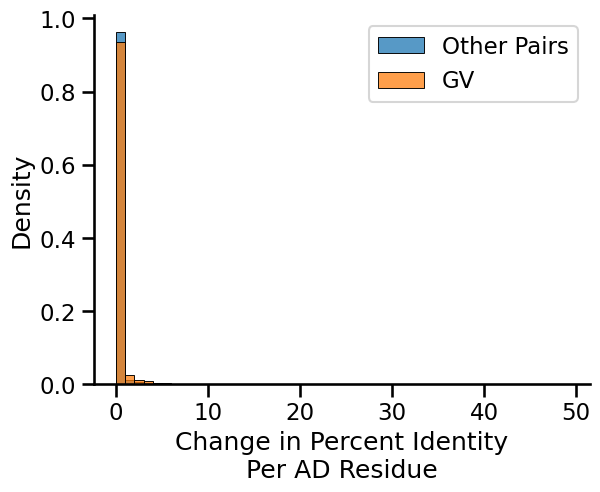

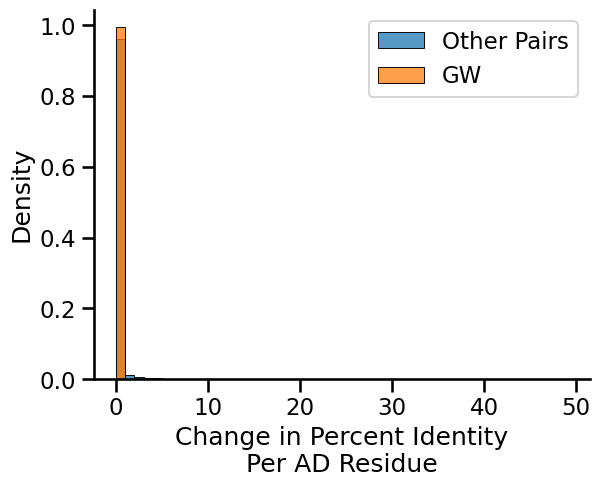

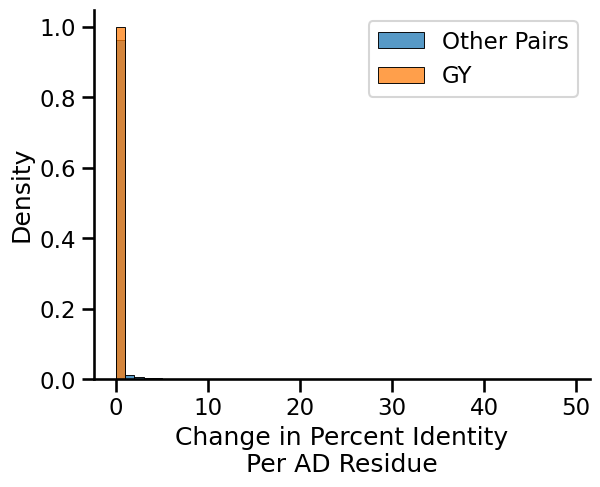

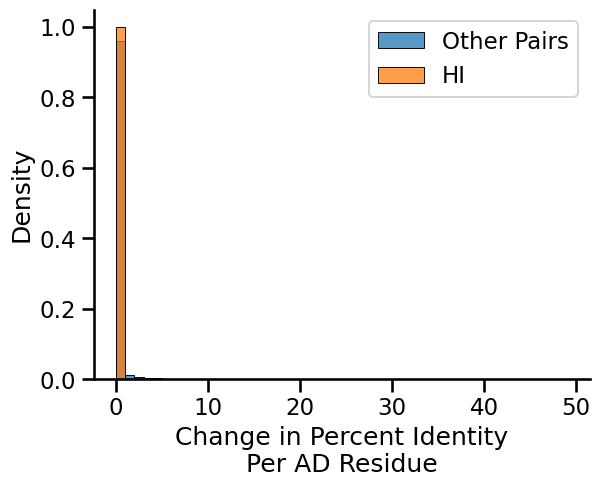

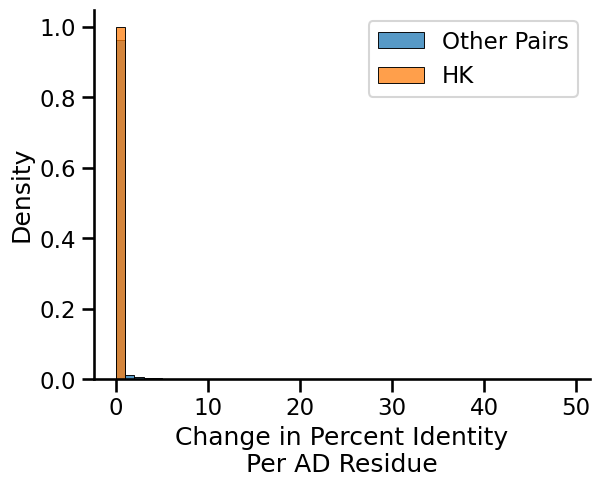

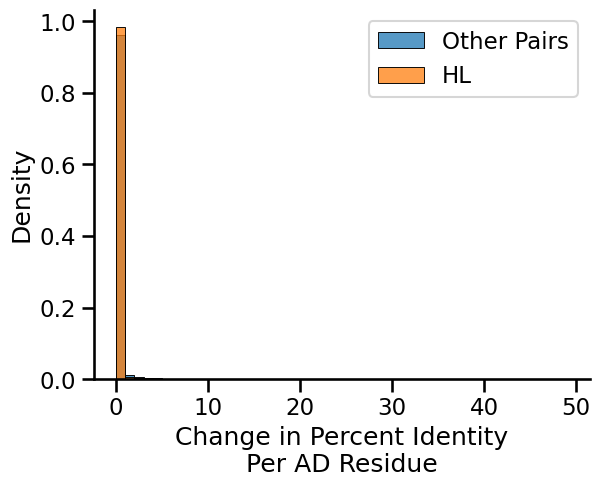

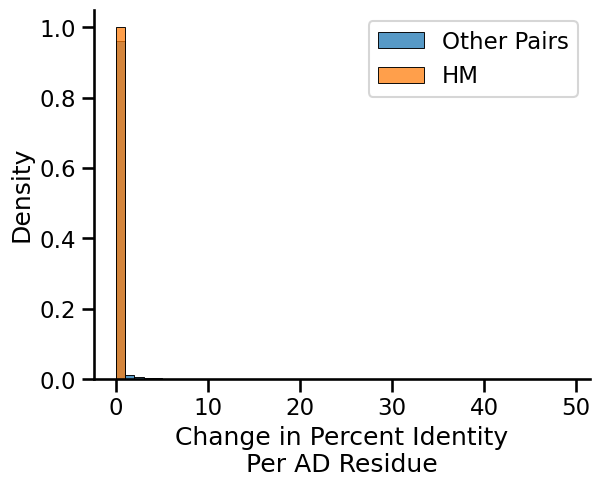

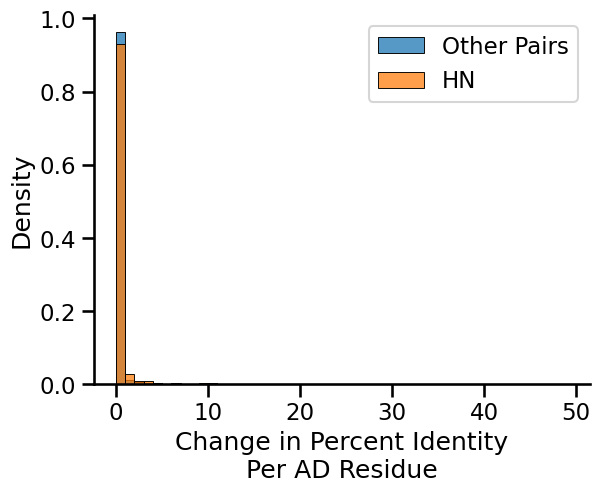

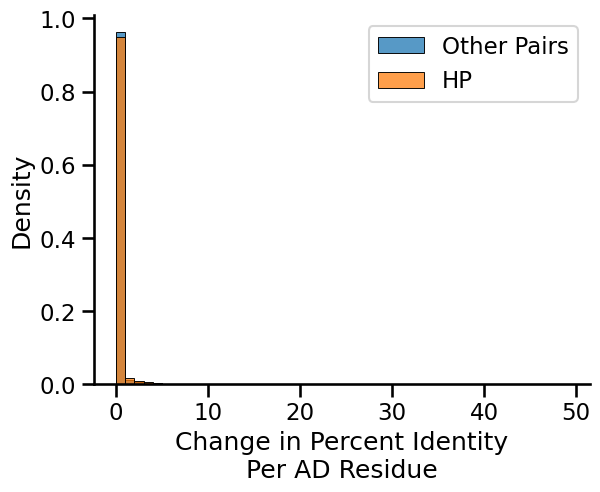

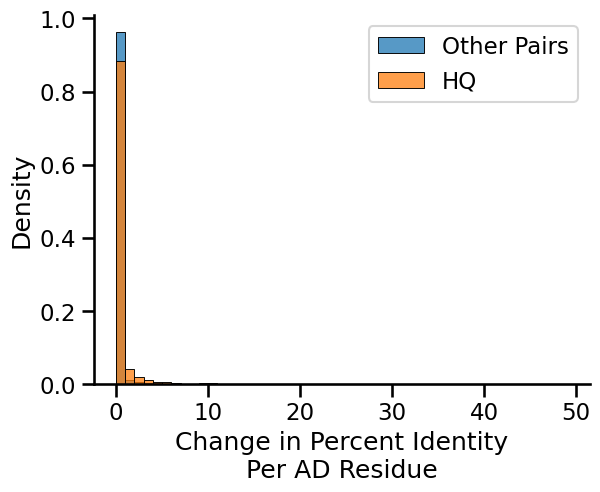

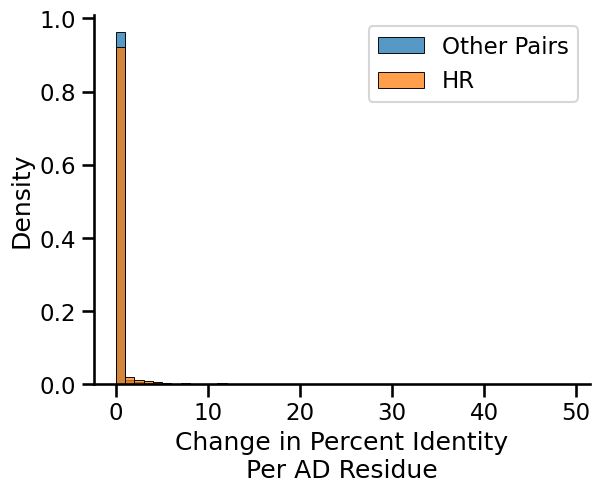

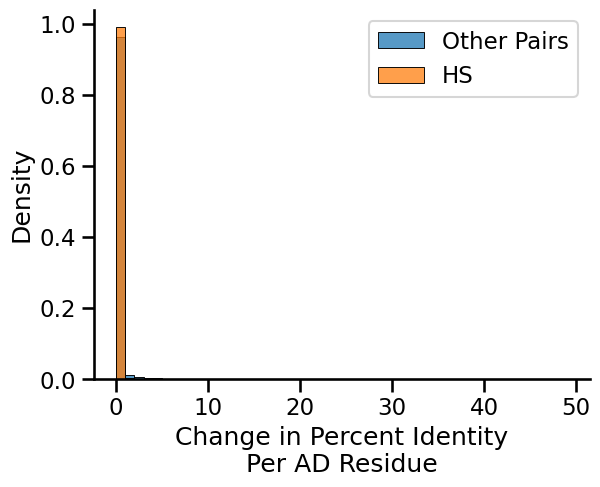

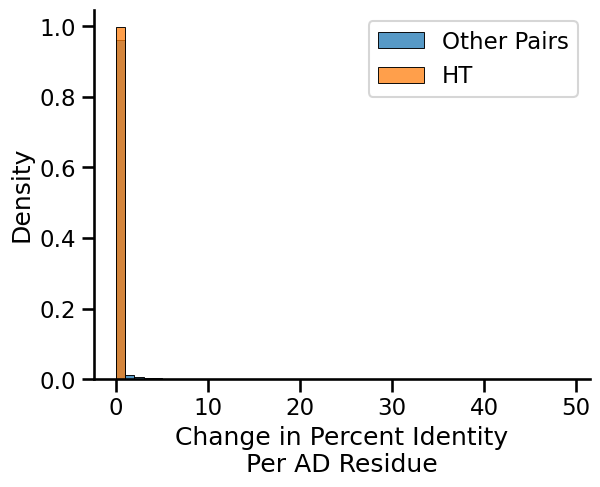

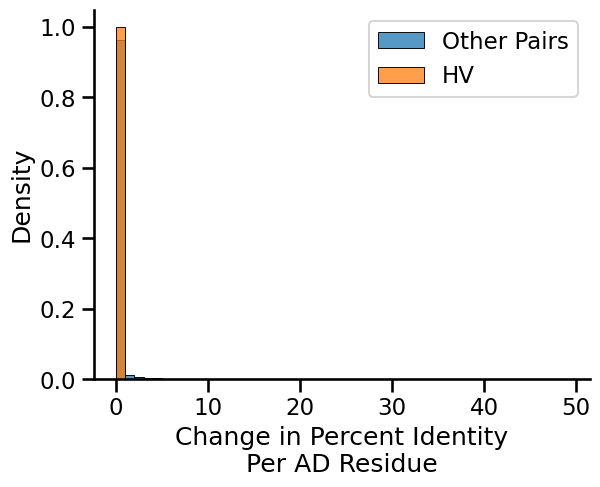

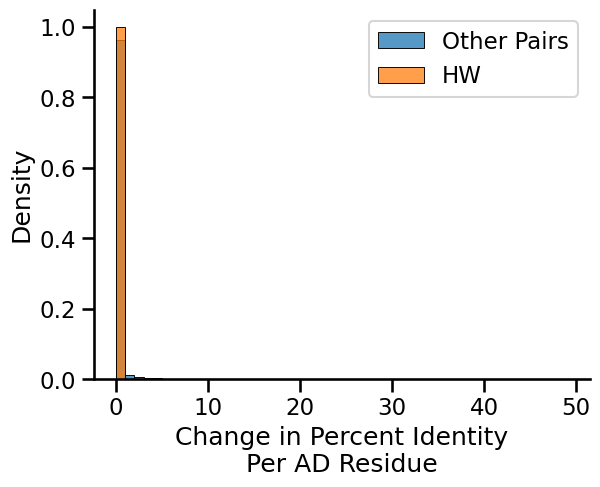

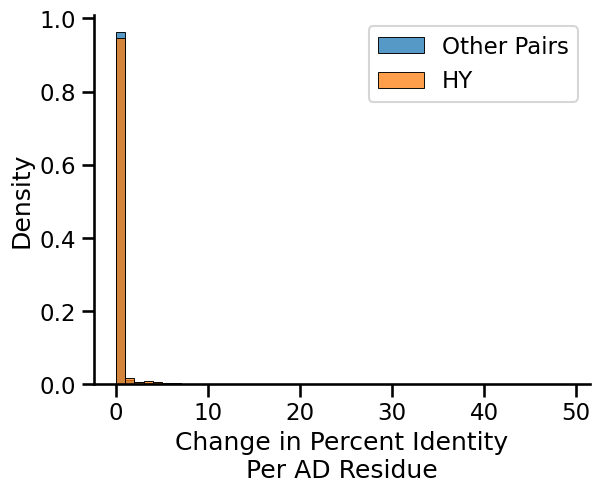

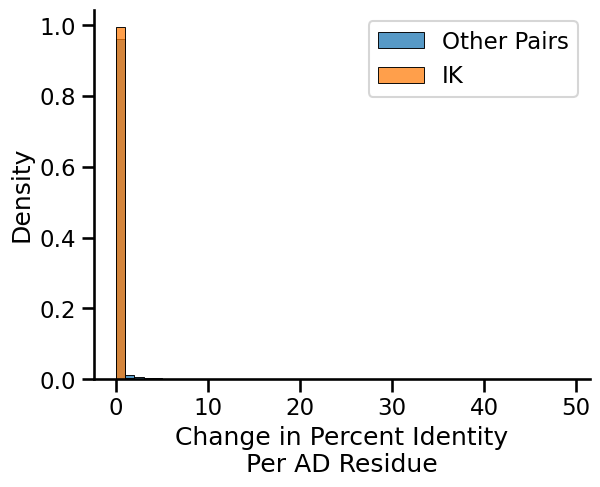

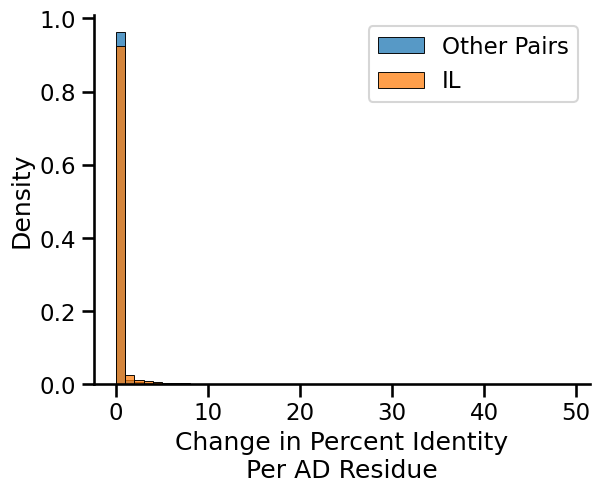

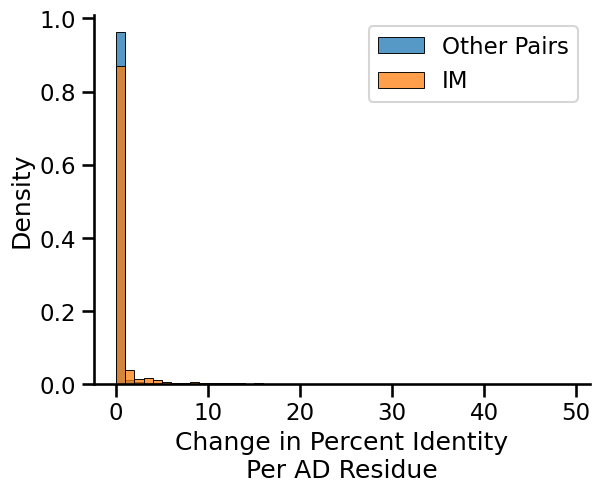

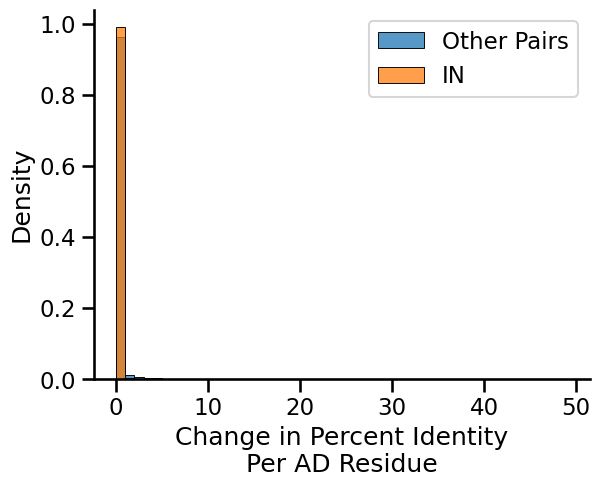

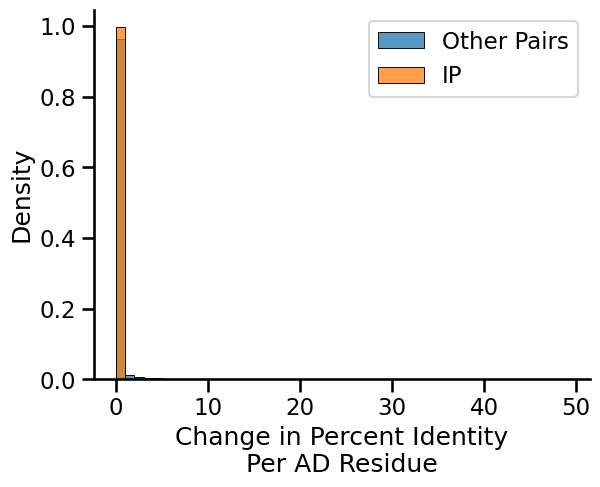

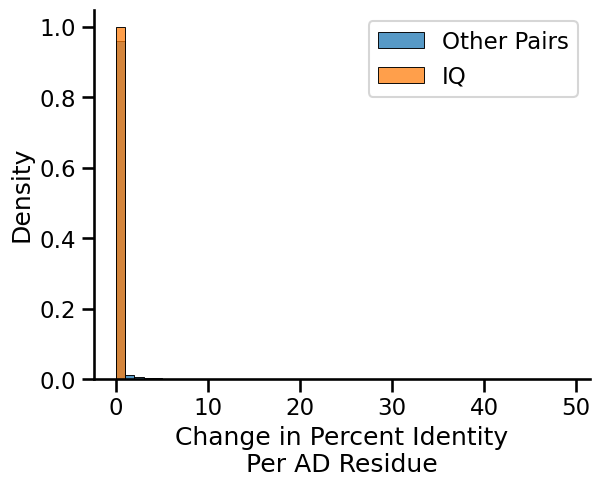

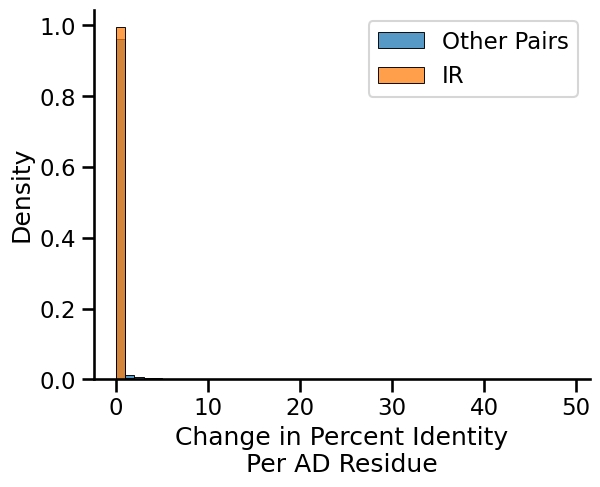

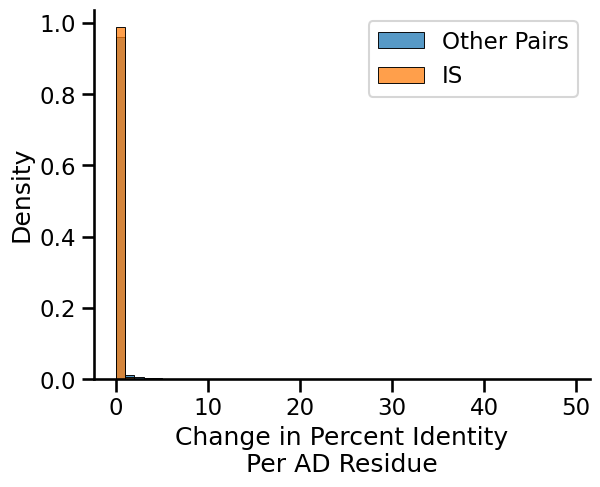

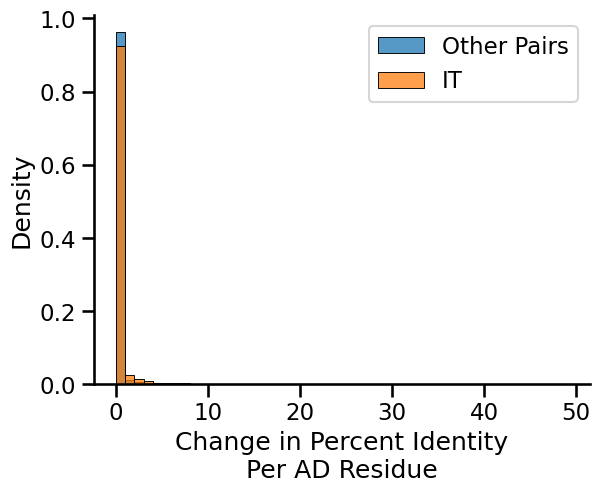

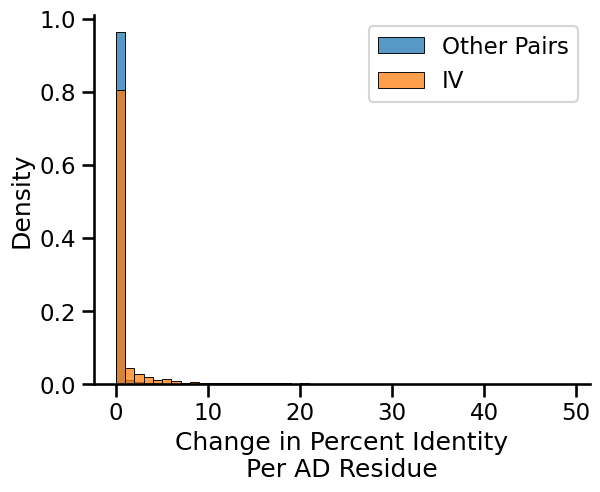

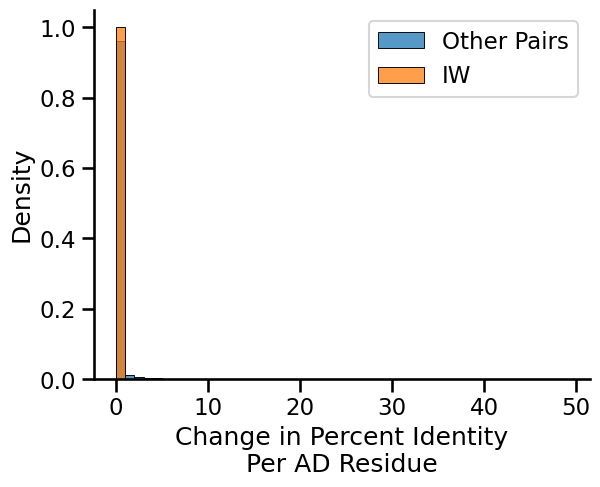

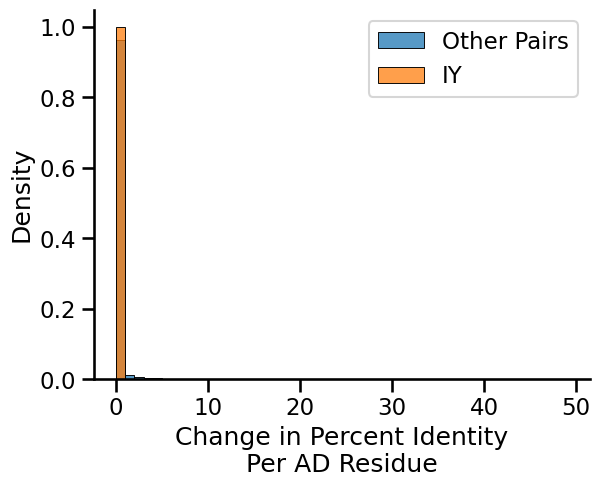

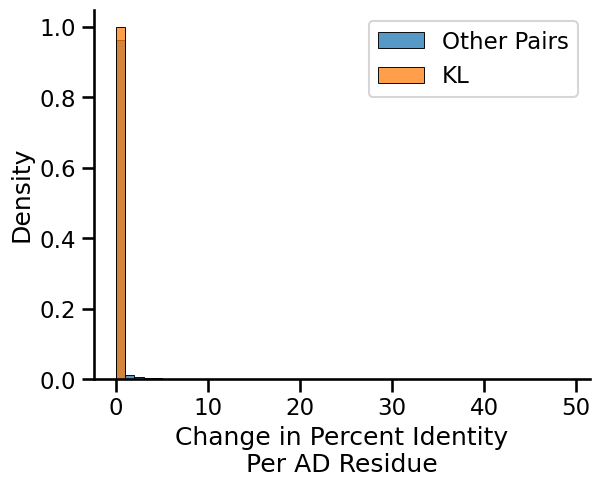

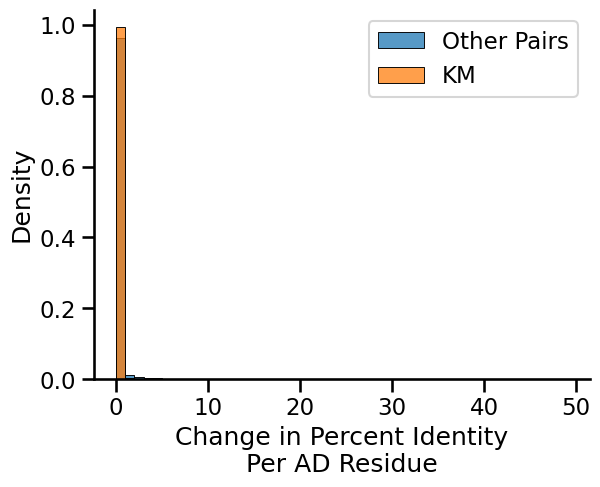

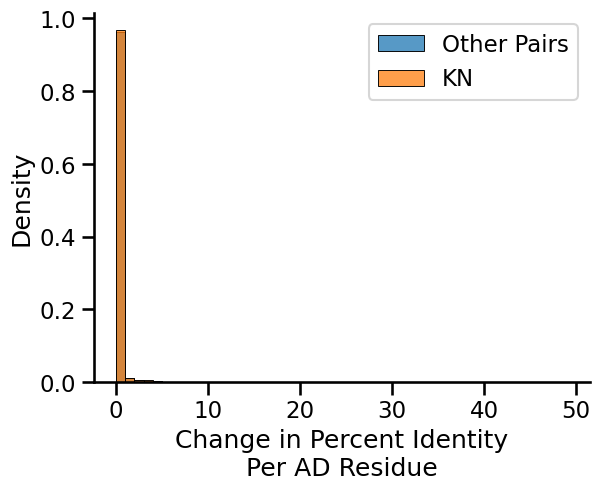

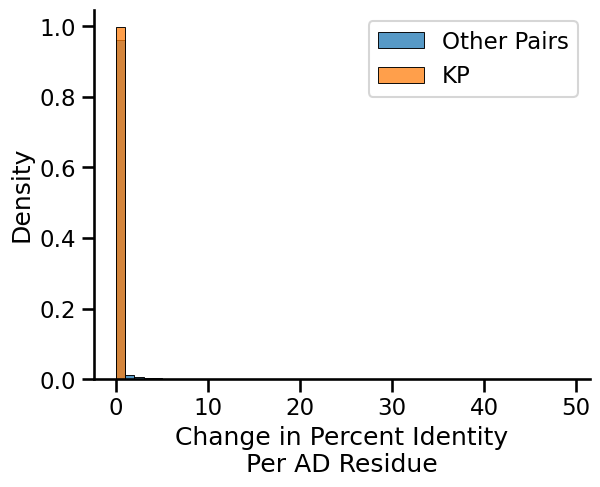

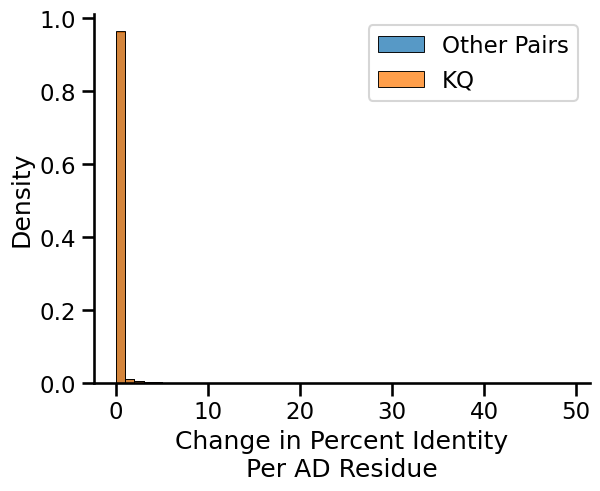

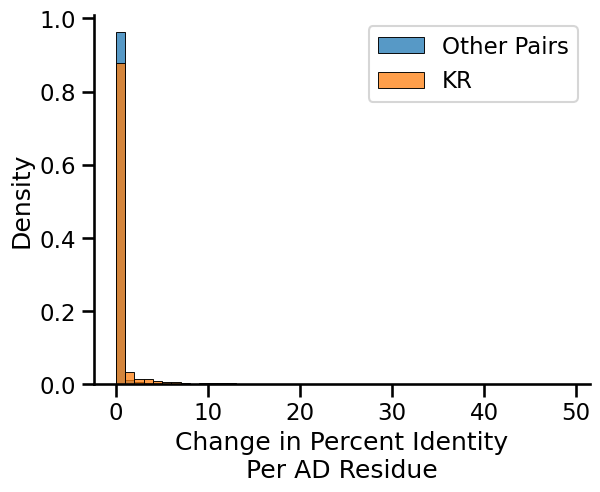

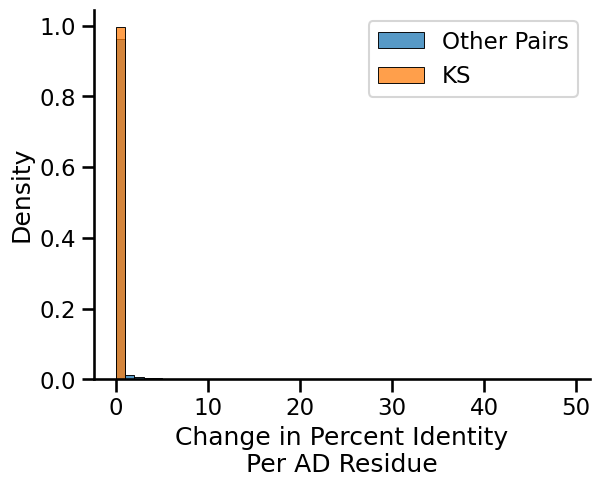

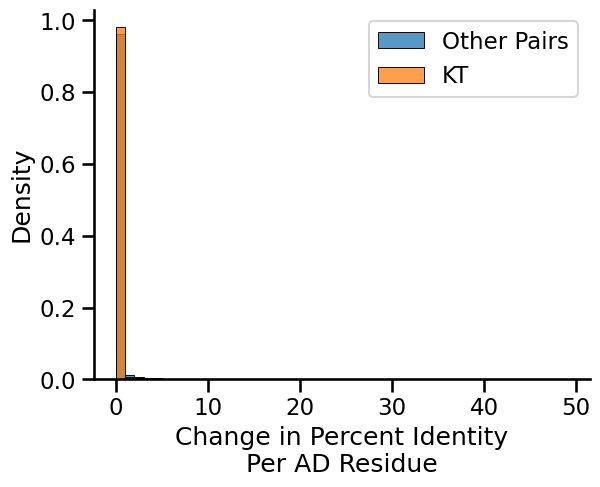

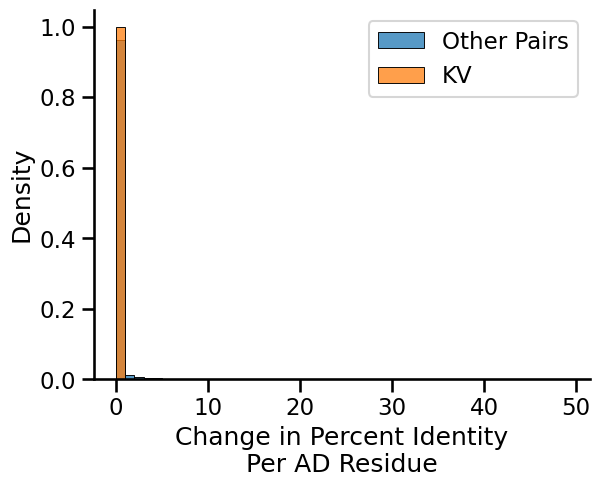

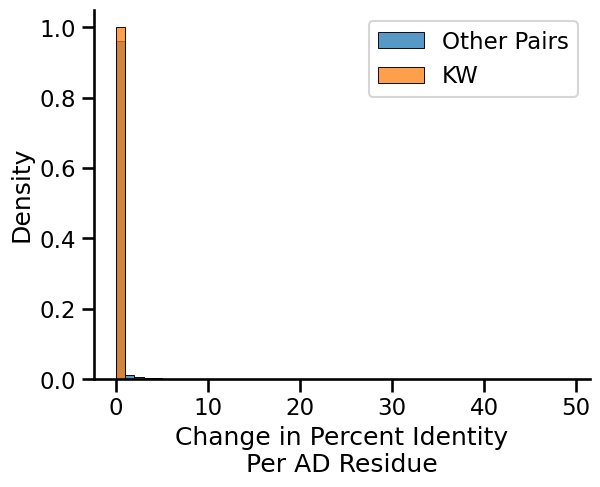

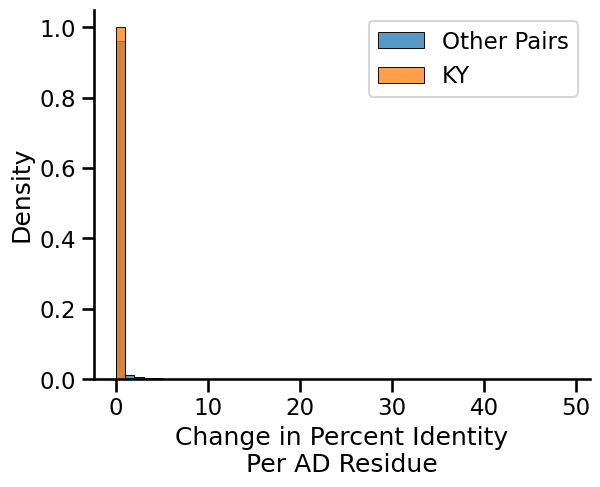

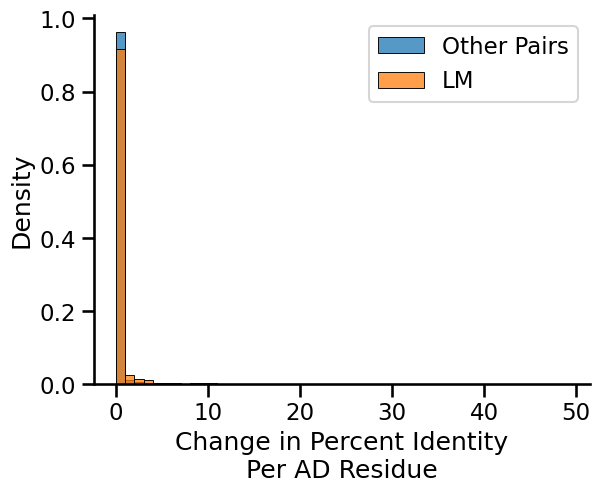

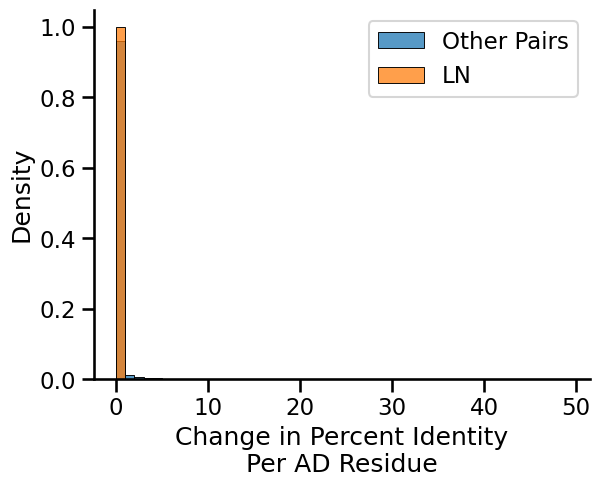

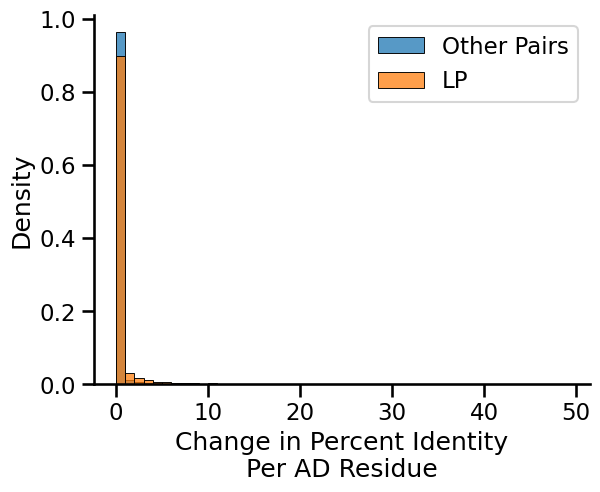

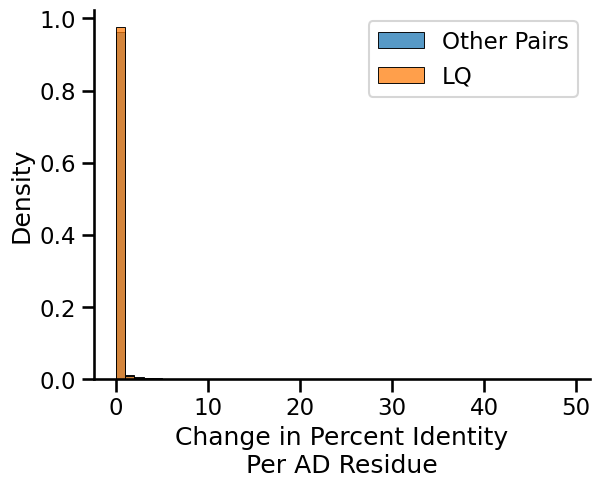

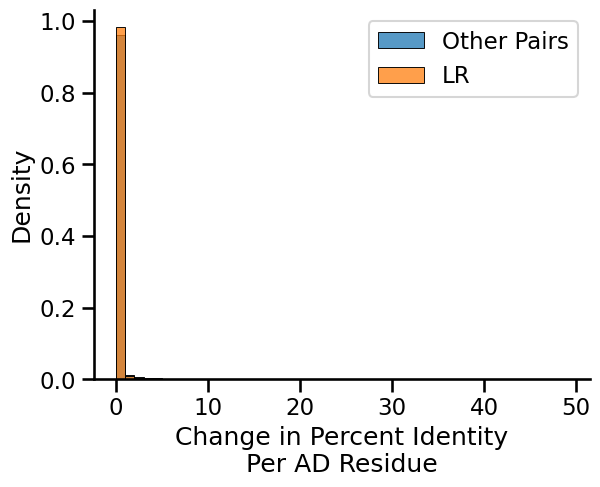

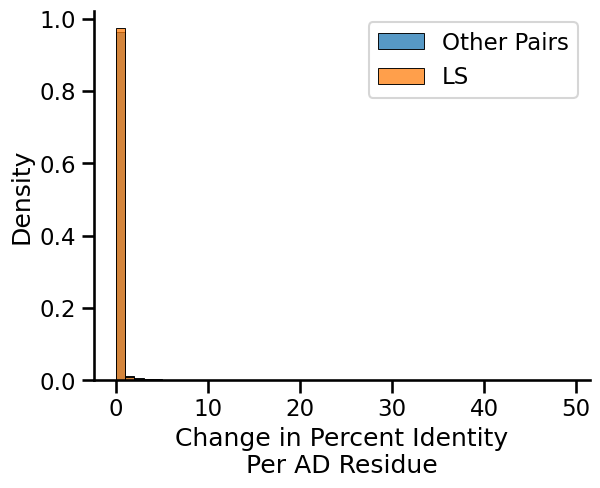

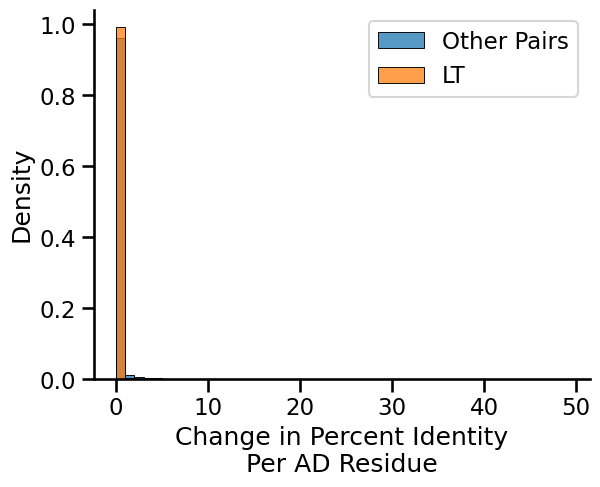

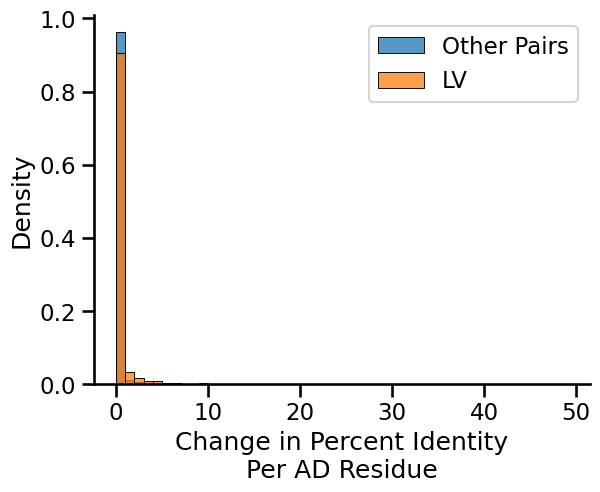

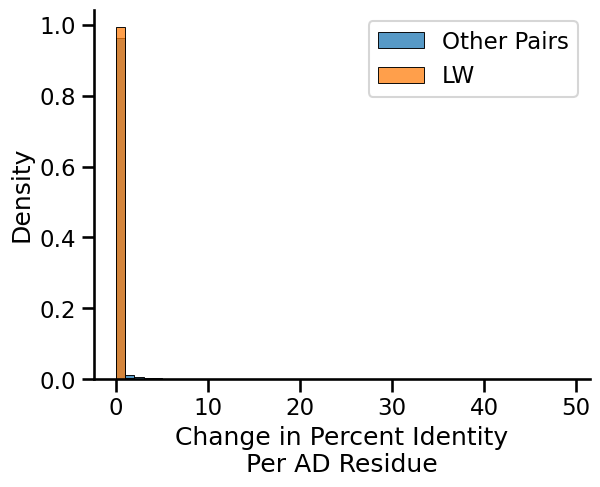

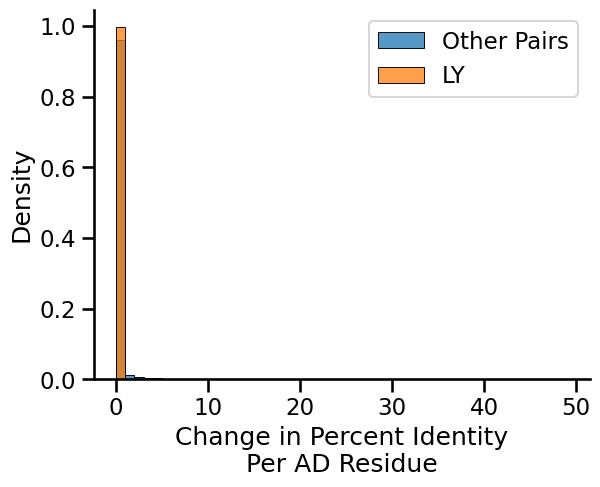

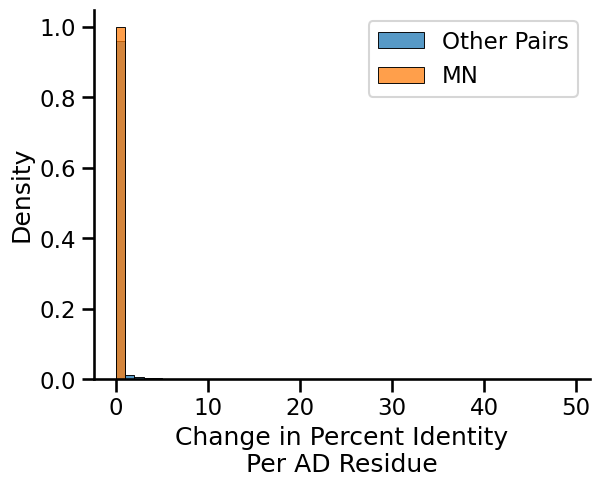

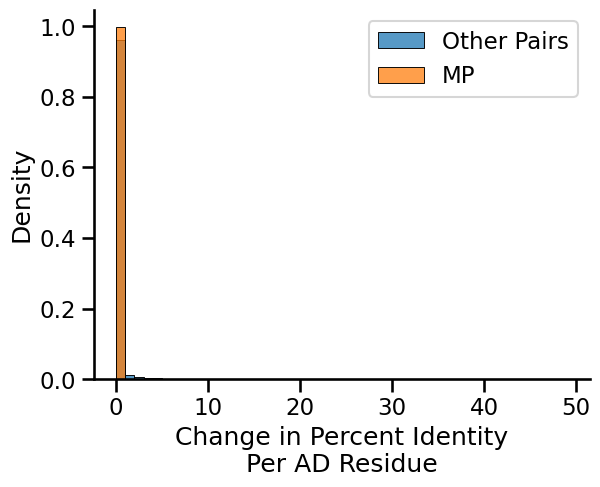

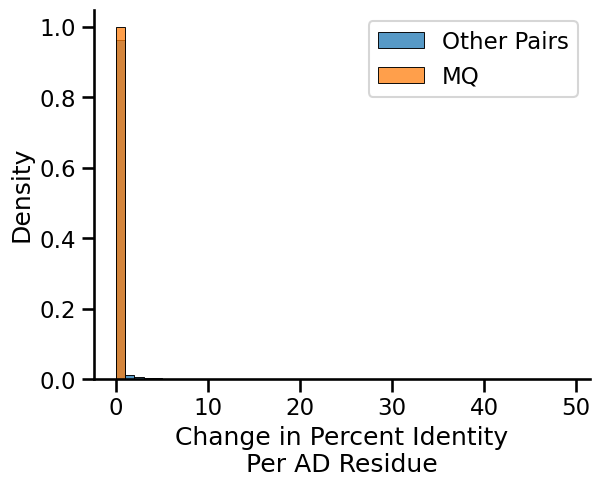

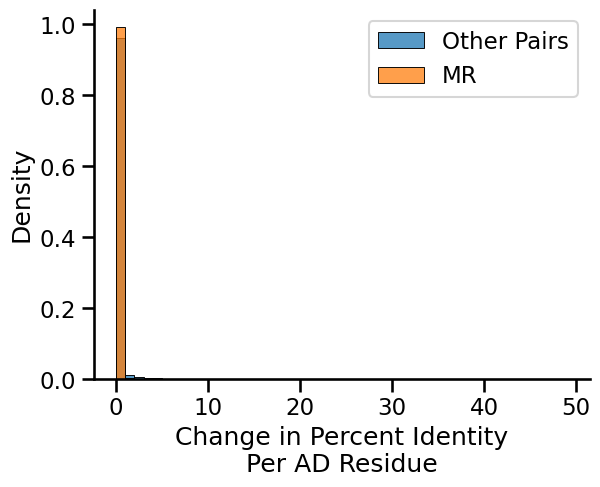

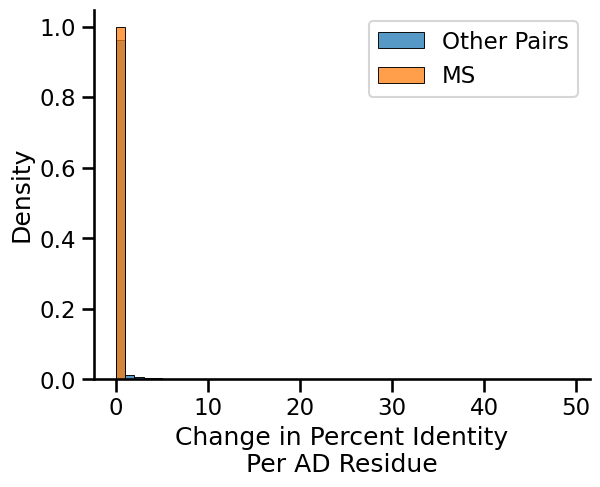

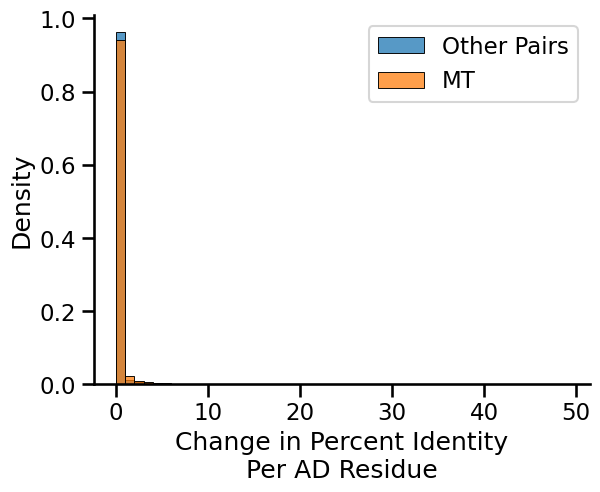

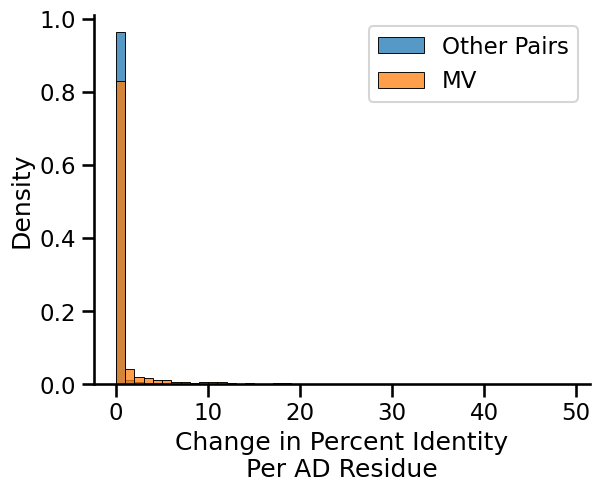

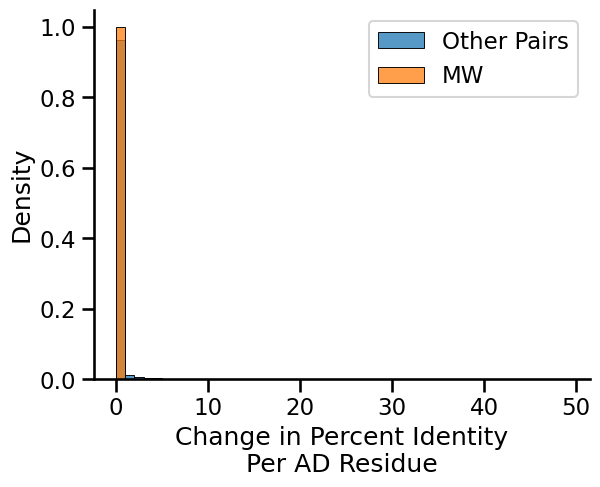

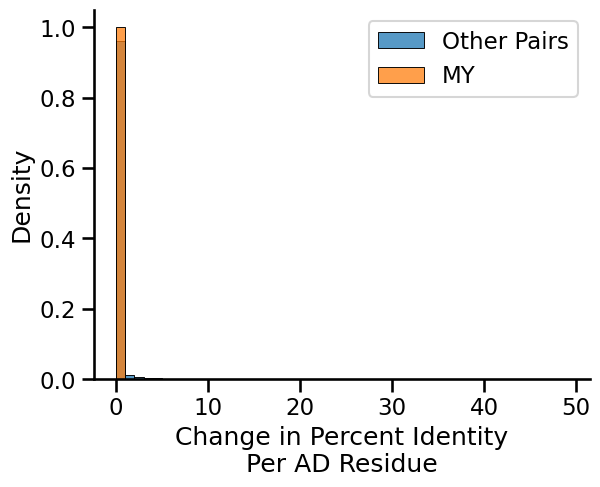

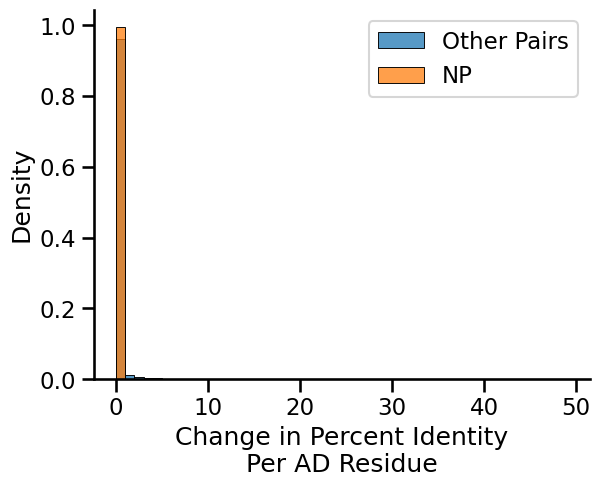

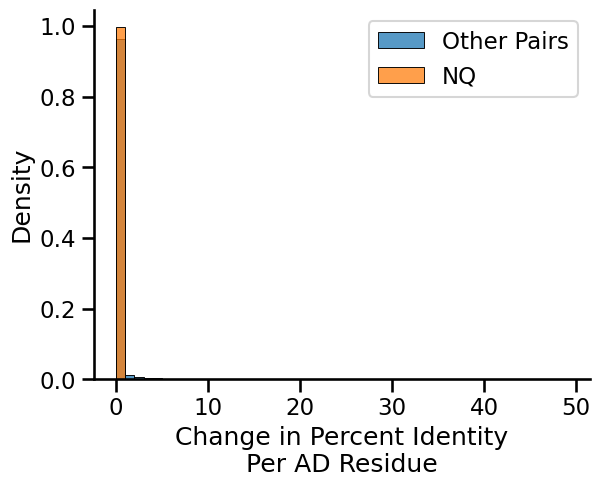

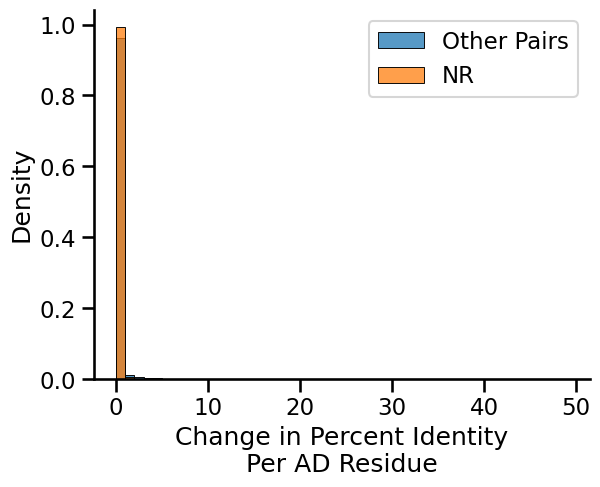

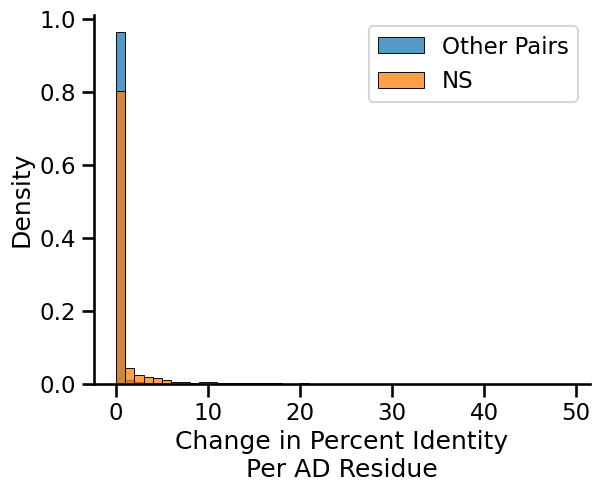

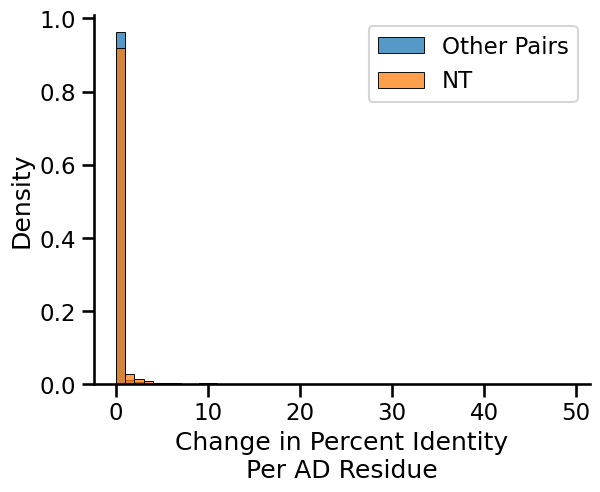

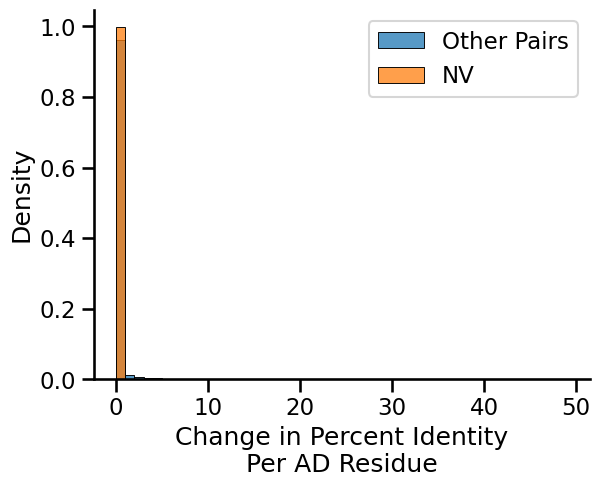

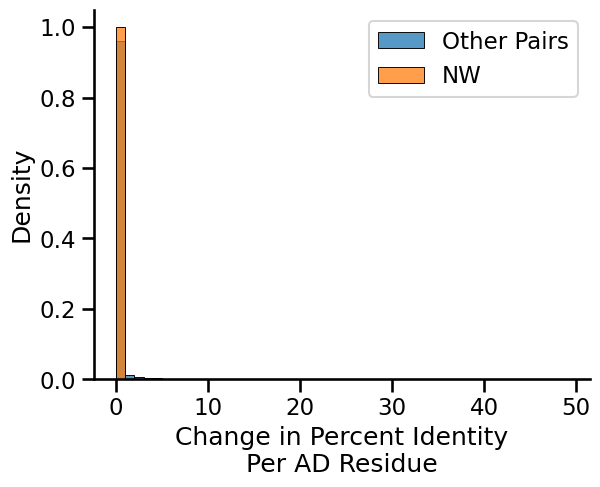

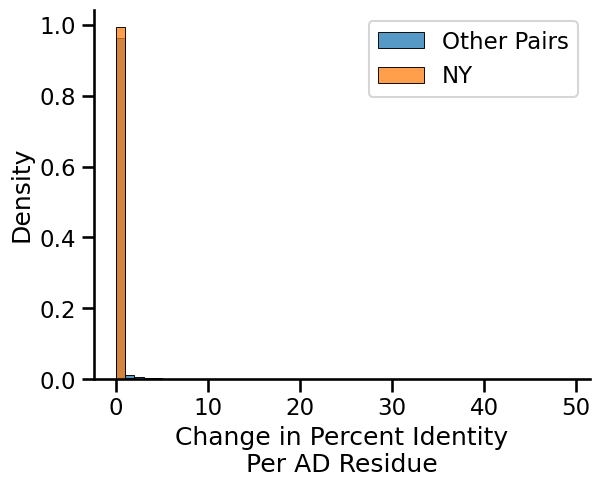

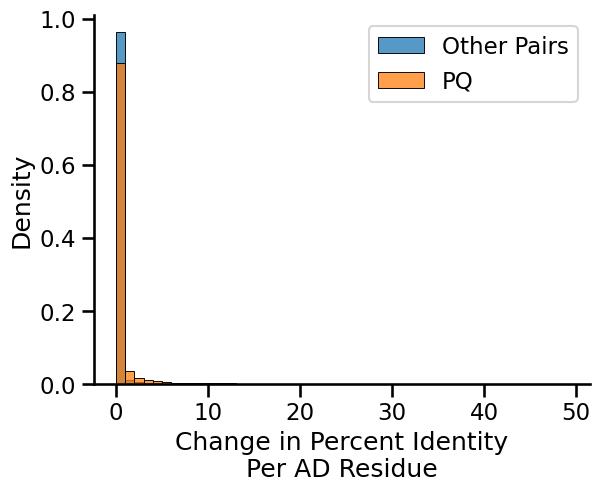

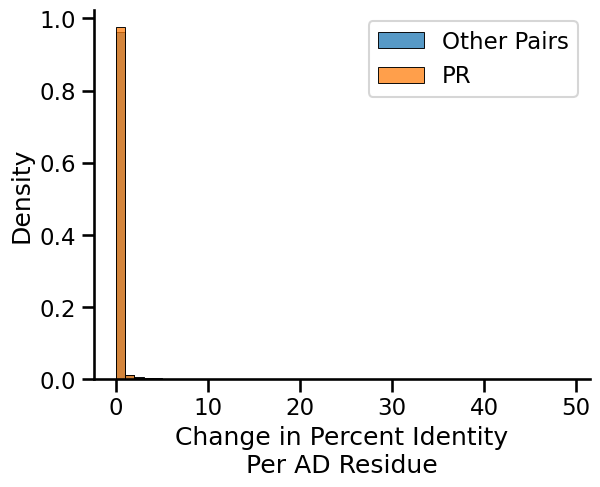

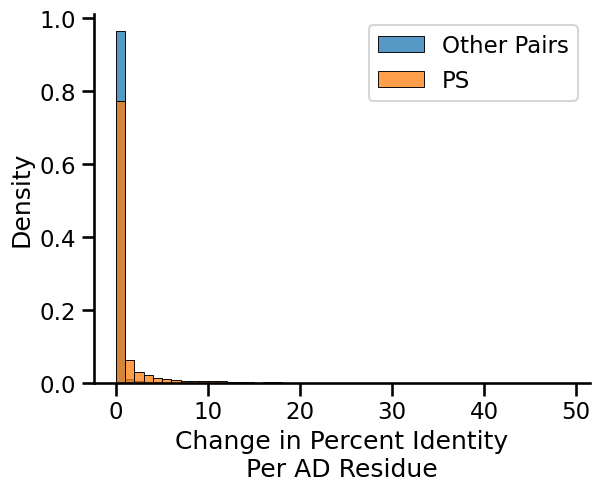

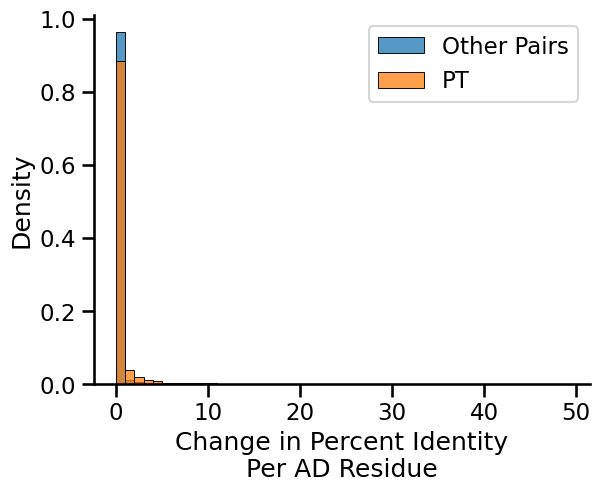

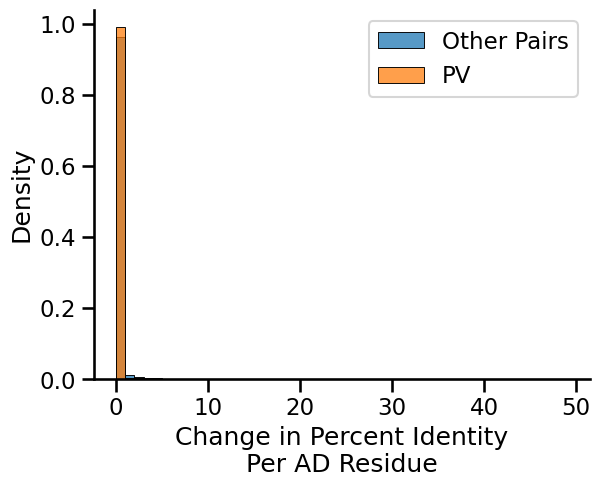

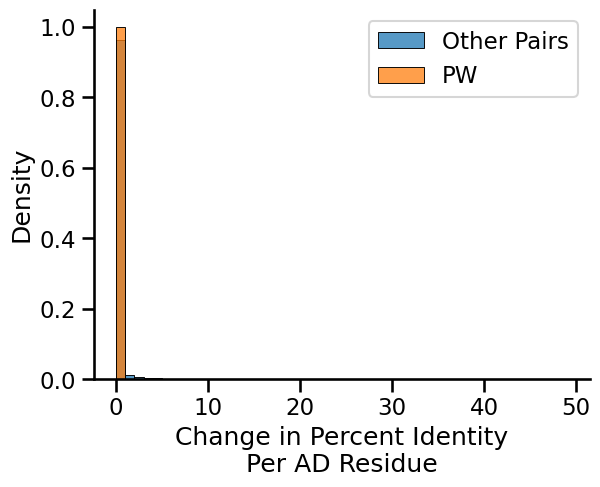

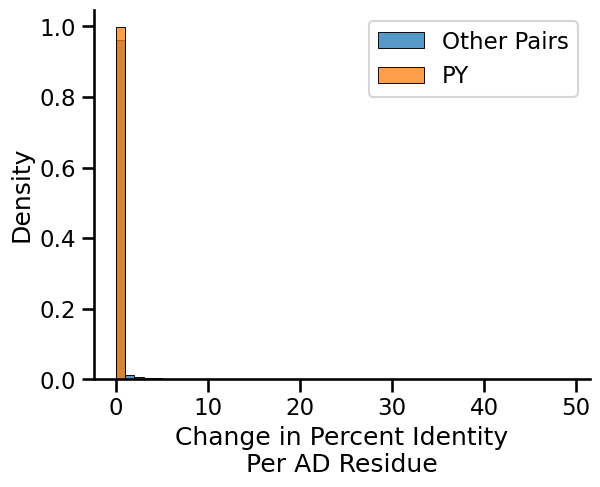

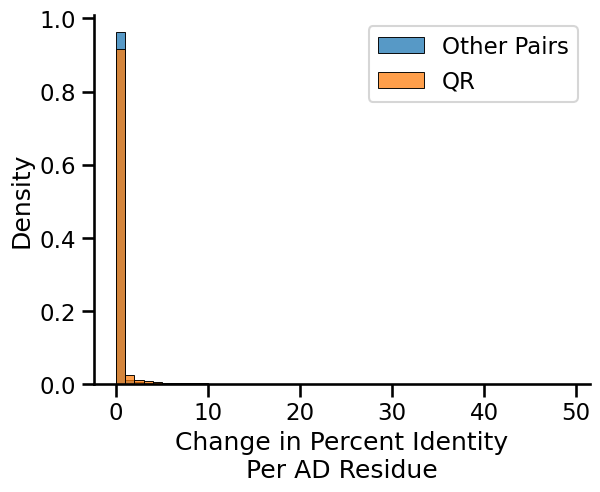

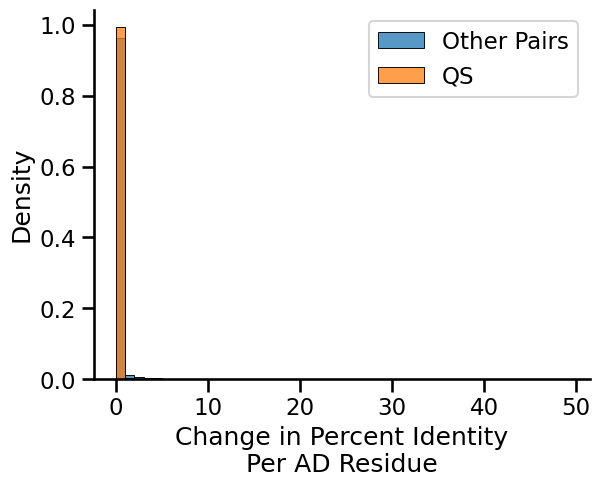

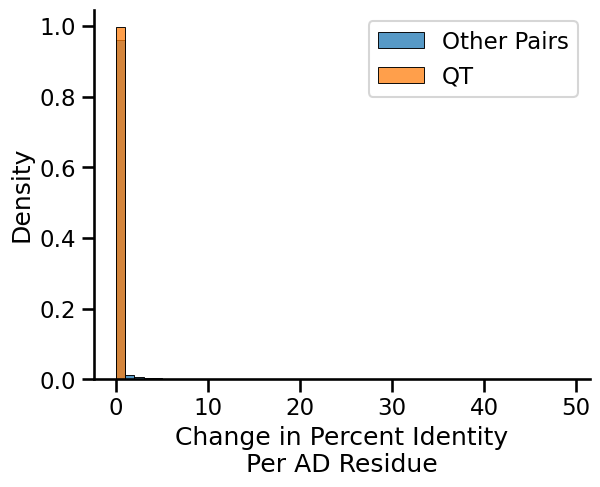

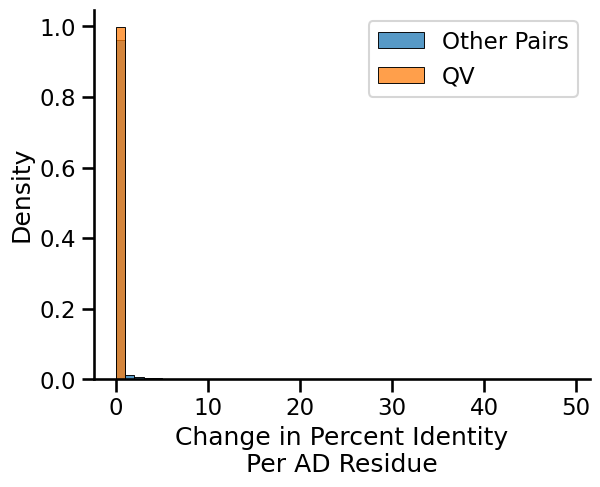

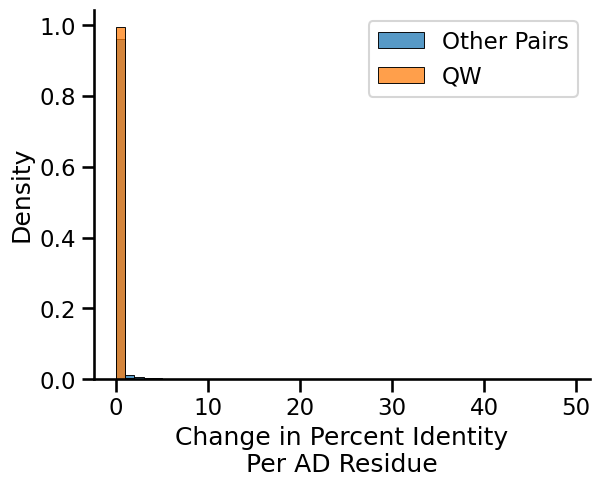

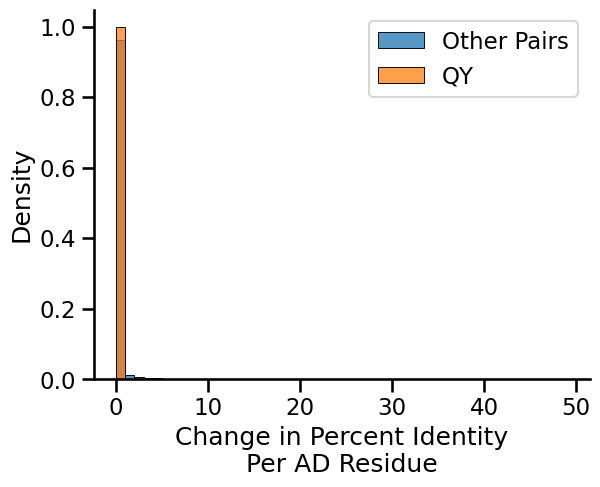

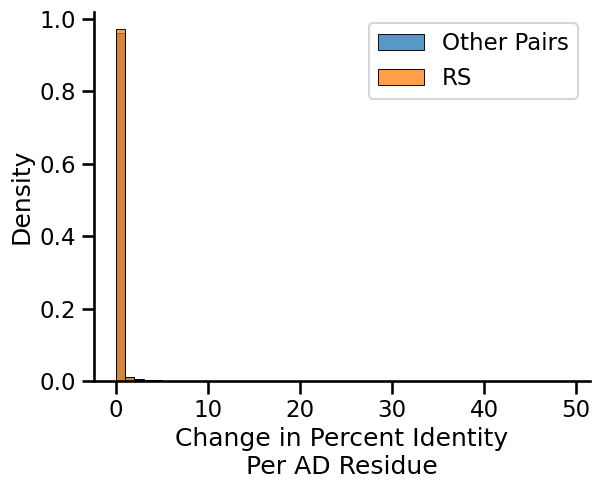

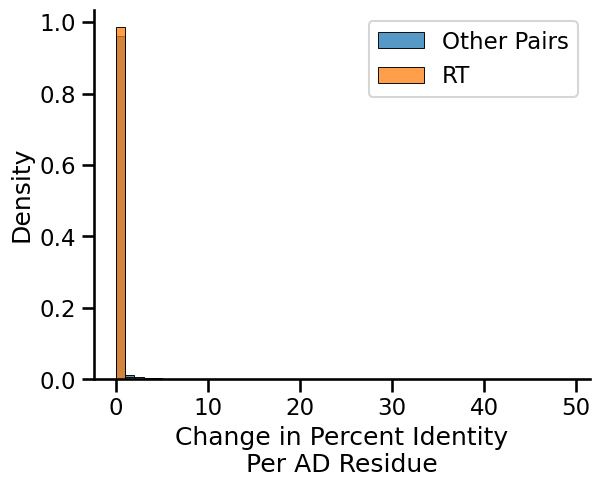

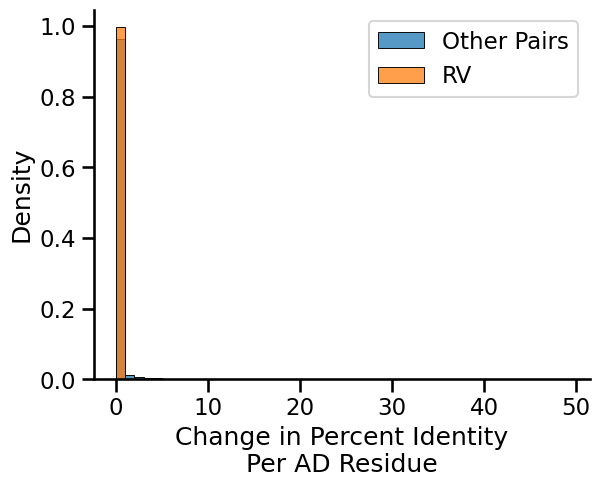

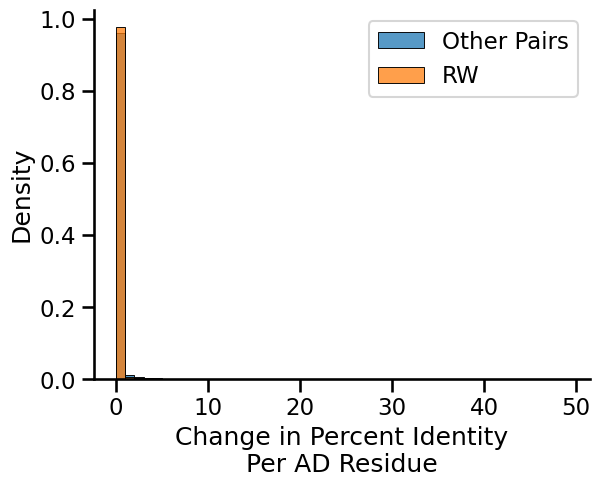

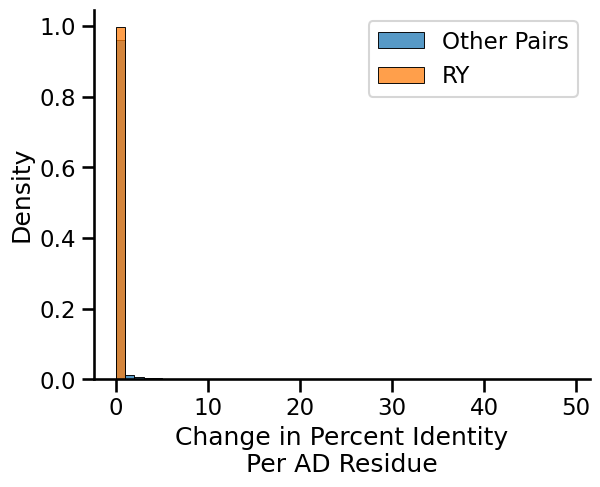

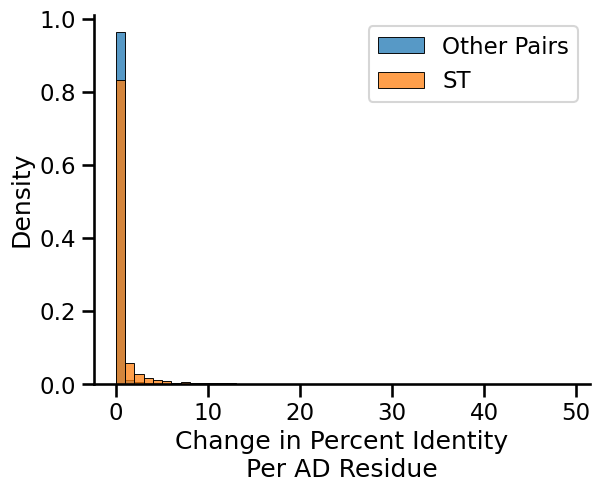

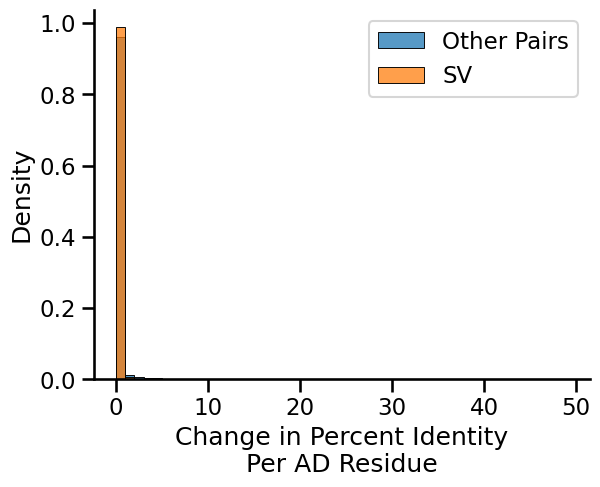

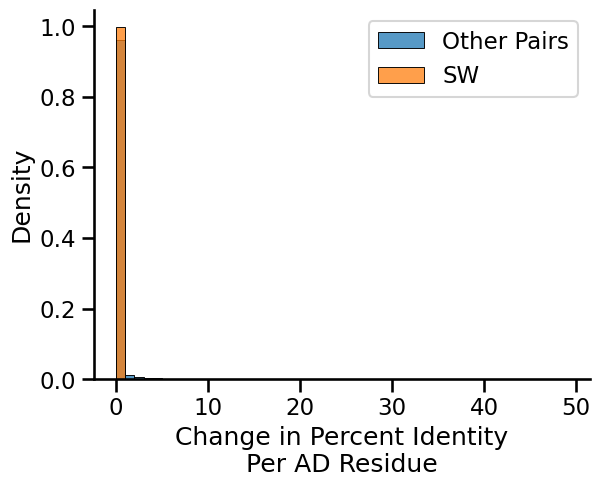

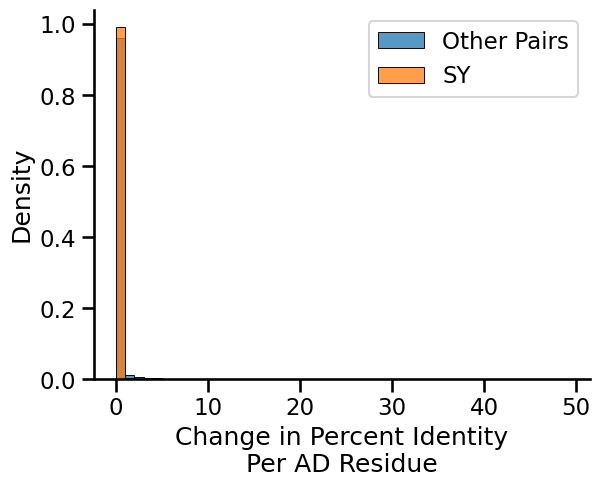

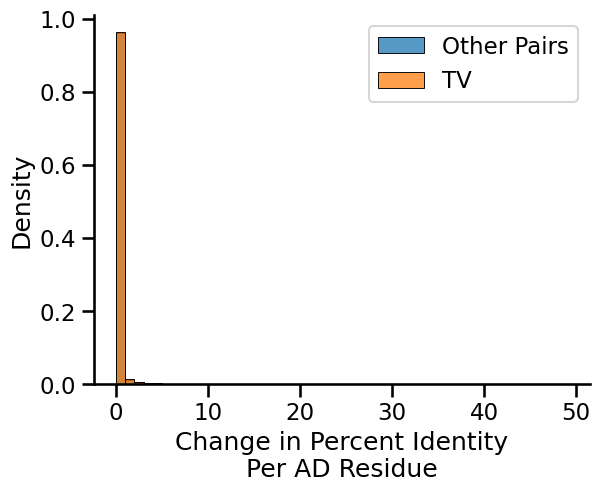

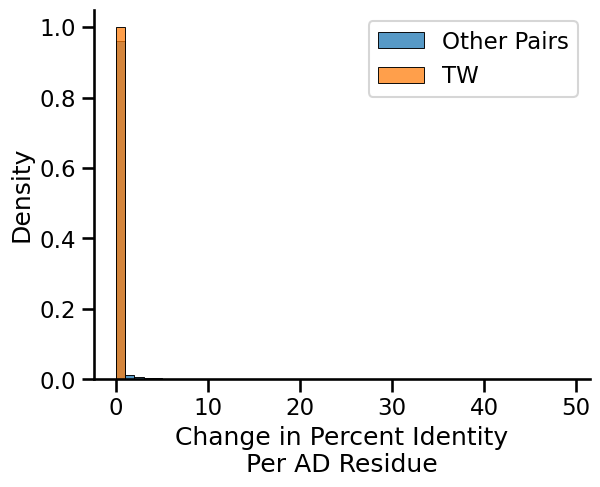

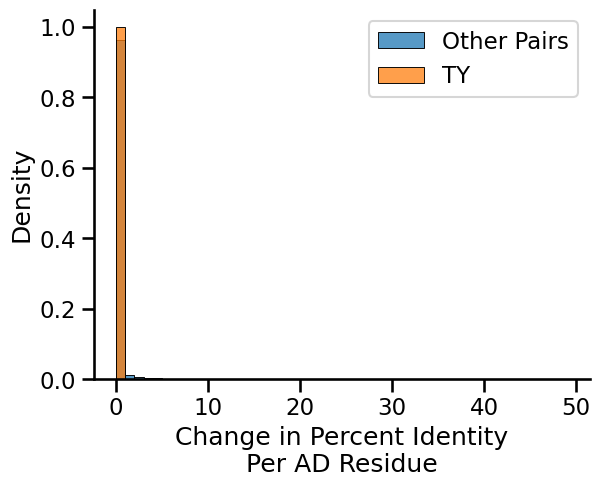

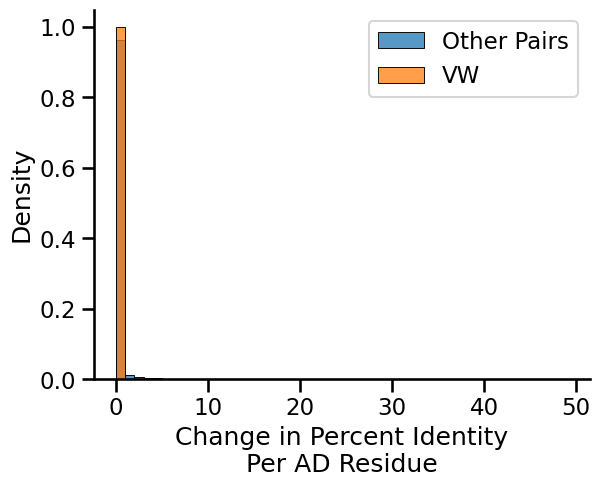

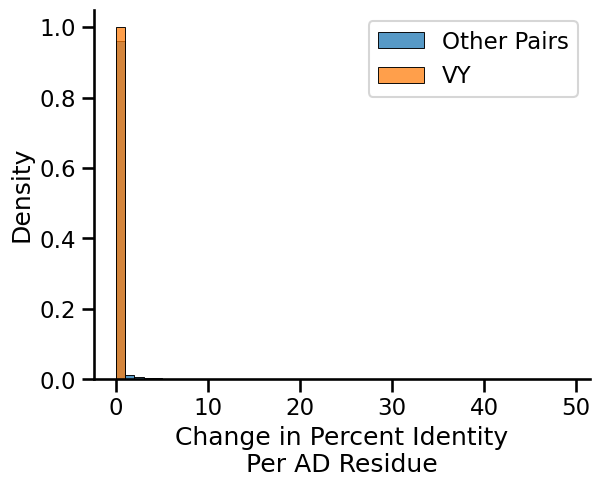

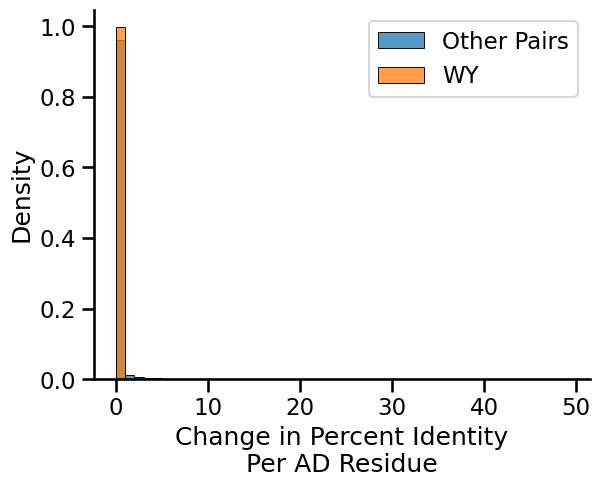

pair     p_val
0     AC  1.000000
1     AD  1.000000
2     AE  0.999998
3     AF  1.000000
4     AG  0.000000
..   ...       ...
185   TW  1.000000
186   TY  1.000000
187   VW  1.000000
188   VY  1.000000
189   WY  1.000000

[190 rows x 2 columns]

In [542]:
p_vals = []

for pair in AA_pair_col_names:
    p_vals.append(compare_pair(pair))
    plt.show()

p_val_df = pd.DataFrame({"pair" : AA_pair_col_names, "p_val" : p_vals})
p_val_df

In [548]:
sig_pairs = p_val_df[p_val_df["p_val"] < 0.05 / len(p_val_df)].sort_values(by = "p_val")
sig_pairs#[:10]

pair          p_val
4     AG   0.000000e+00
164   PS   0.000000e+00
162   PQ   0.000000e+00
157   NS   0.000000e+00
151   MV   0.000000e+00
121   IV   0.000000e+00
94    GS   0.000000e+00
180   ST   0.000000e+00
11    AP   0.000000e+00
14    AS   0.000000e+00
15    AT   0.000000e+00
37    DE   0.000000e+00
16    AV   0.000000e+00
137   LP  3.086421e-175
165   PT  3.707095e-156
129   KR  9.691849e-155
105   HQ   4.601828e-96
114   IM   1.210839e-94
74    FL   2.290555e-88
142   LV   7.812346e-62
45    DN   1.606921e-55
169   QR   3.793732e-54
135   LM   1.275833e-47
36    CY   2.135926e-36
106   HR   2.605550e-34
113   IL   3.404768e-34
55    EG   1.214122e-33
39    DG   1.272697e-25
84    FY   2.262759e-25
93    GR   3.370327e-21
158   NT   2.220633e-17
120   IT   3.713877e-13
103   HN   6.623969e-11
96    GV   2.031130e-10
58    EK   5.603276e-08
104   HP   9.411992e-06

5.603276388840822e-08

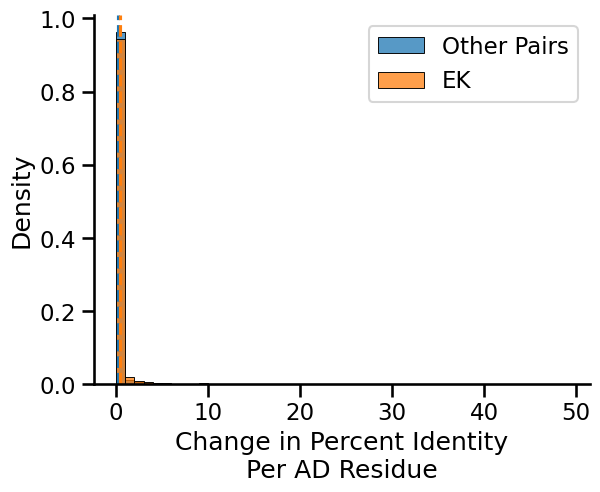

In [549]:
compare_pair("EK", means = True)

0.0

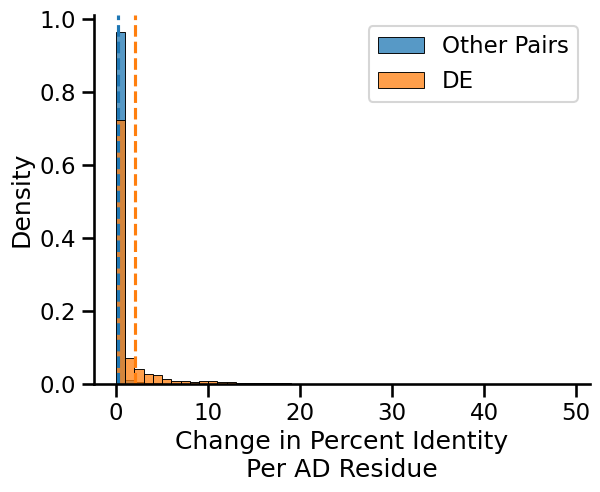

In [546]:
compare_pair("DE", means = True)

5.603276388840822e-08

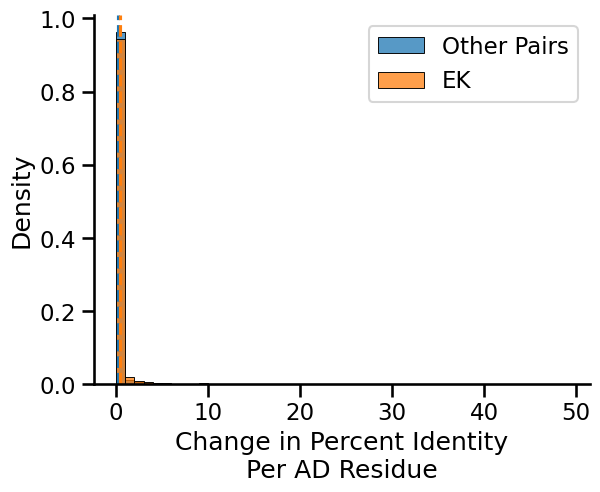

In [564]:
# Plots are not convincing of doing what I expect

compare_pair("EK", means = True)

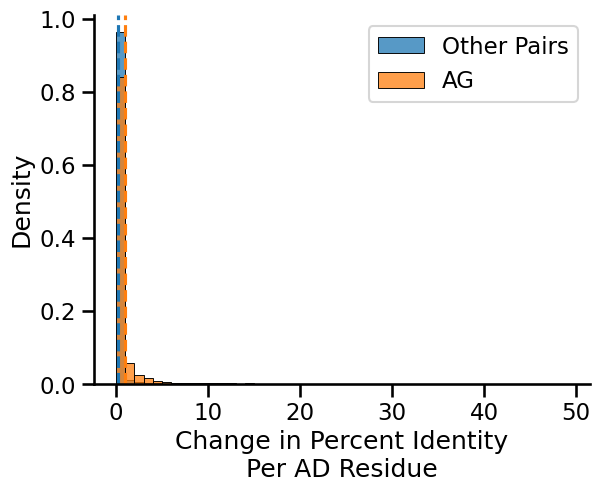

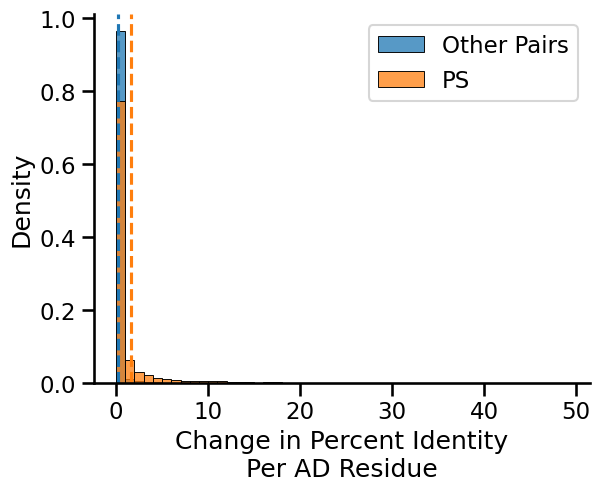

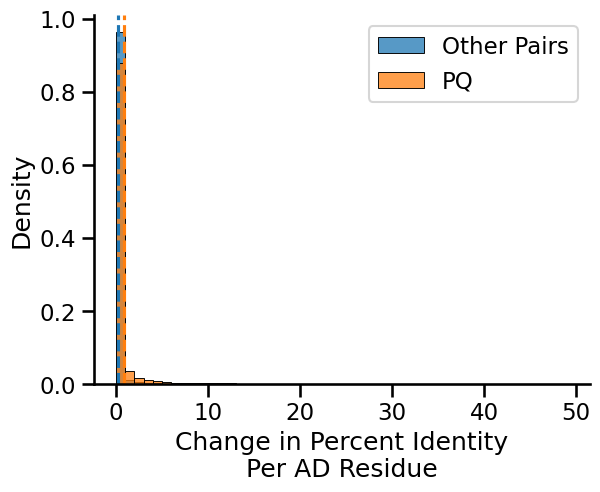

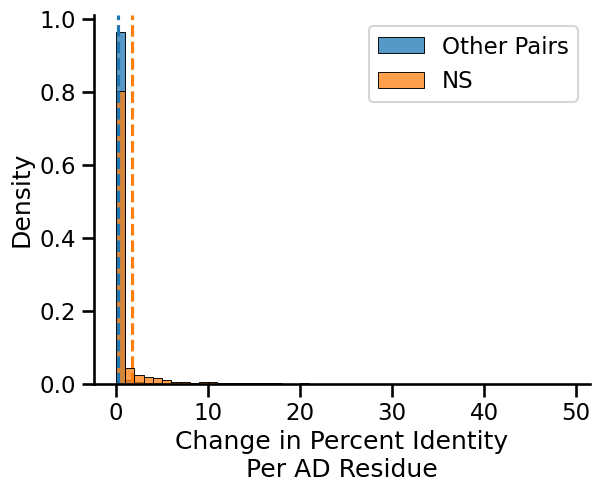

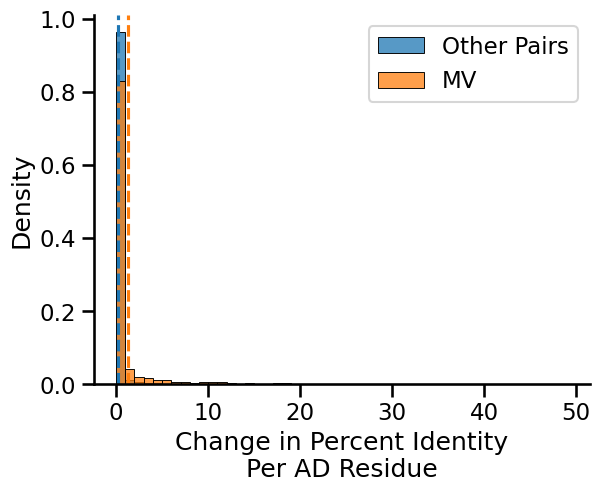

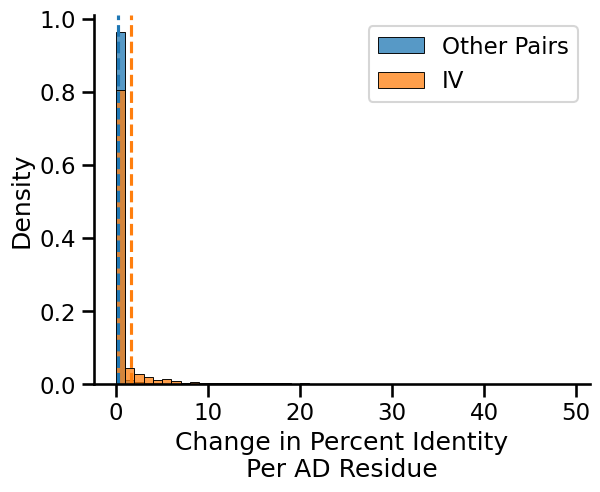

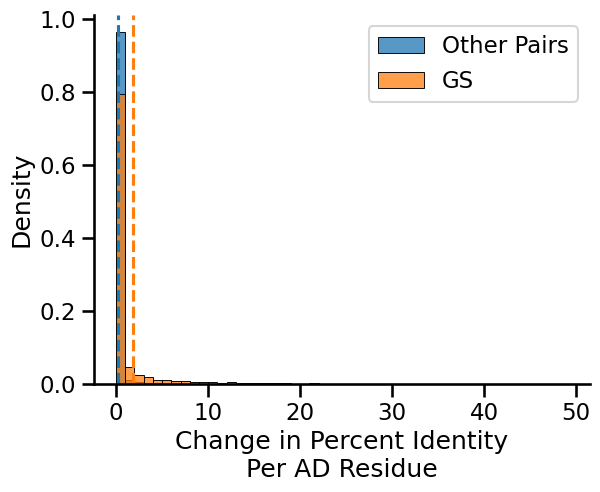

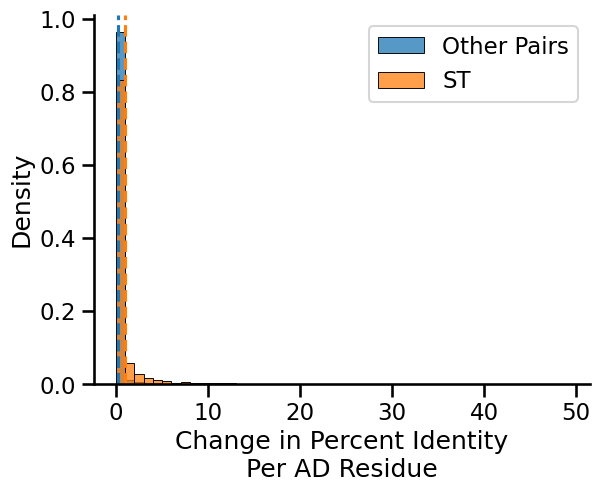

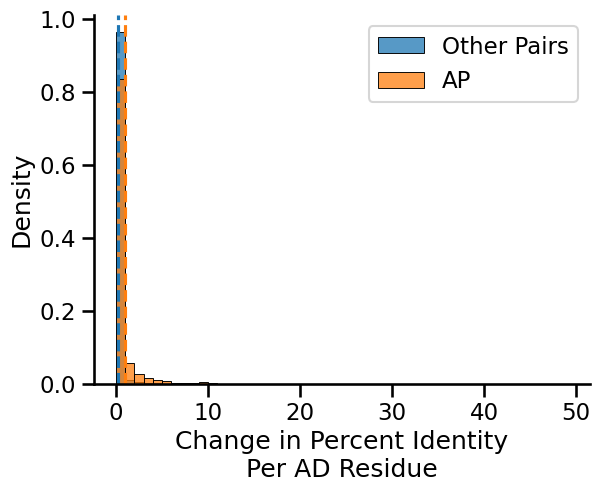

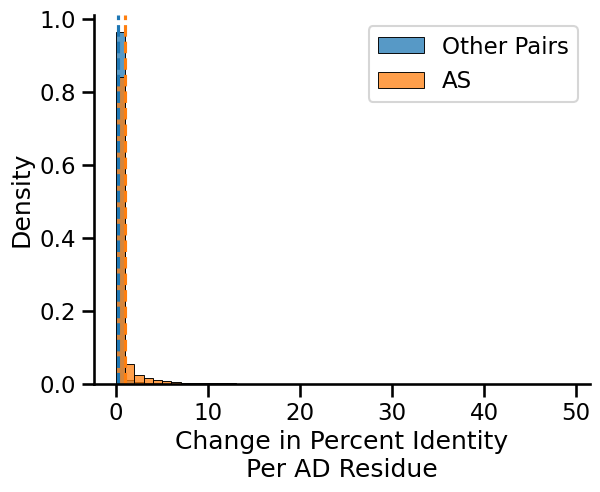

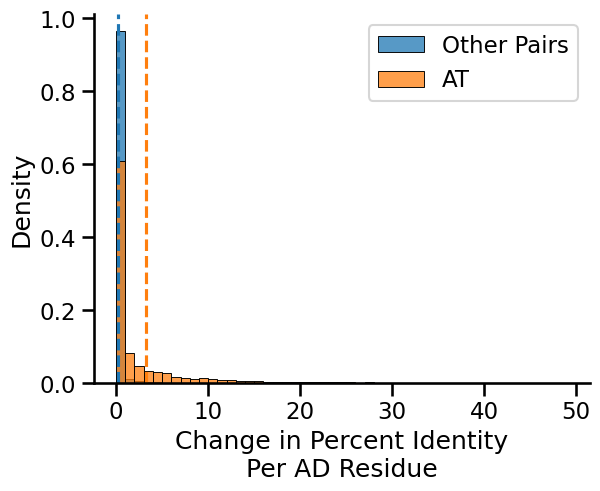

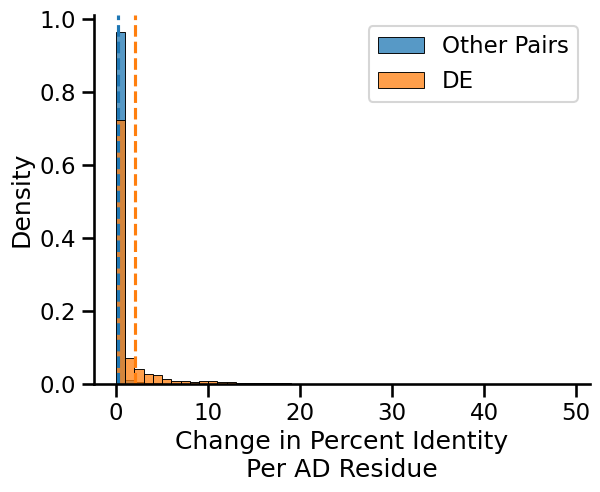

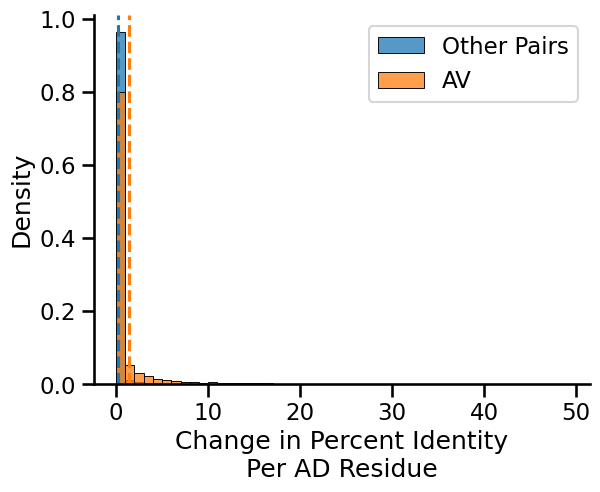

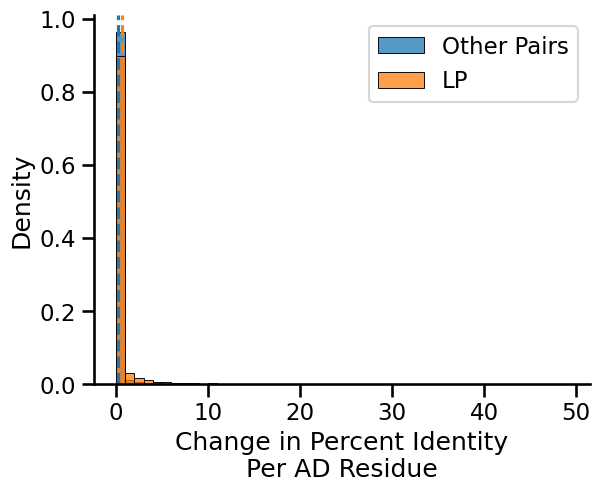

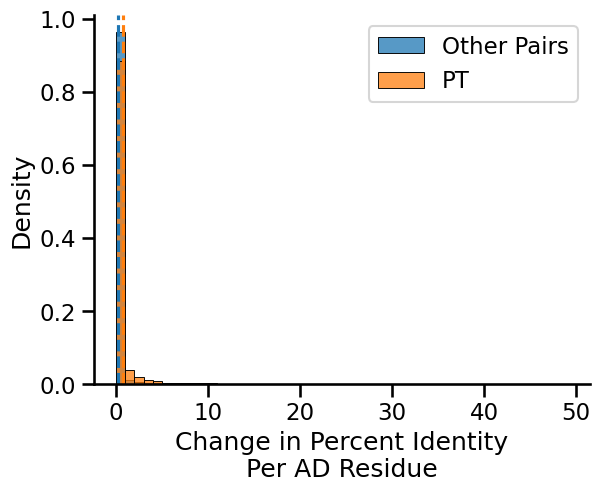

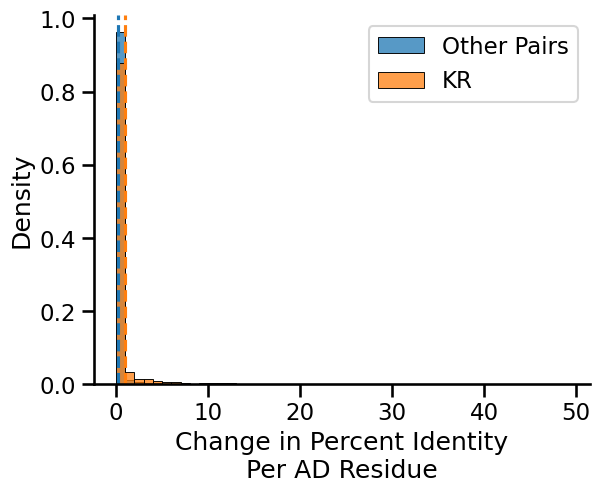

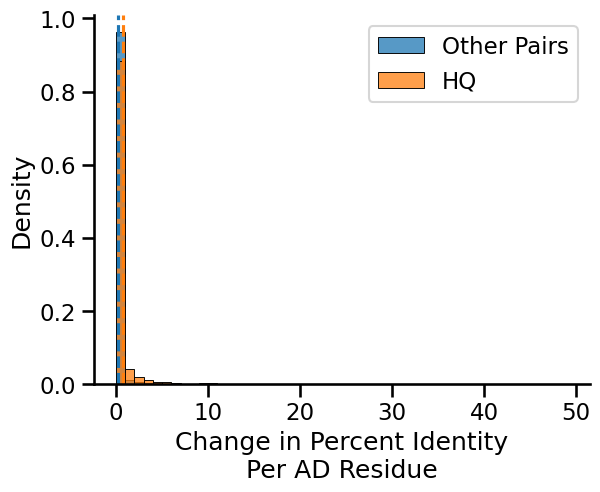

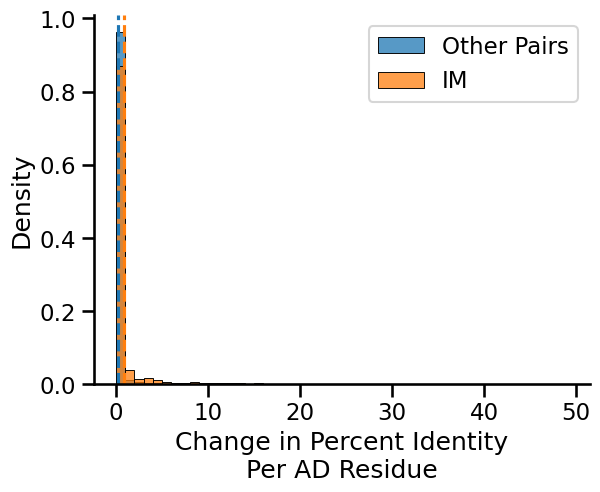

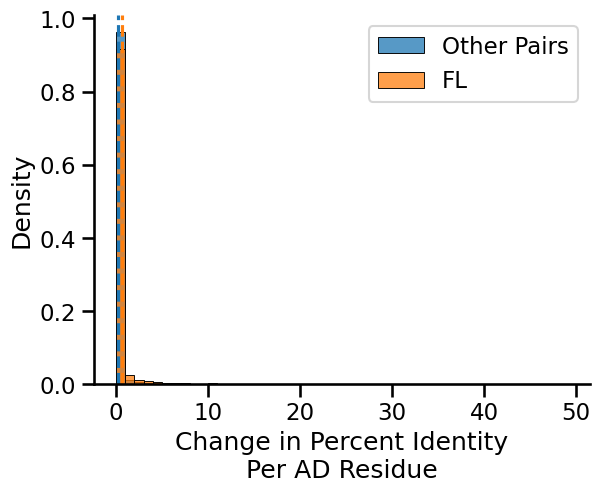

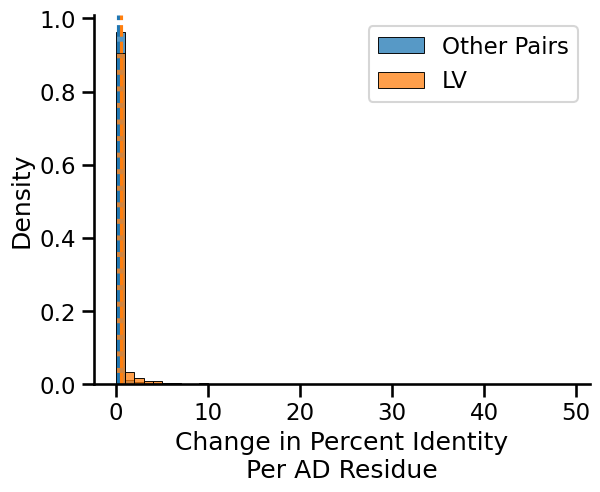

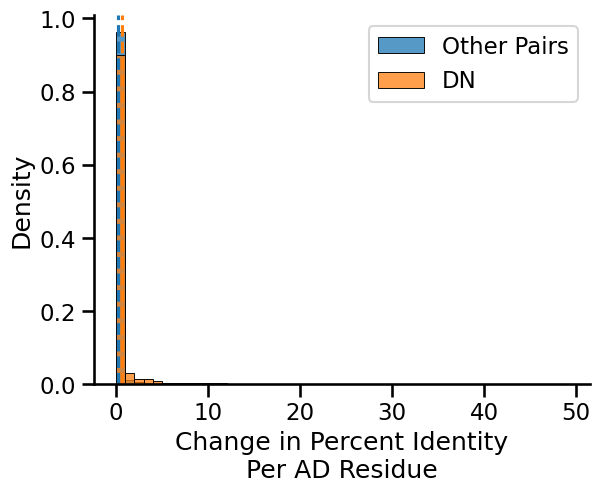

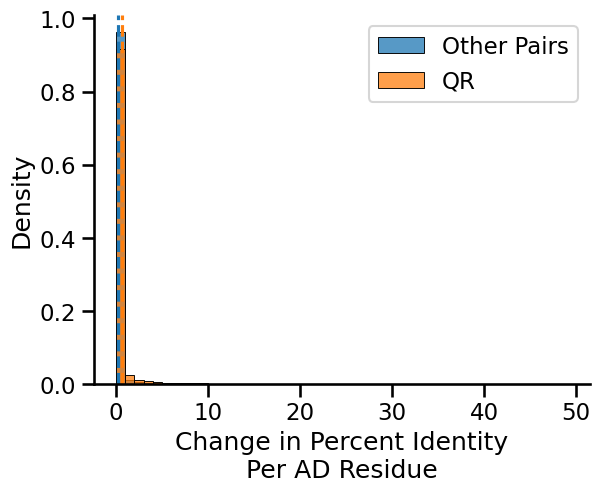

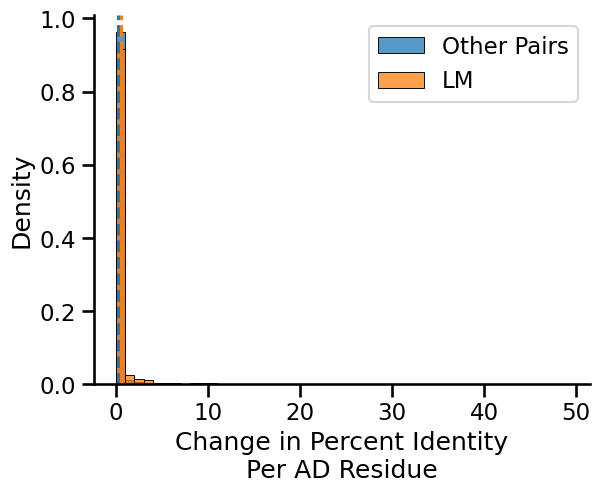

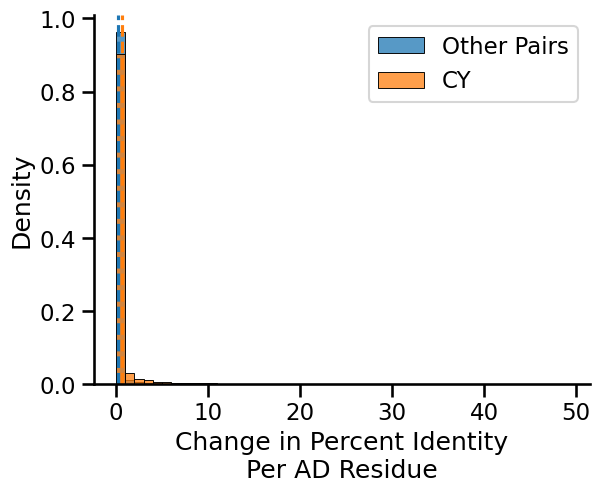

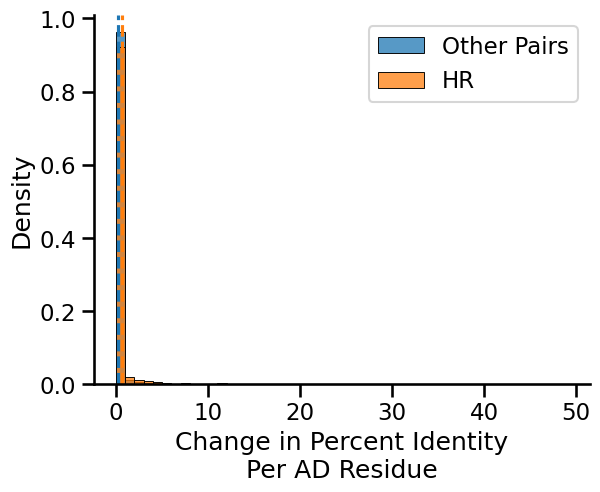

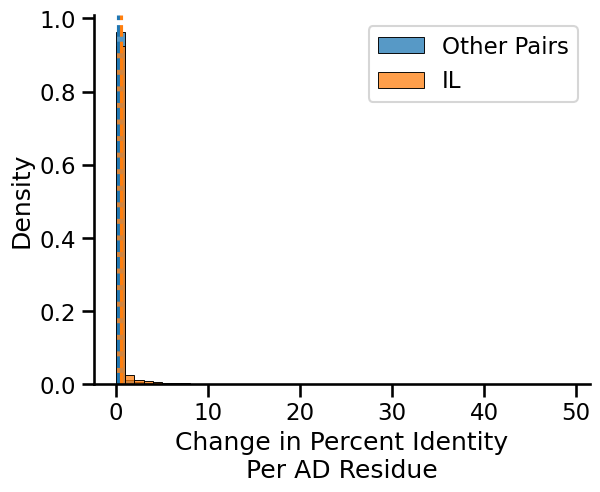

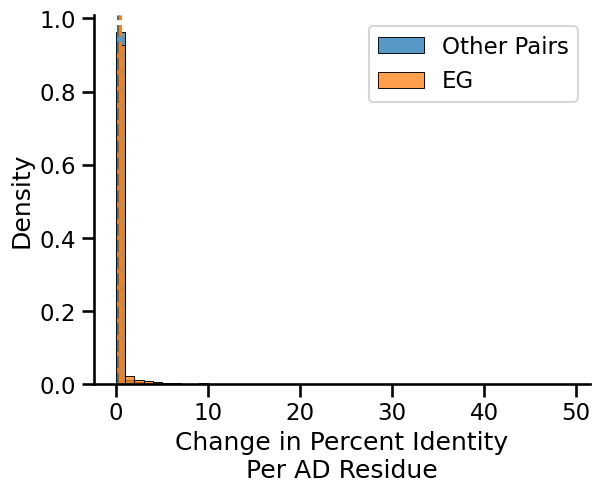

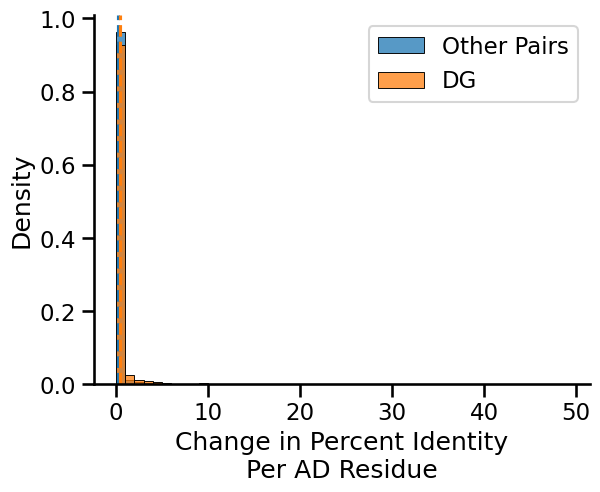

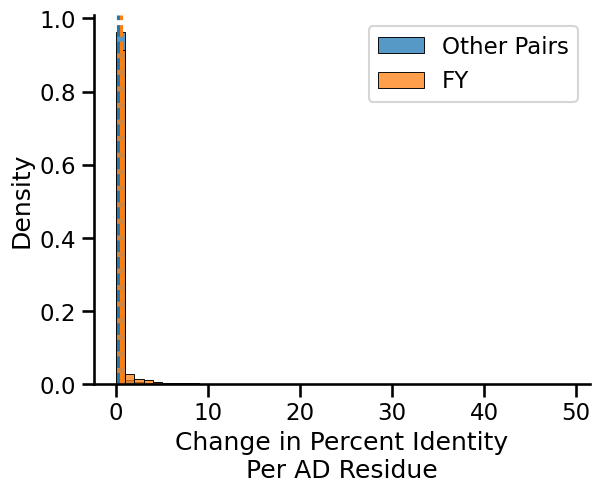

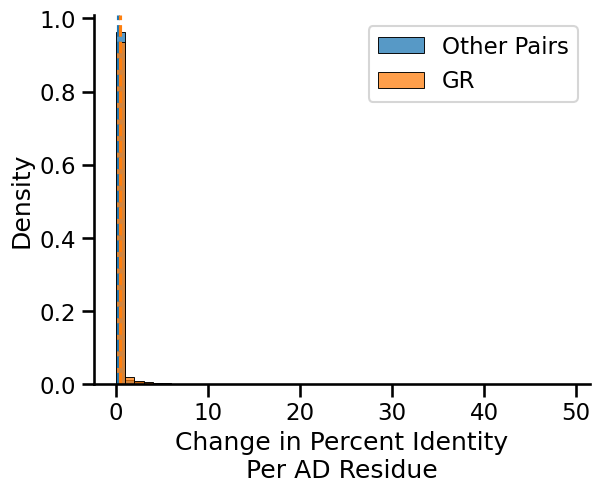

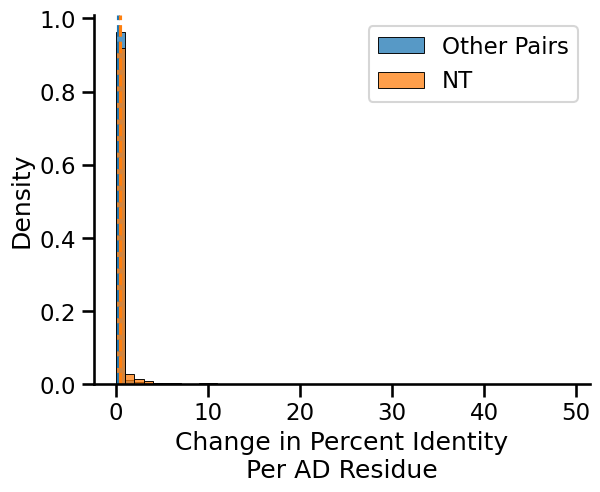

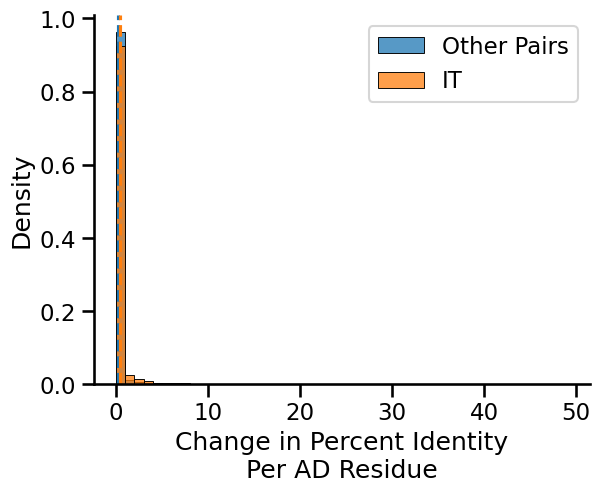

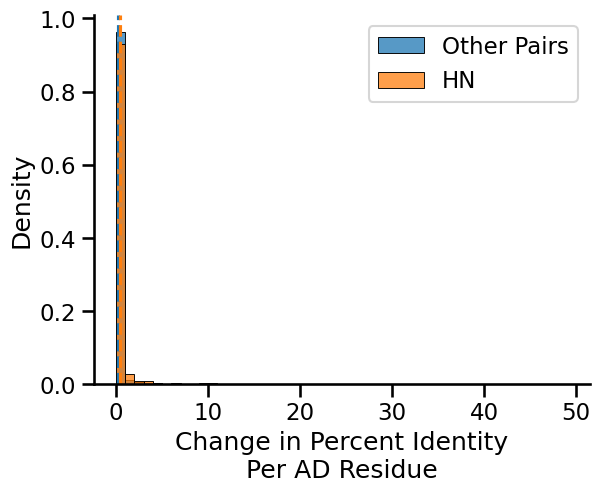

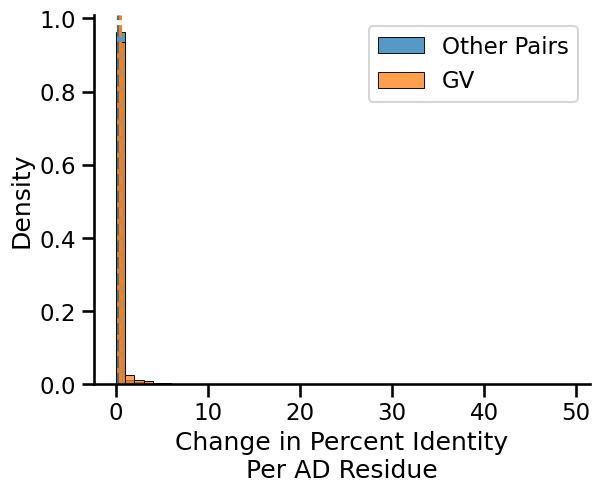

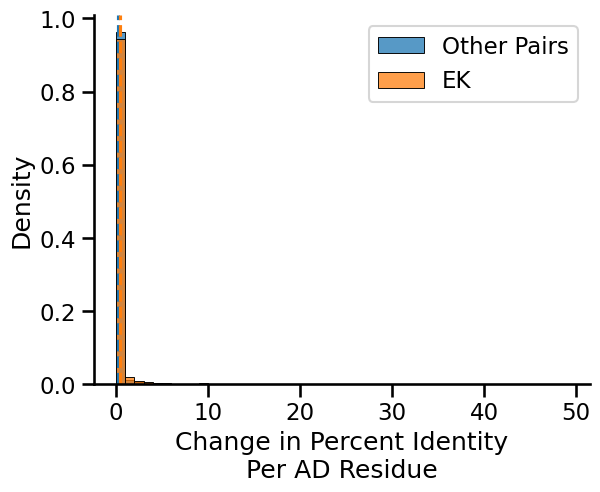

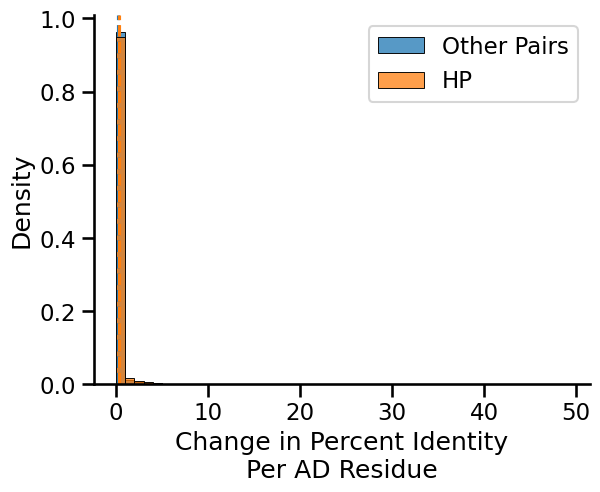

In [544]:
for pair in sig_pairs["pair"]:
    compare_pair(pair, means = True)
    plt.show()

In [567]:
# New plan - bootstrapping
# For each pair, count number of rows in melted which equal that pair
# Get 10,000 random samples of same size, and for each calculate the mean value
# Get p value of observed mean vs distribution of means

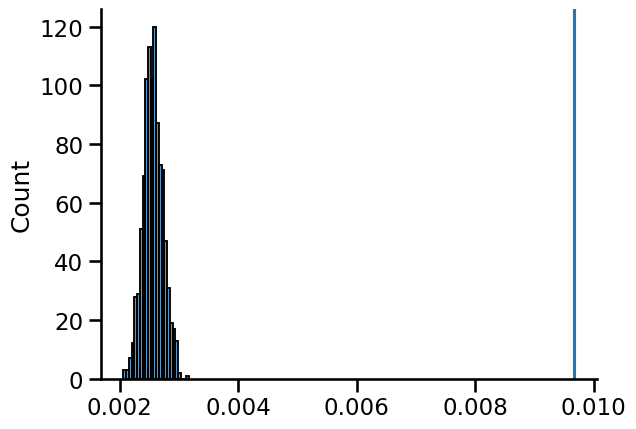

In [595]:
pair = "AG"

sns.set_context('talk')

# Calculating mean of pair
obs = melted[melted["variable"] == pair]
obs_mean = np.mean(obs["value"])

# Sampling with same size as obs
sample_means = []
for i in range(1000):
    sampled_df = melted.sample(n=len(obs), replace=True)
    sample_mean = np.mean(sampled_df["value"])
    sample_means.append(sample_mean)

sns.histplot(sample_means)
plt.axvline(obs_mean)
sns.despine()

In [596]:
obs_mean - np.mean(sample_means)

0.007108210018092589

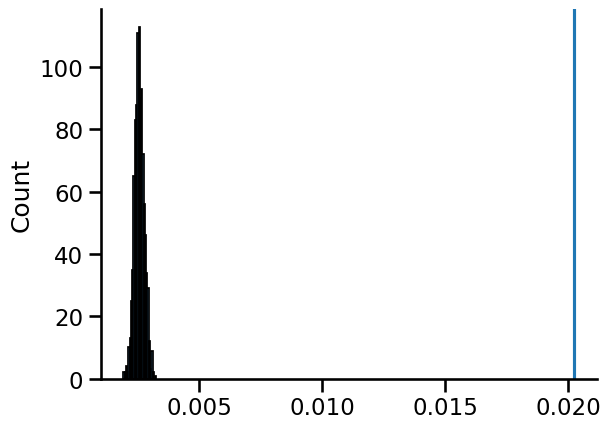

In [597]:
pair = "DE"

sns.set_context('talk')

# Calculating mean of pair
obs = melted[melted["variable"] == pair]
obs_mean = np.mean(obs["value"])

# Sampling with same size as obs
sample_means = []
for i in range(1000):
    sampled_df = melted.sample(n=len(obs), replace=True)
    sample_mean = np.mean(sampled_df["value"])
    sample_means.append(sample_mean)

sns.histplot(sample_means)
plt.axvline(obs_mean)
sns.despine()

In [598]:
obs_mean - np.mean(sample_means)

0.01766521716085638

In [601]:
melted[melted["value"] > 0.05]

index variable     value
10509        A       AC  0.063091
29826        C       AC  0.098655
48968        A       AC  0.107817
50026        C       AC  0.103529
65127        C       AC  0.052174
...        ...      ...       ...
14690835     W       TW  0.076923
14838045     W       VW  0.124722
14953336     Y       WY  0.051020
14990873     Y       WY  0.084257
15008418     W       WY  0.296375

[19665 rows x 3 columns]

Text(0.5, 0, 'Change in Percent Identity')

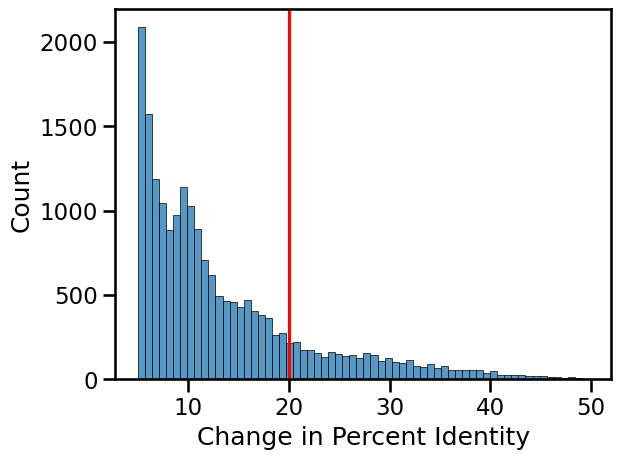

In [606]:
sns.histplot(melted[melted["value"] > 0.05]["value"] * 100)
plt.axvline(20, color = "red")
plt.xlabel("Change in Percent Identity")

In [670]:
406 / 10045

0.04041811846689895

In [671]:
182 / 8900

0.02044943820224719

In [680]:
len(melted[melted["value"] > 0.2]) / len(melted)

0.0023210492599211032

In [683]:
melted[melted["value"] > 0.2]["variable"].value_counts()["DE"]/ len(melted[melted["variable"] == "DE"])

0.020035226772346985

In [684]:
melted[melted["value"] > 0.2]["variable"].value_counts()["AT"]/ len(melted[melted["variable"] == "DE"])

0.044693967415235576

In [690]:
melted[melted["value"] > 0.2]["variable"].value_counts()["PQ"]/ len(melted[melted["variable"] == "DE"])

0.014420959929546456

In [667]:
melted[melted["value"] > 0.2]["variable"].value_counts()["AT"]

406

In [669]:
melted[melted["value"] < 0.2]["variable"].value_counts()["AT"]

10045

In [666]:
melted[melted["value"] > 0.2]["variable"].value_counts()["DE"]

182

In [665]:
melted[melted["value"] < 0.2]["variable"].value_counts()["DE"]

8900

In [663]:
melted[melted["value"] > 0.2]["variable"].value_counts()[:10]

variable
AT    406
GS    385
PS    297
NS    254
DE    182
AV    131
PQ    131
IV    127
AG    101
AS    100
Name: count, dtype: int64

In [650]:
sns.set_context('talk')

def return_p_val_and_mean_diff(pair, plot = True):
    # Calculating mean of pair
    obs = melted[melted["variable"] == pair]
    obs_mean = np.mean(obs["value"])
    
    # Sampling with same size as obs
    sample_means = []
    for i in range(100):
        sampled_df = melted.sample(n=len(obs), replace=True)
        sample_mean = np.mean(sampled_df["value"])
        sample_means.append(sample_mean)

    if plot:
        sns.histplot(sample_means)
        plt.axvline(obs_mean)
        sns.despine()
        plt.title(pair)

    return sum((sample_means > obs_mean) ) / len(sample_means), obs_mean
    


In [651]:
np.sum(np.abs(sample_means - np.mean(sample_means)) >= np.abs(obs_mean - np.mean(sample_means))) / len(sample_means)

0.0

(0.0, 0.02024293157142743)

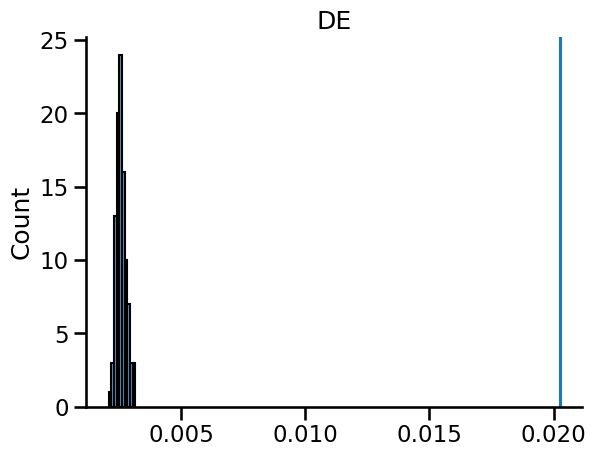

In [658]:
return_p_val_and_mean_diff("DE")

In [787]:
sampling_p_vals, sampling_mean_diffs = [], []

i = 0

for pair in AA_pair_col_names:

    if i % 20 == 0:
        print(i)    

    i += 1

    
    p_val, mean_diff = return_p_val_and_mean_diff(pair, plot = False)
    sampling_p_vals.append(p_val)
    sampling_mean_diffs.append(mean_diff)

sampling_p_val_df = pd.DataFrame({"pair" : AA_pair_col_names, "p_val" : sampling_p_vals, "mean_diff" : sampling_mean_diffs})
sampling_p_val_df

0
20
40
60
80
100
120
140
160
180


pair  p_val  mean_diff
0     AC    1.0   0.000167
1     AD    1.0   0.001391
2     AE    1.0   0.001777
3     AF    1.0   0.000149
4     AG    0.0   0.009672
..   ...    ...        ...
185   TW    1.0   0.000035
186   TY    1.0   0.000033
187   VW    1.0   0.000054
188   VY    1.0   0.000039
189   WY    1.0   0.000256

[190 rows x 3 columns]

(0.0, 0.03293211916173672)

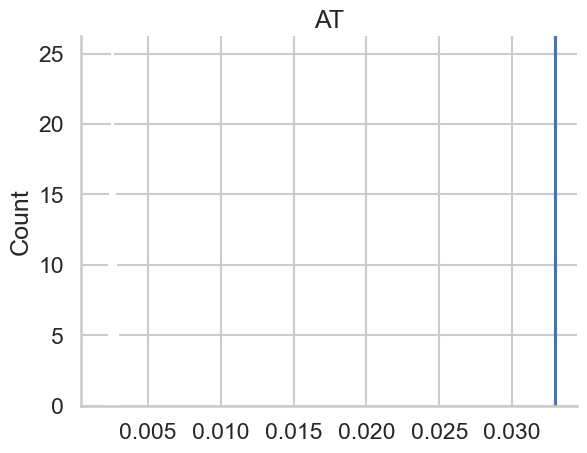

In [750]:
return_p_val_and_mean_diff("AT")

<Axes: xlabel='p_val', ylabel='Count'>

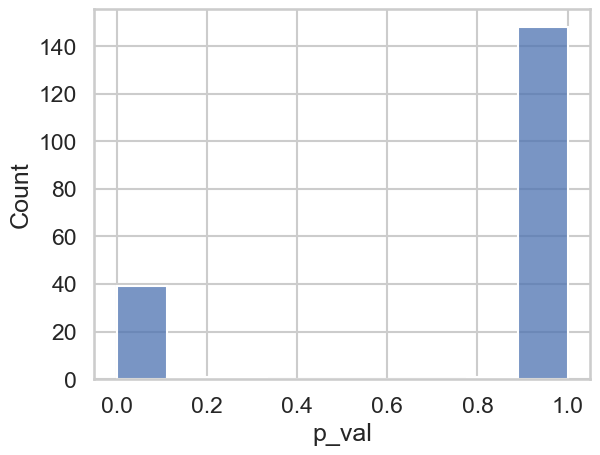

In [751]:
sns.histplot(sampling_p_val_df["p_val"])

In [752]:
sampling_p_val_df[sampling_p_val_df["p_val"] == 1]

pair  p_val  mean_diff
0     AC    1.0   0.000167
1     AD    1.0   0.001391
2     AE    1.0   0.001777
3     AF    1.0   0.000149
5     AH    1.0   0.000135
..   ...    ...        ...
185   TW    1.0   0.000035
186   TY    1.0   0.000033
187   VW    1.0   0.000054
188   VY    1.0   0.000039
189   WY    1.0   0.000256

[146 rows x 3 columns]

In [753]:
sampling_p_val_df[sampling_p_val_df["p_val"] <= 0.05].sort_values(by = "mean_diff", ascending = False)

pair  p_val  mean_diff
15    AT   0.00   0.032932
37    DE   0.00   0.020243
94    GS   0.00   0.018662
157   NS   0.00   0.017073
164   PS   0.00   0.016527
121   IV   0.00   0.016331
16    AV   0.00   0.013937
151   MV   0.00   0.013259
180   ST   0.00   0.009850
129   KR   0.00   0.009685
4     AG   0.00   0.009672
14    AS   0.00   0.009450
11    AP   0.00   0.009234
162   PQ   0.00   0.009139
114   IM   0.00   0.008545
105   HQ   0.00   0.007288
165   PT   0.00   0.007023
137   LP   0.00   0.006780
36    CY   0.00   0.006564
74    FL   0.00   0.006321
45    DN   0.00   0.006103
169   QR   0.00   0.005956
106   HR   0.00   0.005911
142   LV   0.00   0.005527
135   LM   0.00   0.005384
84    FY   0.00   0.005359
113   IL   0.00   0.004893
55    EG   0.00   0.004674
158   NT   0.00   0.004481
39    DG   0.00   0.004456
93    GR   0.00   0.004422
103   HN   0.00   0.004324
120   IT   0.00   0.004252
96    GV   0.00   0.003738
58    EK   0.00   0.003734
150   MT   0.00   0.003369
104   HP   0.00   0.003358
111   HY   0.00   0.003327
63    EQ   0.01   0.003084

In [828]:
sampling_p_val_df["AA1"] = sampling_p_val_df["pair"].str[0]
sampling_p_val_df["AA2"] = sampling_p_val_df["pair"].str[1]
sampling_p_val_df["1-p_val"] = 1 - sampling_p_val_df["p_val"]
sampling_p_val_df["mean_diff"] = 100 * sampling_p_val_df["mean_diff"]
sampling_p_val_df

pair  p_val  mean_diff AA1 AA2  1-p_val
0     AC    1.0   0.016675   A   C      0.0
1     AD    1.0   0.139052   A   D      0.0
2     AE    1.0   0.177735   A   E      0.0
3     AF    1.0   0.014902   A   F      0.0
4     AG    0.0   0.967168   A   G      1.0
..   ...    ...        ...  ..  ..      ...
185   TW    1.0   0.003486   T   W      0.0
186   TY    1.0   0.003346   T   Y      0.0
187   VW    1.0   0.005354   V   W      0.0
188   VY    1.0   0.003901   V   Y      0.0
189   WY    1.0   0.025582   W   Y      0.0

[190 rows x 6 columns]

In [829]:
len(set(sampling_p_val_df["AA1"]))

19

In [830]:
len(set(sampling_p_val_df["AA2"]))

19

In [838]:
AA_order = ["A", "T", "S", "N", "G", "V", "P", "I", "E", "D", "M", "Q", "H", "R", "L", "C", "K", "F", "Y", "W"]
AA_order_dict = dict(zip(AA_order, np.arange(20)))
AA_order_dict

{'A': 0,
 'T': 1,
 'S': 2,
 'N': 3,
 'G': 4,
 'V': 5,
 'P': 6,
 'I': 7,
 'E': 8,
 'D': 9,
 'M': 10,
 'Q': 11,
 'H': 12,
 'R': 13,
 'L': 14,
 'C': 15,
 'K': 16,
 'F': 17,
 'Y': 18,
 'W': 19}

In [839]:
new_AA1s = []
new_AA2s = []

for i in range(len(sampling_p_val_df)):
    AA1 = sampling_p_val_df["AA1"].iloc[i]
    AA2 = sampling_p_val_df["AA2"].iloc[i]
    if AA_order_dict[AA1] < AA_order_dict[AA2]:
        new_AA1s.append(AA1)
        new_AA2s.append(AA2)
    else:
        new_AA2s.append(AA1)
        new_AA1s.append(AA2)

In [841]:
sampling_p_val_df["new_AA1"] = new_AA1s
sampling_p_val_df["new_AA2"] = new_AA2s
sampling_p_val_df

pair  p_val  mean_diff AA1 AA2  1-p_val new_AA1 new_AA2
0     AC    1.0   0.016675   A   C      0.0       A       C
1     AD    1.0   0.139052   A   D      0.0       A       D
2     AE    1.0   0.177735   A   E      0.0       A       E
3     AF    1.0   0.014902   A   F      0.0       A       F
4     AG    0.0   0.967168   A   G      1.0       A       G
..   ...    ...        ...  ..  ..      ...     ...     ...
185   TW    1.0   0.003486   T   W      0.0       T       W
186   TY    1.0   0.003346   T   Y      0.0       T       Y
187   VW    1.0   0.005354   V   W      0.0       V       W
188   VY    1.0   0.003901   V   Y      0.0       V       Y
189   WY    1.0   0.025582   W   Y      0.0       Y       W

[190 rows x 8 columns]

In [892]:
sampling_p_val_df['sort_order'] = pd.Categorical(sampling_p_val_df['new_AA1'], ordered=True, categories=list(AA_order_dict.keys()))
sampling_p_val_df['sort_order2'] = pd.Categorical(sampling_p_val_df['new_AA2'], ordered=True, categories=list(AA_order_dict.keys()))
sampling_p_val_df = sampling_p_val_df.sort_values(['sort_order', 'sort_order2'])
sampling_p_val_df

pair  p_val  mean_diff AA1 AA2  1-p_val new_AA1 new_AA2 sort_order  \
15    AT    0.0   3.293212   A   T      1.0       A       T          A   
14    AS    0.0   0.945017   A   S      1.0       A       S          A   
10    AN    1.0   0.053477   A   N      0.0       A       N          A   
4     AG    0.0   0.967168   A   G      1.0       A       G          A   
16    AV    0.0   1.393660   A   V      1.0       A       V          A   
..   ...    ...        ...  ..  ..      ...     ...     ...        ...   
134   KY    1.0   0.001605   K   Y      0.0       K       Y          K   
133   KW    1.0   0.001435   K   W      0.0       K       W          K   
84    FY    0.0   0.535924   F   Y      1.0       F       Y          F   
83    FW    1.0   0.021080   F   W      0.0       F       W          F   
189   WY    1.0   0.025582   W   Y      0.0       Y       W          Y   

    sort_order2  
15            T  
14            S  
10            N  
4             G  
16            V  
..          ...  
134           Y  
133           W  
84            Y  
83            W  
189           W  

[190 rows x 10 columns]

In [893]:
# All plotting controls

amino_acid_colors_white = {
    # Purples
    'F': '#306BAC',  
    'W': '#306BAC',
    'L': '#306BAC',
    'Y': '#306BAC',
    
    # Reds
    'D': '#D04741', 
    'E': '#D04741', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
     
    '-': "#FFFFFF", 
    "X": "#787878"
}


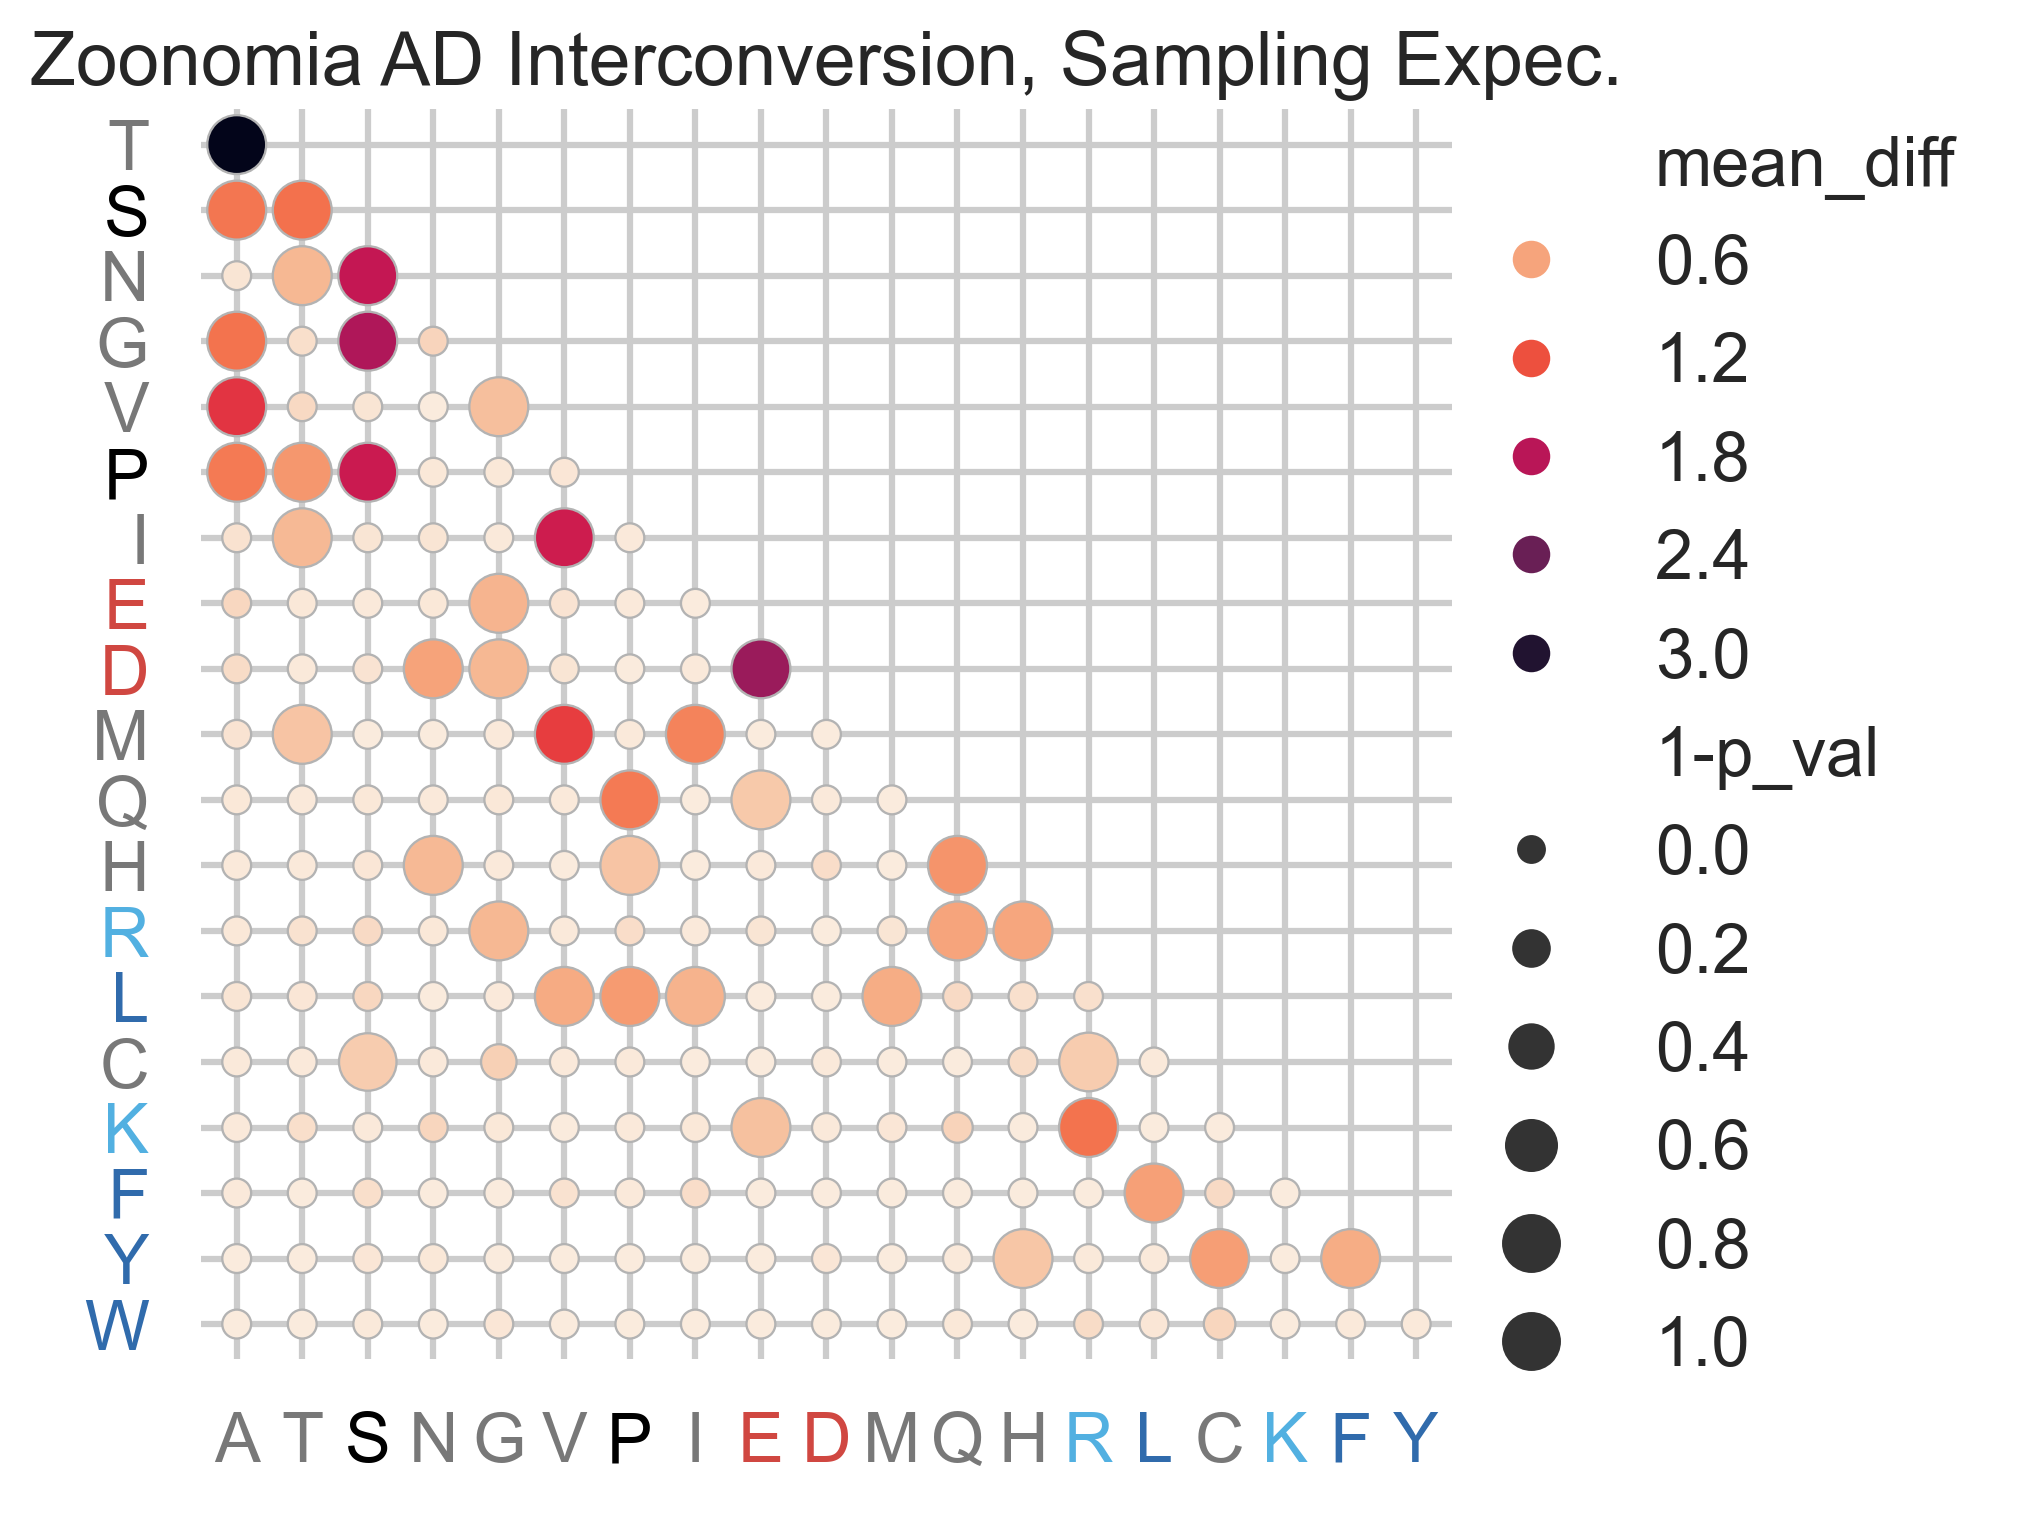

In [895]:
sns.set_theme(style="whitegrid", rc={"figure.dpi": 300})
sns.set_context('talk')

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=sampling_p_val_df,
    x="new_AA1", y="new_AA2", hue="mean_diff", size="1-p_val",
    palette="rocket_r", edgecolor=".7",
    height=5.5, sizes=(10, 200), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.03)

x_labels = g.ax.get_xticklabels()
for i, label in enumerate(x_labels):
    label.set_color(amino_acid_colors_white[str(label)[-3]])

y_labels = g.ax.get_yticklabels()
for i, label in enumerate(y_labels):
    label.set_color(amino_acid_colors_white[str(label)[-3]])

plt.title("Zoonomia AD Interconversion, Sampling Expec.");

In [906]:
mean_percent_changes = melted[["variable", "value"]].groupby("variable").mean().reset_index()
mean_percent_changes["value"] = mean_percent_changes["value"] * 100
mean_percent_changes = mean_percent_changes.rename(columns = {"variable" : "pair"})
mean_percent_changes

pair     value
0     AC  0.016675
1     AD  0.139052
2     AE  0.177735
3     AF  0.014902
4     AG  0.967168
..   ...       ...
185   TW  0.003486
186   TY  0.003346
187   VW  0.005354
188   VY  0.003901
189   WY  0.025582

[190 rows x 2 columns]

In [908]:
p_val_df = pd.merge(p_val_df, mean_percent_changes)
p_val_df

pair     p_val     value
0     AC  1.000000  0.016675
1     AD  1.000000  0.139052
2     AE  0.999998  0.177735
3     AF  1.000000  0.014902
4     AG  0.000000  0.967168
..   ...       ...       ...
185   TW  1.000000  0.003486
186   TY  1.000000  0.003346
187   VW  1.000000  0.005354
188   VY  1.000000  0.003901
189   WY  1.000000  0.025582

[190 rows x 3 columns]

In [911]:
p_val_df["AA1"] = p_val_df["pair"].str[0]
p_val_df["AA2"] = p_val_df["pair"].str[1]
p_val_df

pair     p_val     value AA1 AA2
0     AC  1.000000  0.016675   A   C
1     AD  1.000000  0.139052   A   D
2     AE  0.999998  0.177735   A   E
3     AF  1.000000  0.014902   A   F
4     AG  0.000000  0.967168   A   G
..   ...       ...       ...  ..  ..
185   TW  1.000000  0.003486   T   W
186   TY  1.000000  0.003346   T   Y
187   VW  1.000000  0.005354   V   W
188   VY  1.000000  0.003901   V   Y
189   WY  1.000000  0.025582   W   Y

[190 rows x 5 columns]

In [912]:
p_val_new_AA1s = []
p_val_new_AA2s = []

for i in range(len(p_val_df)):
    AA1 = p_val_df["AA1"].iloc[i]
    AA2 = p_val_df["AA2"].iloc[i]
    if AA_order_dict[AA1] < AA_order_dict[AA2]:
        p_val_new_AA1s.append(AA1)
        p_val_new_AA2s.append(AA2)
    else:
        p_val_new_AA2s.append(AA1)
        p_val_new_AA1s.append(AA2)

In [913]:
p_val_df["new_AA1"] = p_val_new_AA1s
p_val_df["new_AA2"] = p_val_new_AA2s
p_val_df

pair     p_val     value AA1 AA2 new_AA1 new_AA2
0     AC  1.000000  0.016675   A   C       A       C
1     AD  1.000000  0.139052   A   D       A       D
2     AE  0.999998  0.177735   A   E       A       E
3     AF  1.000000  0.014902   A   F       A       F
4     AG  0.000000  0.967168   A   G       A       G
..   ...       ...       ...  ..  ..     ...     ...
185   TW  1.000000  0.003486   T   W       T       W
186   TY  1.000000  0.003346   T   Y       T       Y
187   VW  1.000000  0.005354   V   W       V       W
188   VY  1.000000  0.003901   V   Y       V       Y
189   WY  1.000000  0.025582   W   Y       Y       W

[190 rows x 7 columns]

In [916]:
p_val_df['sort_order'] = pd.Categorical(p_val_df['new_AA1'], ordered=True, categories=list(AA_order_dict.keys()))
p_val_df['sort_order2'] = pd.Categorical(p_val_df['new_AA2'], ordered=True, categories=list(AA_order_dict.keys()))
p_val_df = p_val_df.sort_values(['sort_order', 'sort_order2'])
p_val_df["1-p_val"] = 1 - p_val_df["p_val"]
p_val_df

pair         p_val     value AA1 AA2 new_AA1 new_AA2 sort_order  \
15    AT  0.000000e+00  3.293212   A   T       A       T          A   
14    AS  0.000000e+00  0.945017   A   S       A       S          A   
10    AN  1.000000e+00  0.053477   A   N       A       N          A   
4     AG  0.000000e+00  0.967168   A   G       A       G          A   
16    AV  0.000000e+00  1.393660   A   V       A       V          A   
..   ...           ...       ...  ..  ..     ...     ...        ...   
134   KY  1.000000e+00  0.001605   K   Y       K       Y          K   
133   KW  1.000000e+00  0.001435   K   W       K       W          K   
84    FY  2.262759e-25  0.535924   F   Y       F       Y          F   
83    FW  1.000000e+00  0.021080   F   W       F       W          F   
189   WY  1.000000e+00  0.025582   W   Y       Y       W          Y   

    sort_order2       1-p_val  
15            T  1.000000e+00  
14            S  1.000000e+00  
10            N  0.000000e+00  
4             G  1.000000e+00  
16            V  1.000000e+00  
..          ...           ...  
134           Y  0.000000e+00  
133           W  5.029310e-14  
84            Y  1.000000e+00  
83            W  4.067857e-13  
189           W  6.625145e-12  

[190 rows x 10 columns]

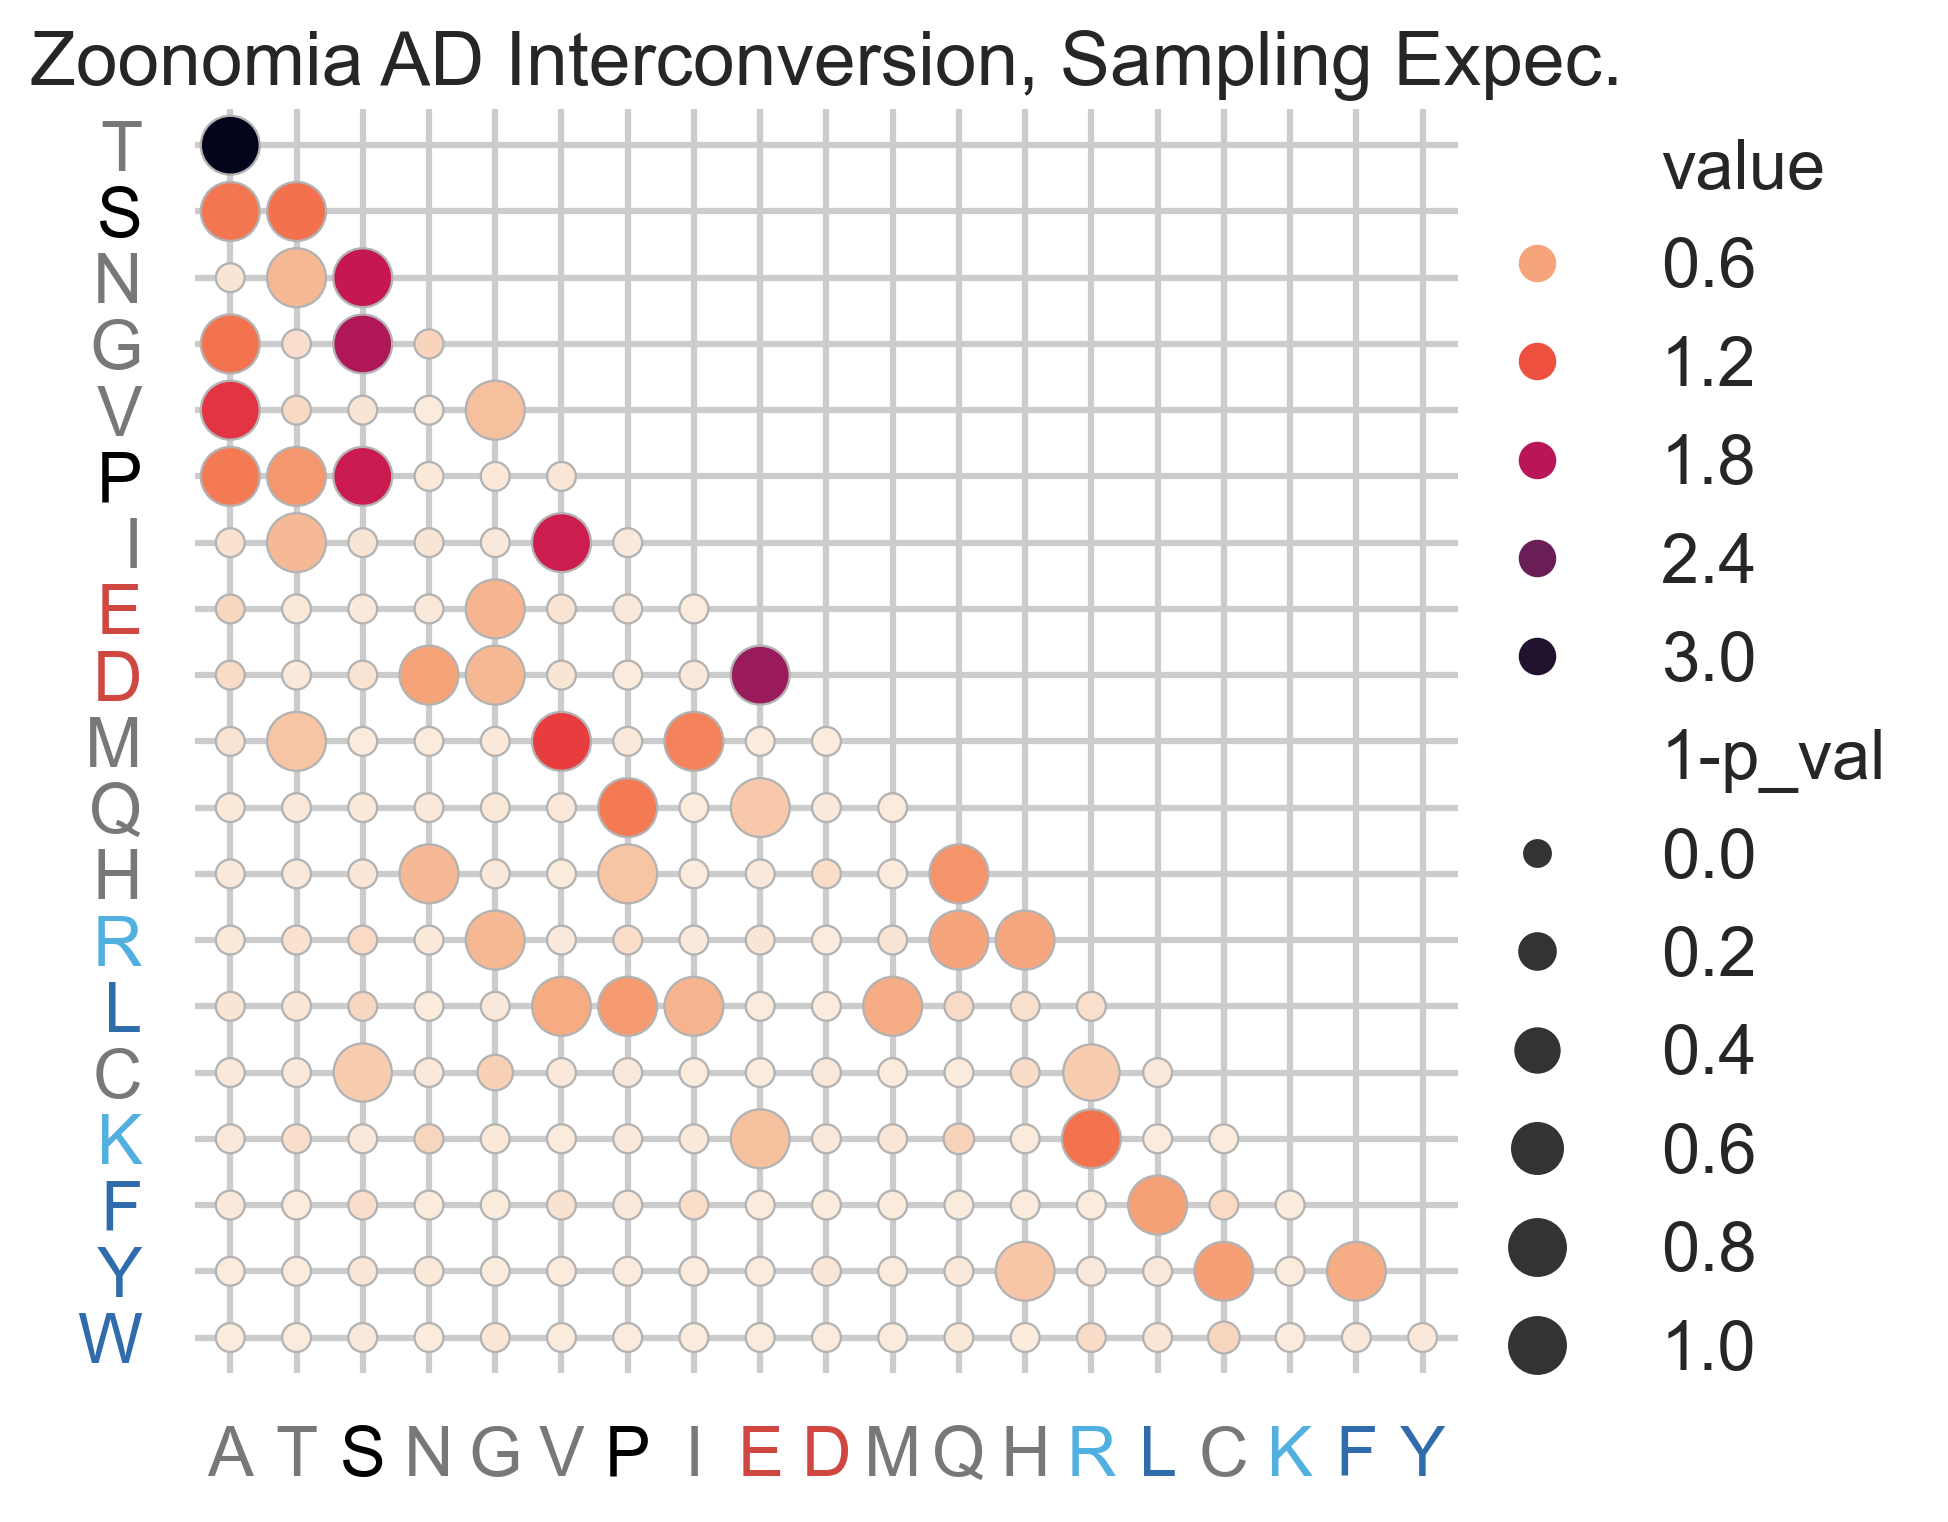

In [917]:
sns.set_theme(style="whitegrid", rc={"figure.dpi": 300})
sns.set_context('talk')

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=p_val_df,
    x="new_AA1", y="new_AA2", hue="value", size="1-p_val",
    palette="rocket_r", edgecolor=".7",
    height=5.5, sizes=(10, 200), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.03)

x_labels = g.ax.get_xticklabels()
for i, label in enumerate(x_labels):
    label.set_color(amino_acid_colors_white[str(label)[-3]])

y_labels = g.ax.get_yticklabels()
for i, label in enumerate(y_labels):
    label.set_color(amino_acid_colors_white[str(label)[-3]])

plt.title("Zoonomia AD Interconversion, Sampling Expec.");

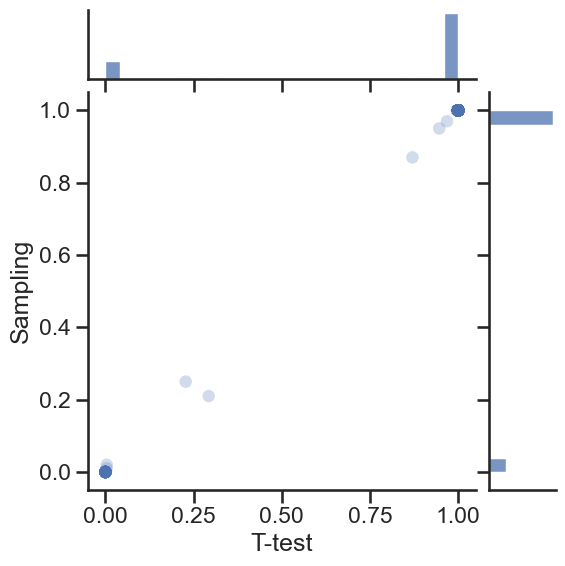

In [934]:
# Both p-value methods are consistent with one another
sns.set_theme(style="ticks", rc={"figure.dpi": 100})
sns.set_context('talk')
sns.jointplot(data = pd.merge(p_val_df, sampling_p_val_df, on = "pair"),
                x = "p_val_x",
                y = "p_val_y",
               edgecolor = "none",
               alpha = 0.25,
             marginal_kws=dict(bins=25))
plt.xlabel("T-test")
plt.ylabel("Sampling")
sns.despine();

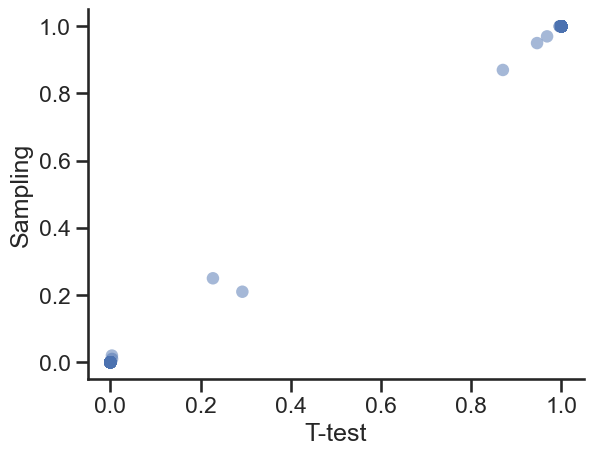

In [929]:
sns.set_theme(style="ticks", rc={"figure.dpi": 100})
sns.set_context('talk')
sns.scatterplot(data = pd.merge(p_val_df, sampling_p_val_df, on = "pair"),
                x = "p_val_x",
                y = "p_val_y",
               edgecolor = "none",
               alpha = 0.5)
plt.xlabel("T-test")
plt.ylabel("Sampling")
sns.despine();

In [ ]:
p_vals = []

for pair in AA_pair_col_names:
    p_vals.append(compare_pair(pair))
    plt.show()

p_val_df = pd.DataFrame({"pair" : AA_pair_col_names, "p_val" : p_vals})
p_val_df